from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/ECA/')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten,Dropout, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-15 05:27:11.944748: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 05:27:12.277932: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-15 05:27:12.286666: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-15 05:27:12.286693: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

## Data Format

In [2]:
data = pd.read_csv("data/LocationB.csv")
data = data.drop(columns=["Unnamed: 0", "Date"])
data.head()

,TempB,pHB,ECB,DOB,BODB,TNB
0,21.20,8.12,1679,2.62,27.70,1.25
1,21.10,8.08,1690,2.68,27.62,1.20
2,20.94,8.06,1680,2.67,27.25,1.24
3,20.94,8.09,1697,2.65,27.32,1.22
4,21.19,8.11,1692,2.69,27.32,1.18


In [3]:
target_column = "ECB"
features = data.drop(target_column, axis=1)
target = data[target_column]

In [4]:
X = []
y = []
for i in range(3, len(features)):
    X.append(features.iloc[i-3:i, :].values.ravel())  # Flatten features
    y.append(target.iloc[i])

X = np.array(X)
y = np.array(y)

In [5]:
X[0], y[0]

(array([21.2 ,  8.12,  2.62, 27.7 ,  1.25, 21.1 ,  8.08,  2.68, 27.62,
         1.2 , 20.94,  8.06,  2.67, 27.25,  1.24]),
 1697)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [7]:
xt = x_train.copy()
xt = xt.reshape(231,15,1)
xt.shape

(231, 15, 1)

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=xt)
target = y_train[window_size - 1:].flatten()

In [9]:
moving_avg_data.shape, target.shape

((229, 15, 1), (229,))

In [10]:
epochs = 50

# General Model

### CNN

In [11]:
x_train = xt.copy()

2024-03-15 05:27:19.763772: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-15 05:27:19.765410: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-15 05:27:19.765465: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-15 05:27:19.765780: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
1/8 [==>...........................] - ETA: 13s - loss: 2537399.5000 - root_mean_squared_error: 1592.9216

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 359ms/step - loss: 2553341.5000 - root_mean_squared_error: 1597.9178 - val_loss: 2517557.5000 - val_root_mean_squared_error: 1586.6813
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 2383383.2500 - root_mean_squared_error: 1543.8210

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 253ms/step - loss: 2537008.7500 - root_mean_squared_error: 1592.7991 - val_loss: 2502479.0000 - val_root_mean_squared_error: 1581.9226
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 2327508.0000 - root_mean_squared_error: 1525.6173

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 241ms/step - loss: 2524362.5000 - root_mean_squared_error: 1588.8242 - val_loss: 2492824.2500 - val_root_mean_squared_error: 1578.8680
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 2375426.5000 - root_mean_squared_error: 1541.2418

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 310ms/step - loss: 2517302.7500 - root_mean_squared_error: 1586.6010 - val_loss: 2488672.0000 - val_root_mean_squared_error: 1577.5525
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 2370672.2500 - root_mean_squared_error: 1539.6987

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 268ms/step - loss: 2513814.0000 - root_mean_squared_error: 1585.5012 - val_loss: 2485132.2500 - val_root_mean_squared_error: 1576.4301
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 2383049.0000 - root_mean_squared_error: 1543.7128

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 311ms/step - loss: 2510352.2500 - root_mean_squared_error: 1584.4091 - val_loss: 2481538.7500 - val_root_mean_squared_error: 1575.2902
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 2576756.0000 - root_mean_squared_error: 1605.2277

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 255ms/step - loss: 2506854.2500 - root_mean_squared_error: 1583.3048 - val_loss: 2477904.5000 - val_root_mean_squared_error: 1574.1361
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 2504064.7500 - root_mean_squared_error: 1582.4237

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 293ms/step - loss: 2503264.7500 - root_mean_squared_error: 1582.1709 - val_loss: 2474218.2500 - val_root_mean_squared_error: 1572.9648
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2499650.5000 - root_mean_squared_error: 1581.0283

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 265ms/step - loss: 2499650.5000 - root_mean_squared_error: 1581.0283 - val_loss: 2470458.5000 - val_root_mean_squared_error: 1571.7692
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2527032.7500 - root_mean_squared_error: 1589.6643

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 353ms/step - loss: 2495965.0000 - root_mean_squared_error: 1579.8623 - val_loss: 2466616.2500 - val_root_mean_squared_error: 1570.5465
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2492207.5000 - root_mean_squared_error: 1578.6727

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 251ms/step - loss: 2492207.5000 - root_mean_squared_error: 1578.6727 - val_loss: 2462704.5000 - val_root_mean_squared_error: 1569.3007
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2496472.7500 - root_mean_squared_error: 1580.0231

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 303ms/step - loss: 2488373.0000 - root_mean_squared_error: 1577.4578 - val_loss: 2458741.5000 - val_root_mean_squared_error: 1568.0375
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 2468518.0000 - root_mean_squared_error: 1571.1519

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 331ms/step - loss: 2484454.2500 - root_mean_squared_error: 1576.2152 - val_loss: 2454699.5000 - val_root_mean_squared_error: 1566.7480
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 2685331.5000 - root_mean_squared_error: 1638.6981

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 202ms/step - loss: 2480471.2500 - root_mean_squared_error: 1574.9512 - val_loss: 2450564.5000 - val_root_mean_squared_error: 1565.4279
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 2323615.5000 - root_mean_squared_error: 1524.3411

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 236ms/step - loss: 2476418.2500 - root_mean_squared_error: 1573.6639 - val_loss: 2446332.2500 - val_root_mean_squared_error: 1564.0756
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 2482573.5000 - root_mean_squared_error: 1575.6184

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 215ms/step - loss: 2472244.7500 - root_mean_squared_error: 1572.3374 - val_loss: 2441996.7500 - val_root_mean_squared_error: 1562.6890
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 2327466.5000 - root_mean_squared_error: 1525.6036

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 202ms/step - loss: 2467969.7500 - root_mean_squared_error: 1570.9773 - val_loss: 2437545.7500 - val_root_mean_squared_error: 1561.2640
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 2329182.5000 - root_mean_squared_error: 1526.1659

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 195ms/step - loss: 2463586.7500 - root_mean_squared_error: 1569.5817 - val_loss: 2433009.7500 - val_root_mean_squared_error: 1559.8108
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2218720.2500 - root_mean_squared_error: 1489.5369

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 206ms/step - loss: 2459135.5000 - root_mean_squared_error: 1568.1631 - val_loss: 2428351.0000 - val_root_mean_squared_error: 1558.3168
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2454559.0000 - root_mean_squared_error: 1566.7032

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 214ms/step - loss: 2454559.0000 - root_mean_squared_error: 1566.7032 - val_loss: 2423574.0000 - val_root_mean_squared_error: 1556.7832
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 2414282.7500 - root_mean_squared_error: 1553.7963

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 239ms/step - loss: 2449863.5000 - root_mean_squared_error: 1565.2040 - val_loss: 2418687.2500 - val_root_mean_squared_error: 1555.2129
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2531934.0000 - root_mean_squared_error: 1591.2052

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 229ms/step - loss: 2445046.7500 - root_mean_squared_error: 1563.6646 - val_loss: 2413710.2500 - val_root_mean_squared_error: 1553.6121
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 2637346.0000 - root_mean_squared_error: 1623.9907

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 310ms/step - loss: 2440159.2500 - root_mean_squared_error: 1562.1010 - val_loss: 2408592.7500 - val_root_mean_squared_error: 1551.9641
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 2470584.5000 - root_mean_squared_error: 1571.8093

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 185ms/step - loss: 2435116.0000 - root_mean_squared_error: 1560.4858 - val_loss: 2403389.7500 - val_root_mean_squared_error: 1550.2869
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 2686682.7500 - root_mean_squared_error: 1639.1104

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 252ms/step - loss: 2429988.2500 - root_mean_squared_error: 1558.8419 - val_loss: 2398025.5000 - val_root_mean_squared_error: 1548.5559
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2372173.7500 - root_mean_squared_error: 1540.1863

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 243ms/step - loss: 2424687.0000 - root_mean_squared_error: 1557.1406 - val_loss: 2392529.0000 - val_root_mean_squared_error: 1546.7802
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2272992.5000 - root_mean_squared_error: 1507.6447

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 269ms/step - loss: 2419256.7500 - root_mean_squared_error: 1555.3960 - val_loss: 2386858.7500 - val_root_mean_squared_error: 1544.9462
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 2032706.7500 - root_mean_squared_error: 1425.7302

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 180ms/step - loss: 2413670.7500 - root_mean_squared_error: 1553.5992 - val_loss: 2381051.0000 - val_root_mean_squared_error: 1543.0656
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2441669.7500 - root_mean_squared_error: 1562.5844

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 209ms/step - loss: 2407964.5000 - root_mean_squared_error: 1551.7617 - val_loss: 2375091.0000 - val_root_mean_squared_error: 1541.1331
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2607505.2500 - root_mean_squared_error: 1614.7771

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 251ms/step - loss: 2402085.2500 - root_mean_squared_error: 1549.8662 - val_loss: 2368971.2500 - val_root_mean_squared_error: 1539.1462
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2428525.5000 - root_mean_squared_error: 1558.3727

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 211ms/step - loss: 2396049.2500 - root_mean_squared_error: 1547.9177 - val_loss: 2362688.0000 - val_root_mean_squared_error: 1537.1038
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 2623455.0000 - root_mean_squared_error: 1619.7083

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 180ms/step - loss: 2389907.0000 - root_mean_squared_error: 1545.9324 - val_loss: 2356229.5000 - val_root_mean_squared_error: 1535.0015
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2383498.2500 - root_mean_squared_error: 1543.8583

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 212ms/step - loss: 2383498.2500 - root_mean_squared_error: 1543.8583 - val_loss: 2349650.7500 - val_root_mean_squared_error: 1532.8571
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 2373391.7500 - root_mean_squared_error: 1540.5817

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 243ms/step - loss: 2377016.5000 - root_mean_squared_error: 1541.7576 - val_loss: 2342811.0000 - val_root_mean_squared_error: 1530.6244
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 2240071.7500 - root_mean_squared_error: 1496.6869

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 279ms/step - loss: 2370239.5000 - root_mean_squared_error: 1539.5582 - val_loss: 2335871.2500 - val_root_mean_squared_error: 1528.3557
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 2471218.0000 - root_mean_squared_error: 1572.0109

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 237ms/step - loss: 2363452.5000 - root_mean_squared_error: 1537.3524 - val_loss: 2328777.0000 - val_root_mean_squared_error: 1526.0331
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2468027.2500 - root_mean_squared_error: 1570.9956

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 282ms/step - loss: 2356469.0000 - root_mean_squared_error: 1535.0795 - val_loss: 2321490.7500 - val_root_mean_squared_error: 1523.6439
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2349279.5000 - root_mean_squared_error: 1532.7360

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 365ms/step - loss: 2349279.5000 - root_mean_squared_error: 1532.7360 - val_loss: 2314074.0000 - val_root_mean_squared_error: 1521.2081
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 2359711.2500 - root_mean_squared_error: 1536.1351

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 217ms/step - loss: 2341944.0000 - root_mean_squared_error: 1530.3412 - val_loss: 2306463.5000 - val_root_mean_squared_error: 1518.7046
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2047445.7500 - root_mean_squared_error: 1430.8899

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 244ms/step - loss: 2334405.0000 - root_mean_squared_error: 1527.8760 - val_loss: 2298657.0000 - val_root_mean_squared_error: 1516.1322
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2326749.0000 - root_mean_squared_error: 1525.3685

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 305ms/step - loss: 2326749.0000 - root_mean_squared_error: 1525.3685 - val_loss: 2290610.0000 - val_root_mean_squared_error: 1513.4761
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 2401810.5000 - root_mean_squared_error: 1549.7776

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 245ms/step - loss: 2318851.5000 - root_mean_squared_error: 1522.7776 - val_loss: 2282397.2500 - val_root_mean_squared_error: 1510.7605
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2018419.5000 - root_mean_squared_error: 1420.7109

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 290ms/step - loss: 2310759.0000 - root_mean_squared_error: 1520.1180 - val_loss: 2274011.2500 - val_root_mean_squared_error: 1507.9825
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2304004.2500 - root_mean_squared_error: 1517.8947

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 329ms/step - loss: 2302460.5000 - root_mean_squared_error: 1517.3861 - val_loss: 2265435.5000 - val_root_mean_squared_error: 1505.1364
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2120692.5000 - root_mean_squared_error: 1456.2598

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 221ms/step - loss: 2294048.7500 - root_mean_squared_error: 1514.6117 - val_loss: 2256657.7500 - val_root_mean_squared_error: 1502.2177
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 2361670.5000 - root_mean_squared_error: 1536.7727

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 232ms/step - loss: 2285449.5000 - root_mean_squared_error: 1511.7703 - val_loss: 2247698.0000 - val_root_mean_squared_error: 1499.2324
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 2425983.0000 - root_mean_squared_error: 1557.5568

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 361ms/step - loss: 2276572.0000 - root_mean_squared_error: 1508.8313 - val_loss: 2238564.2500 - val_root_mean_squared_error: 1496.1833
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 2585433.5000 - root_mean_squared_error: 1607.9283

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 272ms/step - loss: 2267577.0000 - root_mean_squared_error: 1505.8477 - val_loss: 2229178.5000 - val_root_mean_squared_error: 1493.0433
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2174673.0000 - root_mean_squared_error: 1474.6772

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 253ms/step - loss: 2258392.0000 - root_mean_squared_error: 1502.7947 - val_loss: 2219610.0000 - val_root_mean_squared_error: 1489.8356
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 2336276.0000 - root_mean_squared_error: 1528.4882

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 0s 3ms/step


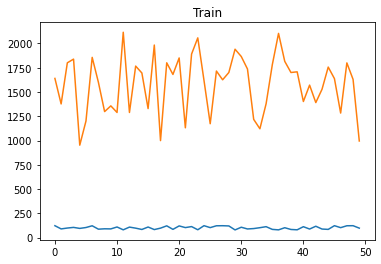

2/2 [==============================] - 0s 4ms/step


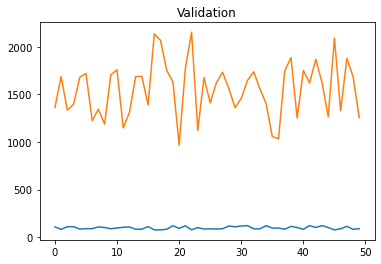

3/3 [==============================] - 0s 3ms/step


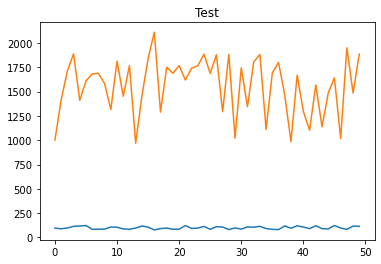

3/3 [==============================] - 0s 3ms/step


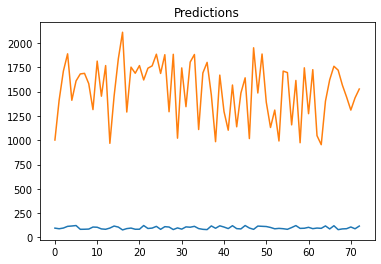

In [12]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2531276.7500 - root_mean_squared_error: 1590.9987

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 2s/step - loss: 2531276.7500 - root_mean_squared_error: 1590.9987 - val_loss: 2504818.0000 - val_root_mean_squared_error: 1582.6616
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 2443496.0000 - root_mean_squared_error: 1563.1686

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2530721.7500 - root_mean_squared_error: 1590.8242 - val_loss: 2504270.0000 - val_root_mean_squared_error: 1582.4885
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 2559562.2500 - root_mean_squared_error: 1599.8632

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2530174.2500 - root_mean_squared_error: 1590.6521 - val_loss: 2503720.0000 - val_root_mean_squared_error: 1582.3148
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 2522719.2500 - root_mean_squared_error: 1588.3070

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2529622.2500 - root_mean_squared_error: 1590.4786 - val_loss: 2503172.2500 - val_root_mean_squared_error: 1582.1417
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2529069.7500 - root_mean_squared_error: 1590.3049

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2529069.7500 - root_mean_squared_error: 1590.3049 - val_loss: 2502618.7500 - val_root_mean_squared_error: 1581.9667
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 2553308.7500 - root_mean_squared_error: 1597.9076

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 1s/step - loss: 2528512.7500 - root_mean_squared_error: 1590.1298 - val_loss: 2502060.7500 - val_root_mean_squared_error: 1581.7904
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2527951.7500 - root_mean_squared_error: 1589.9534

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2527951.7500 - root_mean_squared_error: 1589.9534 - val_loss: 2501498.0000 - val_root_mean_squared_error: 1581.6124
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 2577758.5000 - root_mean_squared_error: 1605.5399

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2527385.2500 - root_mean_squared_error: 1589.7753 - val_loss: 2500929.7500 - val_root_mean_squared_error: 1581.4329
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 2473989.5000 - root_mean_squared_error: 1572.8921

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2526809.2500 - root_mean_squared_error: 1589.5940 - val_loss: 2500354.2500 - val_root_mean_squared_error: 1581.2509
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2526223.7500 - root_mean_squared_error: 1589.4099

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2526223.7500 - root_mean_squared_error: 1589.4099 - val_loss: 2499760.0000 - val_root_mean_squared_error: 1581.0630
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2525621.5000 - root_mean_squared_error: 1589.2205

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2525621.5000 - root_mean_squared_error: 1589.2205 - val_loss: 2499148.7500 - val_root_mean_squared_error: 1580.8696
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2525004.2500 - root_mean_squared_error: 1589.0262

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2525004.2500 - root_mean_squared_error: 1589.0262 - val_loss: 2498522.5000 - val_root_mean_squared_error: 1580.6715
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2542929.2500 - root_mean_squared_error: 1594.6565

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2524365.7500 - root_mean_squared_error: 1588.8253 - val_loss: 2497874.5000 - val_root_mean_squared_error: 1580.4666
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 2604022.5000 - root_mean_squared_error: 1613.6984

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2523712.0000 - root_mean_squared_error: 1588.6195 - val_loss: 2497209.7500 - val_root_mean_squared_error: 1580.2562
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 2606552.0000 - root_mean_squared_error: 1614.4819

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2523039.0000 - root_mean_squared_error: 1588.4077 - val_loss: 2496523.0000 - val_root_mean_squared_error: 1580.0389
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2525517.2500 - root_mean_squared_error: 1589.1876

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2522340.0000 - root_mean_squared_error: 1588.1876 - val_loss: 2495819.0000 - val_root_mean_squared_error: 1579.8162
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 2537098.5000 - root_mean_squared_error: 1592.8271

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2521622.2500 - root_mean_squared_error: 1587.9617 - val_loss: 2495091.5000 - val_root_mean_squared_error: 1579.5858
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2520884.2500 - root_mean_squared_error: 1587.7292

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2520884.2500 - root_mean_squared_error: 1587.7292 - val_loss: 2494340.5000 - val_root_mean_squared_error: 1579.3481
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2520122.0000 - root_mean_squared_error: 1587.4893

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2520122.0000 - root_mean_squared_error: 1587.4893 - val_loss: 2493566.2500 - val_root_mean_squared_error: 1579.1030
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2519343.7500 - root_mean_squared_error: 1587.2440

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2519343.7500 - root_mean_squared_error: 1587.2440 - val_loss: 2492778.0000 - val_root_mean_squared_error: 1578.8534
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2518549.5000 - root_mean_squared_error: 1586.9939

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2518549.5000 - root_mean_squared_error: 1586.9939 - val_loss: 2491982.5000 - val_root_mean_squared_error: 1578.6014
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 2527177.0000 - root_mean_squared_error: 1589.7097

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2517749.5000 - root_mean_squared_error: 1586.7418 - val_loss: 2491176.2500 - val_root_mean_squared_error: 1578.3461
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2516938.2500 - root_mean_squared_error: 1586.4861

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2516938.2500 - root_mean_squared_error: 1586.4861 - val_loss: 2490363.2500 - val_root_mean_squared_error: 1578.0885
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2516773.5000 - root_mean_squared_error: 1586.4342

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2516127.7500 - root_mean_squared_error: 1586.2307 - val_loss: 2489550.2500 - val_root_mean_squared_error: 1577.8308
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2515315.5000 - root_mean_squared_error: 1585.9746

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2515315.5000 - root_mean_squared_error: 1585.9746 - val_loss: 2488746.7500 - val_root_mean_squared_error: 1577.5762
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2514513.7500 - root_mean_squared_error: 1585.7218

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2514513.7500 - root_mean_squared_error: 1585.7218 - val_loss: 2487948.7500 - val_root_mean_squared_error: 1577.3232
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2519833.2500 - root_mean_squared_error: 1587.3983

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2513729.0000 - root_mean_squared_error: 1585.4744 - val_loss: 2487167.0000 - val_root_mean_squared_error: 1577.0754
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2499596.5000 - root_mean_squared_error: 1581.0112

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2512956.0000 - root_mean_squared_error: 1585.2306 - val_loss: 2486409.5000 - val_root_mean_squared_error: 1576.8353
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2512210.0000 - root_mean_squared_error: 1584.9952

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2512210.0000 - root_mean_squared_error: 1584.9952 - val_loss: 2485667.2500 - val_root_mean_squared_error: 1576.5999
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 2533870.7500 - root_mean_squared_error: 1591.8137

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2511480.7500 - root_mean_squared_error: 1584.7653 - val_loss: 2484951.5000 - val_root_mean_squared_error: 1576.3729
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2510774.2500 - root_mean_squared_error: 1584.5422

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2510774.2500 - root_mean_squared_error: 1584.5422 - val_loss: 2484258.7500 - val_root_mean_squared_error: 1576.1532
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2510092.2500 - root_mean_squared_error: 1584.3270

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2510092.2500 - root_mean_squared_error: 1584.3270 - val_loss: 2483587.2500 - val_root_mean_squared_error: 1575.9401
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2520439.5000 - root_mean_squared_error: 1587.5892

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2509434.5000 - root_mean_squared_error: 1584.1195 - val_loss: 2482939.2500 - val_root_mean_squared_error: 1575.7345
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2494442.7500 - root_mean_squared_error: 1579.3805

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2508800.5000 - root_mean_squared_error: 1583.9193 - val_loss: 2482320.0000 - val_root_mean_squared_error: 1575.5380
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 2529828.5000 - root_mean_squared_error: 1590.5435

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 3s/step - loss: 2508192.2500 - root_mean_squared_error: 1583.7273 - val_loss: 2481723.5000 - val_root_mean_squared_error: 1575.3486
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2507610.7500 - root_mean_squared_error: 1583.5437

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2507610.7500 - root_mean_squared_error: 1583.5437 - val_loss: 2481152.7500 - val_root_mean_squared_error: 1575.1675
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 2458459.2500 - root_mean_squared_error: 1567.9475

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2507049.5000 - root_mean_squared_error: 1583.3665 - val_loss: 2480607.0000 - val_root_mean_squared_error: 1574.9943
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2506513.7500 - root_mean_squared_error: 1583.1973

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2506513.7500 - root_mean_squared_error: 1583.1973 - val_loss: 2480082.2500 - val_root_mean_squared_error: 1574.8276
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2504762.7500 - root_mean_squared_error: 1582.6443

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2506005.0000 - root_mean_squared_error: 1583.0366 - val_loss: 2479579.0000 - val_root_mean_squared_error: 1574.6678
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2503043.7500 - root_mean_squared_error: 1582.1011

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2505512.2500 - root_mean_squared_error: 1582.8810 - val_loss: 2479098.0000 - val_root_mean_squared_error: 1574.5151
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2505041.2500 - root_mean_squared_error: 1582.7322

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2505041.2500 - root_mean_squared_error: 1582.7322 - val_loss: 2478635.5000 - val_root_mean_squared_error: 1574.3683
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2504587.7500 - root_mean_squared_error: 1582.5890

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2504587.7500 - root_mean_squared_error: 1582.5890 - val_loss: 2478192.2500 - val_root_mean_squared_error: 1574.2275
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 2504157.5000 - root_mean_squared_error: 1582.4530

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2504151.7500 - root_mean_squared_error: 1582.4512 - val_loss: 2477763.2500 - val_root_mean_squared_error: 1574.0912
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2511928.0000 - root_mean_squared_error: 1584.9062

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2503729.2500 - root_mean_squared_error: 1582.3176 - val_loss: 2477349.5000 - val_root_mean_squared_error: 1573.9598
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2503324.7500 - root_mean_squared_error: 1582.1898

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2503324.7500 - root_mean_squared_error: 1582.1898 - val_loss: 2476945.7500 - val_root_mean_squared_error: 1573.8315
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2483249.2500 - root_mean_squared_error: 1575.8329

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2502925.2500 - root_mean_squared_error: 1582.0636 - val_loss: 2476555.2500 - val_root_mean_squared_error: 1573.7075
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 2467948.0000 - root_mean_squared_error: 1570.9705

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2502538.7500 - root_mean_squared_error: 1581.9414 - val_loss: 2476175.0000 - val_root_mean_squared_error: 1573.5868
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2502163.7500 - root_mean_squared_error: 1581.8229

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2502163.7500 - root_mean_squared_error: 1581.8229 - val_loss: 2475804.2500 - val_root_mean_squared_error: 1573.4689
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2511796.5000 - root_mean_squared_error: 1584.8649

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2501797.5000 - root_mean_squared_error: 1581.7072 - val_loss: 2475438.2500 - val_root_mean_squared_error: 1573.3525
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2500105.7500 - root_mean_squared_error: 1581.1722

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 6ms/step


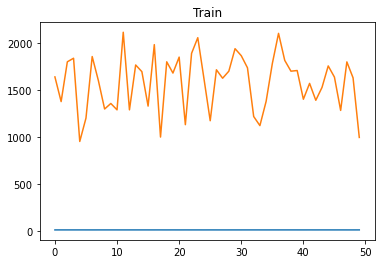

2/2 [==============================] - 2s 11ms/step


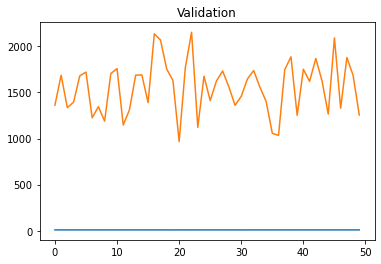

3/3 [==============================] - 0s 36ms/step


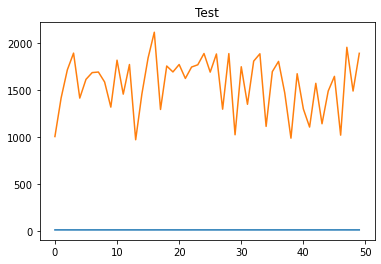

3/3 [==============================] - 0s 5ms/step


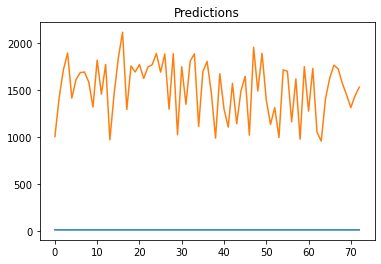

In [13]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2524509.2500 - root_mean_squared_error: 1588.8705

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 42s 4s/step - loss: 2529961.2500 - root_mean_squared_error: 1590.5852 - val_loss: 2503634.2500 - val_root_mean_squared_error: 1582.2877
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2544950.2500 - root_mean_squared_error: 1595.2900

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2529707.2500 - root_mean_squared_error: 1590.5054 - val_loss: 2503406.2500 - val_root_mean_squared_error: 1582.2156
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 2502141.2500 - root_mean_squared_error: 1581.8158

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2529473.7500 - root_mean_squared_error: 1590.4319 - val_loss: 2503171.5000 - val_root_mean_squared_error: 1582.1415
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2529234.5000 - root_mean_squared_error: 1590.3567

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2529234.5000 - root_mean_squared_error: 1590.3567 - val_loss: 2502928.5000 - val_root_mean_squared_error: 1582.0646
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2534319.7500 - root_mean_squared_error: 1591.9547

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2528984.5000 - root_mean_squared_error: 1590.2781 - val_loss: 2502675.5000 - val_root_mean_squared_error: 1581.9846
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2534883.7500 - root_mean_squared_error: 1592.1318

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2528725.2500 - root_mean_squared_error: 1590.1967 - val_loss: 2502410.2500 - val_root_mean_squared_error: 1581.9008
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2528437.5000 - root_mean_squared_error: 1590.1061

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2528437.5000 - root_mean_squared_error: 1590.1061 - val_loss: 2502057.5000 - val_root_mean_squared_error: 1581.7893
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2528018.5000 - root_mean_squared_error: 1589.9744

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2528018.5000 - root_mean_squared_error: 1589.9744 - val_loss: 2501583.5000 - val_root_mean_squared_error: 1581.6395
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2526776.2500 - root_mean_squared_error: 1589.5836

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2527527.0000 - root_mean_squared_error: 1589.8198 - val_loss: 2501077.0000 - val_root_mean_squared_error: 1581.4794
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2525687.5000 - root_mean_squared_error: 1589.2412

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2527011.0000 - root_mean_squared_error: 1589.6575 - val_loss: 2500565.0000 - val_root_mean_squared_error: 1581.3175
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 2535391.7500 - root_mean_squared_error: 1592.2914

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2526494.0000 - root_mean_squared_error: 1589.4949 - val_loss: 2500050.2500 - val_root_mean_squared_error: 1581.1547
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2535089.2500 - root_mean_squared_error: 1592.1964

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2525972.0000 - root_mean_squared_error: 1589.3307 - val_loss: 2499533.2500 - val_root_mean_squared_error: 1580.9912
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2519420.0000 - root_mean_squared_error: 1587.2681

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2525452.5000 - root_mean_squared_error: 1589.1672 - val_loss: 2499011.2500 - val_root_mean_squared_error: 1580.8260
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2519949.7500 - root_mean_squared_error: 1587.4349

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2524920.0000 - root_mean_squared_error: 1588.9996 - val_loss: 2498484.5000 - val_root_mean_squared_error: 1580.6595
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2528170.0000 - root_mean_squared_error: 1590.0220

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2524384.7500 - root_mean_squared_error: 1588.8313 - val_loss: 2497947.0000 - val_root_mean_squared_error: 1580.4895
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2511247.2500 - root_mean_squared_error: 1584.6915

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2523838.0000 - root_mean_squared_error: 1588.6592 - val_loss: 2497399.2500 - val_root_mean_squared_error: 1580.3162
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2526912.7500 - root_mean_squared_error: 1589.6266

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2523280.0000 - root_mean_squared_error: 1588.4835 - val_loss: 2496834.7500 - val_root_mean_squared_error: 1580.1376
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2522706.5000 - root_mean_squared_error: 1588.3030

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2522706.5000 - root_mean_squared_error: 1588.3030 - val_loss: 2496255.0000 - val_root_mean_squared_error: 1579.9541
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2522114.5000 - root_mean_squared_error: 1588.1167

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2522114.5000 - root_mean_squared_error: 1588.1167 - val_loss: 2495655.7500 - val_root_mean_squared_error: 1579.7644
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2537205.2500 - root_mean_squared_error: 1592.8607

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2521505.0000 - root_mean_squared_error: 1587.9248 - val_loss: 2495034.7500 - val_root_mean_squared_error: 1579.5679
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2520872.2500 - root_mean_squared_error: 1587.7255

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2520872.2500 - root_mean_squared_error: 1587.7255 - val_loss: 2494392.2500 - val_root_mean_squared_error: 1579.3645
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2523790.7500 - root_mean_squared_error: 1588.6443

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2520212.0000 - root_mean_squared_error: 1587.5176 - val_loss: 2493724.7500 - val_root_mean_squared_error: 1579.1532
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2519525.2500 - root_mean_squared_error: 1587.3013

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2519525.2500 - root_mean_squared_error: 1587.3013 - val_loss: 2493015.0000 - val_root_mean_squared_error: 1578.9285
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2518792.7500 - root_mean_squared_error: 1587.0704

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2518792.7500 - root_mean_squared_error: 1587.0704 - val_loss: 2492262.5000 - val_root_mean_squared_error: 1578.6901
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 2557916.0000 - root_mean_squared_error: 1599.3486

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2518020.2500 - root_mean_squared_error: 1586.8271 - val_loss: 2491459.2500 - val_root_mean_squared_error: 1578.4357
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2517088.7500 - root_mean_squared_error: 1586.5336

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2517194.2500 - root_mean_squared_error: 1586.5668 - val_loss: 2490612.7500 - val_root_mean_squared_error: 1578.1675
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2508020.0000 - root_mean_squared_error: 1583.6730

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2516321.5000 - root_mean_squared_error: 1586.2917 - val_loss: 2489716.5000 - val_root_mean_squared_error: 1577.8835
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2517792.7500 - root_mean_squared_error: 1586.7554

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2515407.0000 - root_mean_squared_error: 1586.0034 - val_loss: 2488771.7500 - val_root_mean_squared_error: 1577.5841
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 2537238.5000 - root_mean_squared_error: 1592.8711

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2514447.7500 - root_mean_squared_error: 1585.7010 - val_loss: 2487791.0000 - val_root_mean_squared_error: 1577.2733
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2513451.2500 - root_mean_squared_error: 1585.3868

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2513451.2500 - root_mean_squared_error: 1585.3868 - val_loss: 2486783.2500 - val_root_mean_squared_error: 1576.9537
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 2504044.7500 - root_mean_squared_error: 1582.4174

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2512433.2500 - root_mean_squared_error: 1585.0657 - val_loss: 2485740.7500 - val_root_mean_squared_error: 1576.6232
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2521048.7500 - root_mean_squared_error: 1587.7811

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2511379.5000 - root_mean_squared_error: 1584.7333 - val_loss: 2484673.0000 - val_root_mean_squared_error: 1576.2845
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2510294.7500 - root_mean_squared_error: 1584.3910

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2510294.7500 - root_mean_squared_error: 1584.3910 - val_loss: 2483576.7500 - val_root_mean_squared_error: 1575.9366
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2460556.2500 - root_mean_squared_error: 1568.6161

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2509180.0000 - root_mean_squared_error: 1584.0392 - val_loss: 2482440.2500 - val_root_mean_squared_error: 1575.5762
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2508041.7500 - root_mean_squared_error: 1583.6798

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2508041.7500 - root_mean_squared_error: 1583.6798 - val_loss: 2481279.0000 - val_root_mean_squared_error: 1575.2076
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2506872.7500 - root_mean_squared_error: 1583.3107

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 2506872.7500 - root_mean_squared_error: 1583.3107 - val_loss: 2480112.2500 - val_root_mean_squared_error: 1574.8372
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2499688.5000 - root_mean_squared_error: 1581.0403

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2505710.7500 - root_mean_squared_error: 1582.9437 - val_loss: 2478948.2500 - val_root_mean_squared_error: 1574.4677
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 2499046.0000 - root_mean_squared_error: 1580.8372

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2504554.5000 - root_mean_squared_error: 1582.5785 - val_loss: 2477804.2500 - val_root_mean_squared_error: 1574.1042
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2503429.5000 - root_mean_squared_error: 1582.2230

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2503429.5000 - root_mean_squared_error: 1582.2230 - val_loss: 2476700.5000 - val_root_mean_squared_error: 1573.7537
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2488921.2500 - root_mean_squared_error: 1577.6316

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2502348.0000 - root_mean_squared_error: 1581.8811 - val_loss: 2475634.2500 - val_root_mean_squared_error: 1573.4148
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2501300.7500 - root_mean_squared_error: 1581.5500

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2501300.7500 - root_mean_squared_error: 1581.5500 - val_loss: 2474600.7500 - val_root_mean_squared_error: 1573.0864
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2500288.7500 - root_mean_squared_error: 1581.2301

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2500288.7500 - root_mean_squared_error: 1581.2301 - val_loss: 2473604.7500 - val_root_mean_squared_error: 1572.7698
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2486383.2500 - root_mean_squared_error: 1576.8269

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2499310.0000 - root_mean_squared_error: 1580.9207 - val_loss: 2472641.7500 - val_root_mean_squared_error: 1572.4636
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 2501152.0000 - root_mean_squared_error: 1581.5031

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2498360.5000 - root_mean_squared_error: 1580.6202 - val_loss: 2471705.7500 - val_root_mean_squared_error: 1572.1660
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2497440.2500 - root_mean_squared_error: 1580.3291

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2497440.2500 - root_mean_squared_error: 1580.3291 - val_loss: 2470804.5000 - val_root_mean_squared_error: 1571.8793
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2502935.2500 - root_mean_squared_error: 1582.0668

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2496556.5000 - root_mean_squared_error: 1580.0496 - val_loss: 2469932.7500 - val_root_mean_squared_error: 1571.6019
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2471928.5000 - root_mean_squared_error: 1572.2368

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2495706.0000 - root_mean_squared_error: 1579.7804 - val_loss: 2469100.7500 - val_root_mean_squared_error: 1571.3373
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2498042.0000 - root_mean_squared_error: 1580.5195

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2494894.5000 - root_mean_squared_error: 1579.5236 - val_loss: 2468296.5000 - val_root_mean_squared_error: 1571.0813
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 2542498.0000 - root_mean_squared_error: 1594.5212

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2494110.0000 - root_mean_squared_error: 1579.2751 - val_loss: 2467527.2500 - val_root_mean_squared_error: 1570.8364
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2480193.7500 - root_mean_squared_error: 1574.8630

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 3s 7ms/step


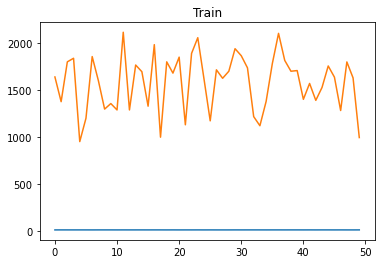

2/2 [==============================] - 4s 8ms/step


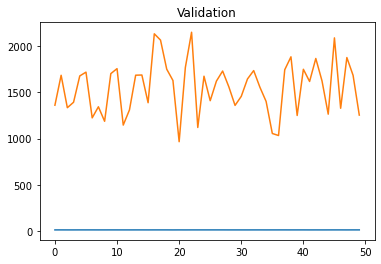

3/3 [==============================] - 0s 38ms/step


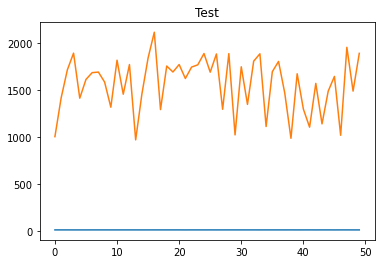

3/3 [==============================] - 0s 8ms/step


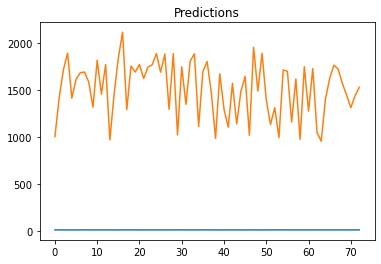

In [14]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2532376.7500 - root_mean_squared_error: 1591.3444 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 18s 2s/step - loss: 2528134.0000 - root_mean_squared_error: 1590.0107 - val_loss: 2501509.7500 - val_root_mean_squared_error: 1581.6162
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2527223.5000 - root_mean_squared_error: 1589.7244INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2527223.5000 - root_mean_squared_error: 1589.7244 - val_loss: 2500602.0000 - val_root_mean_squared_error: 1581.3292
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2533749.5000 - root_mean_squared_error: 1591.7756INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2526315.7500 - root_mean_squared_error: 1589.4388 - val_loss: 2499699.7500 - val_root_mean_squared_error: 1581.0438
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2572620.7500 - root_mean_squared_error: 1603.9391INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2525415.2500 - root_mean_squared_error: 1589.1555 - val_loss: 2498808.7500 - val_root_mean_squared_error: 1580.7621
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2528557.2500 - root_mean_squared_error: 1590.1438INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2524522.5000 - root_mean_squared_error: 1588.8746 - val_loss: 2497927.5000 - val_root_mean_squared_error: 1580.4833
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2524088.0000 - root_mean_squared_error: 1588.7379INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2523645.5000 - root_mean_squared_error: 1588.5986 - val_loss: 2497051.2500 - val_root_mean_squared_error: 1580.2061
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2522772.7500 - root_mean_squared_error: 1588.3239INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2522772.7500 - root_mean_squared_error: 1588.3239 - val_loss: 2496181.5000 - val_root_mean_squared_error: 1579.9309
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2519418.5000 - root_mean_squared_error: 1587.2676INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2521904.2500 - root_mean_squared_error: 1588.0504 - val_loss: 2495319.2500 - val_root_mean_squared_error: 1579.6580
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2514139.5000 - root_mean_squared_error: 1585.6039INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2521053.2500 - root_mean_squared_error: 1587.7825 - val_loss: 2494460.7500 - val_root_mean_squared_error: 1579.3862
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 2525326.2500 - root_mean_squared_error: 1589.1276INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2520197.5000 - root_mean_squared_error: 1587.5129 - val_loss: 2493613.0000 - val_root_mean_squared_error: 1579.1178
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2519363.2500 - root_mean_squared_error: 1587.2502INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2519363.2500 - root_mean_squared_error: 1587.2502 - val_loss: 2492775.2500 - val_root_mean_squared_error: 1578.8525
Epoch 12/50
5/8 [=================>............] - ETA: 0s - loss: 2598321.7500 - root_mean_squared_error: 1611.9310INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2518534.7500 - root_mean_squared_error: 1586.9893 - val_loss: 2491948.2500 - val_root_mean_squared_error: 1578.5906
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 2502480.5000 - root_mean_squared_error: 1581.9231INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2517715.0000 - root_mean_squared_error: 1586.7310 - val_loss: 2491140.5000 - val_root_mean_squared_error: 1578.3347
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2530269.2500 - root_mean_squared_error: 1590.6820INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2516918.5000 - root_mean_squared_error: 1586.4799 - val_loss: 2490347.0000 - val_root_mean_squared_error: 1578.0834
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2518794.5000 - root_mean_squared_error: 1587.0710INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2516134.2500 - root_mean_squared_error: 1586.2327 - val_loss: 2489571.7500 - val_root_mean_squared_error: 1577.8376
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 2538242.7500 - root_mean_squared_error: 1593.1864INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2515371.7500 - root_mean_squared_error: 1585.9923 - val_loss: 2488818.2500 - val_root_mean_squared_error: 1577.5989
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2467313.5000 - root_mean_squared_error: 1570.7684INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2514633.2500 - root_mean_squared_error: 1585.7595 - val_loss: 2488090.0000 - val_root_mean_squared_error: 1577.3680
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2513918.5000 - root_mean_squared_error: 1585.5342INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2513918.5000 - root_mean_squared_error: 1585.5342 - val_loss: 2487389.2500 - val_root_mean_squared_error: 1577.1459
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 2511137.7500 - root_mean_squared_error: 1584.6570INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2513238.2500 - root_mean_squared_error: 1585.3196 - val_loss: 2486717.7500 - val_root_mean_squared_error: 1576.9330
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2512575.5000 - root_mean_squared_error: 1585.1106INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 856ms/step - loss: 2512575.5000 - root_mean_squared_error: 1585.1106 - val_loss: 2486077.0000 - val_root_mean_squared_error: 1576.7299
Epoch 21/50
5/8 [=================>............] - ETA: 0s - loss: 2424186.0000 - root_mean_squared_error: 1556.9797INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2511947.7500 - root_mean_squared_error: 1584.9126 - val_loss: 2485456.5000 - val_root_mean_squared_error: 1576.5331
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2511136.2500 - root_mean_squared_error: 1584.6565INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2511344.2500 - root_mean_squared_error: 1584.7222 - val_loss: 2484862.5000 - val_root_mean_squared_error: 1576.3446
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 2480901.0000 - root_mean_squared_error: 1575.0876INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2510758.5000 - root_mean_squared_error: 1584.5374 - val_loss: 2484299.5000 - val_root_mean_squared_error: 1576.1660
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2561136.0000 - root_mean_squared_error: 1600.3550INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2510209.0000 - root_mean_squared_error: 1584.3639 - val_loss: 2483755.7500 - val_root_mean_squared_error: 1575.9935
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2553531.0000 - root_mean_squared_error: 1597.9772INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2509678.2500 - root_mean_squared_error: 1584.1964 - val_loss: 2483233.5000 - val_root_mean_squared_error: 1575.8279
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2509161.2500 - root_mean_squared_error: 1584.0332INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2509161.2500 - root_mean_squared_error: 1584.0332 - val_loss: 2482733.2500 - val_root_mean_squared_error: 1575.6692
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2517746.7500 - root_mean_squared_error: 1586.7410INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2508664.5000 - root_mean_squared_error: 1583.8765 - val_loss: 2482242.7500 - val_root_mean_squared_error: 1575.5134
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2516950.5000 - root_mean_squared_error: 1586.4900INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 932ms/step - loss: 2508178.7500 - root_mean_squared_error: 1583.7230 - val_loss: 2481765.5000 - val_root_mean_squared_error: 1575.3621
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2528443.2500 - root_mean_squared_error: 1590.1079INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 975ms/step - loss: 2507708.5000 - root_mean_squared_error: 1583.5746 - val_loss: 2481299.7500 - val_root_mean_squared_error: 1575.2142
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2538909.2500 - root_mean_squared_error: 1593.3955INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2507248.5000 - root_mean_squared_error: 1583.4293 - val_loss: 2480848.5000 - val_root_mean_squared_error: 1575.0709
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2544236.7500 - root_mean_squared_error: 1595.0664INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2506804.7500 - root_mean_squared_error: 1583.2892 - val_loss: 2480409.7500 - val_root_mean_squared_error: 1574.9316
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2506372.0000 - root_mean_squared_error: 1583.1526INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2506372.0000 - root_mean_squared_error: 1583.1526 - val_loss: 2479989.5000 - val_root_mean_squared_error: 1574.7982
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2509760.2500 - root_mean_squared_error: 1584.2223INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2505958.5000 - root_mean_squared_error: 1583.0220 - val_loss: 2479587.7500 - val_root_mean_squared_error: 1574.6707
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 2538748.0000 - root_mean_squared_error: 1593.3448INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2505567.0000 - root_mean_squared_error: 1582.8983 - val_loss: 2479200.2500 - val_root_mean_squared_error: 1574.5476
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2482573.2500 - root_mean_squared_error: 1575.6184INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2505185.0000 - root_mean_squared_error: 1582.7776 - val_loss: 2478829.2500 - val_root_mean_squared_error: 1574.4298
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 2527500.0000 - root_mean_squared_error: 1589.8113INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2504821.7500 - root_mean_squared_error: 1582.6628 - val_loss: 2478470.0000 - val_root_mean_squared_error: 1574.3157
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2505617.2500 - root_mean_squared_error: 1582.9142INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2504470.0000 - root_mean_squared_error: 1582.5518 - val_loss: 2478126.2500 - val_root_mean_squared_error: 1574.2065
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 2573977.2500 - root_mean_squared_error: 1604.3619INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 947ms/step - loss: 2504132.2500 - root_mean_squared_error: 1582.4451 - val_loss: 2477793.0000 - val_root_mean_squared_error: 1574.1007
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 2517024.0000 - root_mean_squared_error: 1586.5132INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2503802.7500 - root_mean_squared_error: 1582.3409 - val_loss: 2477469.5000 - val_root_mean_squared_error: 1573.9979
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2503484.7500 - root_mean_squared_error: 1582.2405INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 995ms/step - loss: 2503484.7500 - root_mean_squared_error: 1582.2405 - val_loss: 2477156.5000 - val_root_mean_squared_error: 1573.8986
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2471845.7500 - root_mean_squared_error: 1572.2104INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2503175.5000 - root_mean_squared_error: 1582.1427 - val_loss: 2476853.7500 - val_root_mean_squared_error: 1573.8024
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 2537265.0000 - root_mean_squared_error: 1592.8795INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2502877.7500 - root_mean_squared_error: 1582.0486 - val_loss: 2476557.5000 - val_root_mean_squared_error: 1573.7083
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 2441878.5000 - root_mean_squared_error: 1562.6511INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2502581.7500 - root_mean_squared_error: 1581.9551 - val_loss: 2476267.0000 - val_root_mean_squared_error: 1573.6158
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 2598259.7500 - root_mean_squared_error: 1611.9119INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2502297.2500 - root_mean_squared_error: 1581.8651 - val_loss: 2475979.5000 - val_root_mean_squared_error: 1573.5245
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2502011.2500 - root_mean_squared_error: 1581.7747INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2502011.2500 - root_mean_squared_error: 1581.7747 - val_loss: 2475699.2500 - val_root_mean_squared_error: 1573.4355
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2481941.2500 - root_mean_squared_error: 1575.4178INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2501732.5000 - root_mean_squared_error: 1581.6866 - val_loss: 2475424.5000 - val_root_mean_squared_error: 1573.3481
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 2478905.5000 - root_mean_squared_error: 1574.4540INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2501458.7500 - root_mean_squared_error: 1581.6001 - val_loss: 2475152.2500 - val_root_mean_squared_error: 1573.2617
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2508766.5000 - root_mean_squared_error: 1583.9086INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2501190.2500 - root_mean_squared_error: 1581.5151 - val_loss: 2474880.7500 - val_root_mean_squared_error: 1573.1754
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 2512042.2500 - root_mean_squared_error: 1584.9424INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2500920.0000 - root_mean_squared_error: 1581.4297 - val_loss: 2474614.2500 - val_root_mean_squared_error: 1573.0907
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 2516547.5000 - root_mean_squared_error: 1586.3630INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 19ms/step


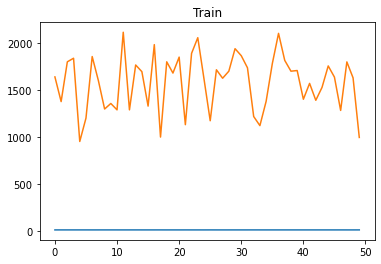

2/2 [==============================] - 1s 5ms/step


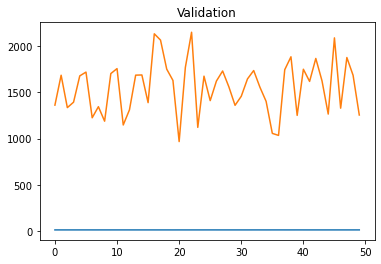

3/3 [==============================] - 0s 8ms/step


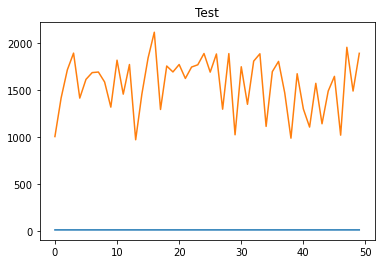

3/3 [==============================] - 0s 15ms/step


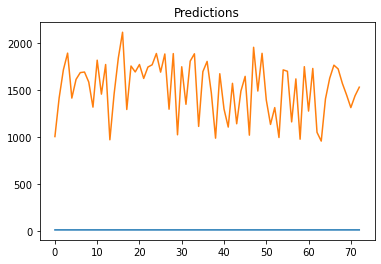

In [15]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [16]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2529916.5000 - root_mean_squared_error: 1590.5712 

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 8s 735ms/step - loss: 2516066.5000 - root_mean_squared_error: 1586.2114 - val_loss: 2480314.0000 - val_root_mean_squared_error: 1574.9012
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2524506.2500 - root_mean_squared_error: 1588.8695

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 473ms/step - loss: 2505067.2500 - root_mean_squared_error: 1582.7405 - val_loss: 2470341.0000 - val_root_mean_squared_error: 1571.7318
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 2428660.5000 - root_mean_squared_error: 1558.4160

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 316ms/step - loss: 2495176.7500 - root_mean_squared_error: 1579.6128 - val_loss: 2460289.7500 - val_root_mean_squared_error: 1568.5311
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2485263.2500 - root_mean_squared_error: 1576.4718

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 515ms/step - loss: 2485263.2500 - root_mean_squared_error: 1576.4718 - val_loss: 2450192.7500 - val_root_mean_squared_error: 1565.3092
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2455775.2500 - root_mean_squared_error: 1567.0913

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 498ms/step - loss: 2475375.7500 - root_mean_squared_error: 1573.3326 - val_loss: 2439992.7500 - val_root_mean_squared_error: 1562.0476
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2462214.7500 - root_mean_squared_error: 1569.1445

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 438ms/step - loss: 2465351.0000 - root_mean_squared_error: 1570.1437 - val_loss: 2429688.2500 - val_root_mean_squared_error: 1558.7458
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2455169.5000 - root_mean_squared_error: 1566.8981

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 407ms/step - loss: 2455169.5000 - root_mean_squared_error: 1566.8981 - val_loss: 2419271.7500 - val_root_mean_squared_error: 1555.4009
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 2325830.7500 - root_mean_squared_error: 1525.0675

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 382ms/step - loss: 2444841.0000 - root_mean_squared_error: 1563.5988 - val_loss: 2408690.7500 - val_root_mean_squared_error: 1551.9957
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2434453.2500 - root_mean_squared_error: 1560.2734

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 559ms/step - loss: 2434453.2500 - root_mean_squared_error: 1560.2734 - val_loss: 2397942.2500 - val_root_mean_squared_error: 1548.5291
Epoch 10/50
3/8 [==========>...................] - ETA: 0s - loss: 2345797.7500 - root_mean_squared_error: 1531.5997

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 595ms/step - loss: 2423897.7500 - root_mean_squared_error: 1556.8872 - val_loss: 2387125.7500 - val_root_mean_squared_error: 1545.0326
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 2408572.2500 - root_mean_squared_error: 1551.9575

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 344ms/step - loss: 2413214.7500 - root_mean_squared_error: 1553.4525 - val_loss: 2376107.0000 - val_root_mean_squared_error: 1541.4626
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2402312.5000 - root_mean_squared_error: 1549.9396

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 561ms/step - loss: 2402312.5000 - root_mean_squared_error: 1549.9396 - val_loss: 2364851.7500 - val_root_mean_squared_error: 1537.8075
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2393171.7500 - root_mean_squared_error: 1546.9879

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 460ms/step - loss: 2391192.2500 - root_mean_squared_error: 1546.3480 - val_loss: 2353411.2500 - val_root_mean_squared_error: 1534.0833
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2399371.2500 - root_mean_squared_error: 1548.9904

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 637ms/step - loss: 2379878.2500 - root_mean_squared_error: 1542.6854 - val_loss: 2341793.7500 - val_root_mean_squared_error: 1530.2921
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2376908.5000 - root_mean_squared_error: 1541.7225

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 630ms/step - loss: 2368341.7500 - root_mean_squared_error: 1538.9418 - val_loss: 2329933.2500 - val_root_mean_squared_error: 1526.4119
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 2342036.5000 - root_mean_squared_error: 1530.3713

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 610ms/step - loss: 2356600.0000 - root_mean_squared_error: 1535.1222 - val_loss: 2317860.5000 - val_root_mean_squared_error: 1522.4521
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2348953.5000 - root_mean_squared_error: 1532.6296

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 881ms/step - loss: 2344663.2500 - root_mean_squared_error: 1531.2294 - val_loss: 2305429.5000 - val_root_mean_squared_error: 1518.3641
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2323799.2500 - root_mean_squared_error: 1524.4012

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 484ms/step - loss: 2332404.5000 - root_mean_squared_error: 1527.2212 - val_loss: 2292754.2500 - val_root_mean_squared_error: 1514.1843
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2319822.5000 - root_mean_squared_error: 1523.0963

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 505ms/step - loss: 2319822.5000 - root_mean_squared_error: 1523.0963 - val_loss: 2279817.5000 - val_root_mean_squared_error: 1509.9064
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 2684160.5000 - root_mean_squared_error: 1638.3408

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 322ms/step - loss: 2307033.7500 - root_mean_squared_error: 1518.8923 - val_loss: 2266684.0000 - val_root_mean_squared_error: 1505.5510
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 2114747.5000 - root_mean_squared_error: 1454.2172

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 413ms/step - loss: 2294043.5000 - root_mean_squared_error: 1514.6100 - val_loss: 2253389.5000 - val_root_mean_squared_error: 1501.1294
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 2290807.5000 - root_mean_squared_error: 1513.5414

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 285ms/step - loss: 2280771.2500 - root_mean_squared_error: 1510.2223 - val_loss: 2239642.5000 - val_root_mean_squared_error: 1496.5435
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 2207635.5000 - root_mean_squared_error: 1485.8114

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 564ms/step - loss: 2267103.7500 - root_mean_squared_error: 1505.6904 - val_loss: 2225575.7500 - val_root_mean_squared_error: 1491.8364
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 2233695.0000 - root_mean_squared_error: 1494.5552

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 466ms/step - loss: 2253270.2500 - root_mean_squared_error: 1501.0897 - val_loss: 2211203.5000 - val_root_mean_squared_error: 1487.0116
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2209311.7500 - root_mean_squared_error: 1486.3754

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 575ms/step - loss: 2238990.5000 - root_mean_squared_error: 1496.3257 - val_loss: 2196780.2500 - val_root_mean_squared_error: 1482.1539
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2200690.0000 - root_mean_squared_error: 1483.4723

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 7s 990ms/step - loss: 2224601.7500 - root_mean_squared_error: 1491.5099 - val_loss: 2181848.5000 - val_root_mean_squared_error: 1477.1082
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2204466.2500 - root_mean_squared_error: 1484.7445

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 574ms/step - loss: 2209814.0000 - root_mean_squared_error: 1486.5443 - val_loss: 2166580.2500 - val_root_mean_squared_error: 1471.9308
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2203762.0000 - root_mean_squared_error: 1484.5073

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 615ms/step - loss: 2194705.0000 - root_mean_squared_error: 1481.4537 - val_loss: 2151085.2500 - val_root_mean_squared_error: 1466.6578
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2179417.7500 - root_mean_squared_error: 1476.2852

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 522ms/step - loss: 2179417.7500 - root_mean_squared_error: 1476.2852 - val_loss: 2135379.0000 - val_root_mean_squared_error: 1461.2936
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2164102.2500 - root_mean_squared_error: 1471.0887

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 452ms/step - loss: 2163768.7500 - root_mean_squared_error: 1470.9755 - val_loss: 2119436.5000 - val_root_mean_squared_error: 1455.8285
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2149947.7500 - root_mean_squared_error: 1466.2700

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 546ms/step - loss: 2147961.7500 - root_mean_squared_error: 1465.5927 - val_loss: 2103167.5000 - val_root_mean_squared_error: 1450.2301
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 2095734.0000 - root_mean_squared_error: 1447.6650

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 620ms/step - loss: 2131824.5000 - root_mean_squared_error: 1460.0769 - val_loss: 2086640.0000 - val_root_mean_squared_error: 1444.5206
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2096183.3750 - root_mean_squared_error: 1447.8202

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 473ms/step - loss: 2115452.7500 - root_mean_squared_error: 1454.4596 - val_loss: 2069739.7500 - val_root_mean_squared_error: 1438.6591
Epoch 34/50
5/8 [=================>............] - ETA: 0s - loss: 2071378.6250 - root_mean_squared_error: 1439.2285

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 522ms/step - loss: 2098763.2500 - root_mean_squared_error: 1448.7109 - val_loss: 2052670.3750 - val_root_mean_squared_error: 1432.7144
Epoch 35/50
4/8 [==============>...............] - ETA: 0s - loss: 2118726.2500 - root_mean_squared_error: 1455.5845

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 651ms/step - loss: 2081844.1250 - root_mean_squared_error: 1442.8597 - val_loss: 2035309.1250 - val_root_mean_squared_error: 1426.6426
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 2108533.2500 - root_mean_squared_error: 1452.0790

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2064660.6250 - root_mean_squared_error: 1436.8927 - val_loss: 2017672.8750 - val_root_mean_squared_error: 1420.4481
Epoch 37/50
1/8 [==>...........................] - ETA: 1s - loss: 2051951.0000 - root_mean_squared_error: 1432.4633

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 618ms/step - loss: 2047056.8750 - root_mean_squared_error: 1430.7539 - val_loss: 1999563.0000 - val_root_mean_squared_error: 1414.0591
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 2096686.7500 - root_mean_squared_error: 1447.9940

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 591ms/step - loss: 2029092.6250 - root_mean_squared_error: 1424.4623 - val_loss: 1980997.2500 - val_root_mean_squared_error: 1407.4790
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 1984359.8750 - root_mean_squared_error: 1408.6731

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 595ms/step - loss: 2010653.2500 - root_mean_squared_error: 1417.9751 - val_loss: 1962394.1250 - val_root_mean_squared_error: 1400.8547
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 1992106.7500 - root_mean_squared_error: 1411.4202

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 572ms/step - loss: 1992106.7500 - root_mean_squared_error: 1411.4202 - val_loss: 1943617.6250 - val_root_mean_squared_error: 1394.1368
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 1973774.0000 - root_mean_squared_error: 1404.9106

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 618ms/step - loss: 1973630.6250 - root_mean_squared_error: 1404.8596 - val_loss: 1924459.8750 - val_root_mean_squared_error: 1387.2490
Epoch 42/50
4/8 [==============>...............] - ETA: 0s - loss: 1994347.5000 - root_mean_squared_error: 1412.2137

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 481ms/step - loss: 1954589.7500 - root_mean_squared_error: 1398.0664 - val_loss: 1905116.0000 - val_root_mean_squared_error: 1380.2594
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2115071.0000 - root_mean_squared_error: 1454.3284

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 483ms/step - loss: 1935361.0000 - root_mean_squared_error: 1391.1725 - val_loss: 1885486.8750 - val_root_mean_squared_error: 1373.1304
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 1949552.2500 - root_mean_squared_error: 1396.2637

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 838ms/step - loss: 1915879.6250 - root_mean_squared_error: 1384.1531 - val_loss: 1865352.0000 - val_root_mean_squared_error: 1365.7789
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2184862.5000 - root_mean_squared_error: 1478.1281

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 573ms/step - loss: 1895957.6250 - root_mean_squared_error: 1376.9377 - val_loss: 1845078.1250 - val_root_mean_squared_error: 1358.3365
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 1886410.2500 - root_mean_squared_error: 1373.4666

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 451ms/step - loss: 1875861.7500 - root_mean_squared_error: 1369.6210 - val_loss: 1824733.7500 - val_root_mean_squared_error: 1350.8270
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 1726288.7500 - root_mean_squared_error: 1313.8831

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 529ms/step - loss: 1855576.5000 - root_mean_squared_error: 1362.1954 - val_loss: 1804311.1250 - val_root_mean_squared_error: 1343.2465
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 1835238.2500 - root_mean_squared_error: 1354.7096

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 460ms/step - loss: 1835238.2500 - root_mean_squared_error: 1354.7096 - val_loss: 1783469.3750 - val_root_mean_squared_error: 1335.4659
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 1828725.6250 - root_mean_squared_error: 1352.3038

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 631ms/step - loss: 1814644.3750 - root_mean_squared_error: 1347.0874 - val_loss: 1762573.7500 - val_root_mean_squared_error: 1327.6196
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 1793802.6250 - root_mean_squared_error: 1339.3292

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 8ms/step


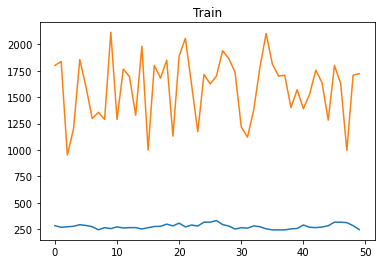

2/2 [==============================] - 0s 7ms/step


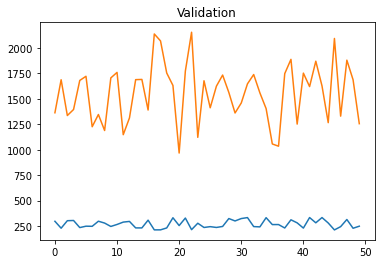

3/3 [==============================] - 0s 8ms/step


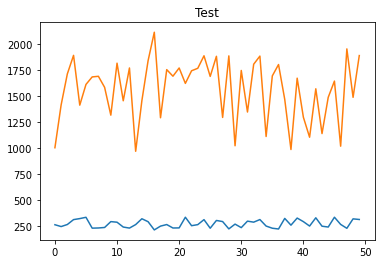

3/3 [==============================] - 0s 4ms/step


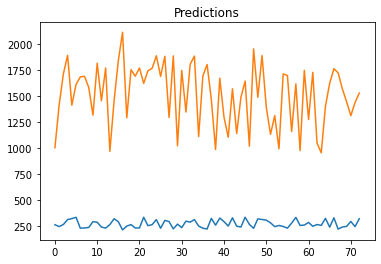

In [17]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2532651.2500 - root_mean_squared_error: 1591.4305

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 40s 4s/step - loss: 2532651.2500 - root_mean_squared_error: 1591.4305 - val_loss: 2504046.2500 - val_root_mean_squared_error: 1582.4178
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2526467.2500 - root_mean_squared_error: 1589.4865

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2532031.5000 - root_mean_squared_error: 1591.2358 - val_loss: 2503433.0000 - val_root_mean_squared_error: 1582.2241
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2531409.2500 - root_mean_squared_error: 1591.0403

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2531409.2500 - root_mean_squared_error: 1591.0403 - val_loss: 2502818.0000 - val_root_mean_squared_error: 1582.0297
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2530791.5000 - root_mean_squared_error: 1590.8462

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2530791.5000 - root_mean_squared_error: 1590.8462 - val_loss: 2502200.5000 - val_root_mean_squared_error: 1581.8346
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2528577.7500 - root_mean_squared_error: 1590.1503

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2530166.0000 - root_mean_squared_error: 1590.6495 - val_loss: 2501576.7500 - val_root_mean_squared_error: 1581.6373
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2565571.2500 - root_mean_squared_error: 1601.7401

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2529534.2500 - root_mean_squared_error: 1590.4509 - val_loss: 2500943.0000 - val_root_mean_squared_error: 1581.4370
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2528888.5000 - root_mean_squared_error: 1590.2479

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2528888.5000 - root_mean_squared_error: 1590.2479 - val_loss: 2500299.0000 - val_root_mean_squared_error: 1581.2334
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2528744.0000 - root_mean_squared_error: 1590.2025

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2528242.0000 - root_mean_squared_error: 1590.0447 - val_loss: 2499643.5000 - val_root_mean_squared_error: 1581.0261
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2527573.5000 - root_mean_squared_error: 1589.8345

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2527573.5000 - root_mean_squared_error: 1589.8345 - val_loss: 2498982.2500 - val_root_mean_squared_error: 1580.8170
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2516392.5000 - root_mean_squared_error: 1586.3141

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2526902.7500 - root_mean_squared_error: 1589.6234 - val_loss: 2498310.0000 - val_root_mean_squared_error: 1580.6044
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2526221.5000 - root_mean_squared_error: 1589.4092

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2526221.5000 - root_mean_squared_error: 1589.4092 - val_loss: 2497623.7500 - val_root_mean_squared_error: 1580.3871
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2525526.7500 - root_mean_squared_error: 1589.1906

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2525526.7500 - root_mean_squared_error: 1589.1906 - val_loss: 2496923.5000 - val_root_mean_squared_error: 1580.1656
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2487176.2500 - root_mean_squared_error: 1577.0784

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2524810.5000 - root_mean_squared_error: 1588.9652 - val_loss: 2496205.7500 - val_root_mean_squared_error: 1579.9385
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2518441.0000 - root_mean_squared_error: 1586.9597

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2524082.0000 - root_mean_squared_error: 1588.7360 - val_loss: 2495468.2500 - val_root_mean_squared_error: 1579.7051
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 2584095.0000 - root_mean_squared_error: 1607.5121

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2523337.7500 - root_mean_squared_error: 1588.5017 - val_loss: 2494715.5000 - val_root_mean_squared_error: 1579.4668
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2515944.2500 - root_mean_squared_error: 1586.1729

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2522571.7500 - root_mean_squared_error: 1588.2606 - val_loss: 2493952.5000 - val_root_mean_squared_error: 1579.2252
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2521252.0000 - root_mean_squared_error: 1587.8451

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2521800.7500 - root_mean_squared_error: 1588.0178 - val_loss: 2493168.7500 - val_root_mean_squared_error: 1578.9772
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2538860.5000 - root_mean_squared_error: 1593.3802

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2521008.2500 - root_mean_squared_error: 1587.7683 - val_loss: 2492373.0000 - val_root_mean_squared_error: 1578.7251
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2511901.7500 - root_mean_squared_error: 1584.8981

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2520203.0000 - root_mean_squared_error: 1587.5148 - val_loss: 2491565.7500 - val_root_mean_squared_error: 1578.4695
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2517422.7500 - root_mean_squared_error: 1586.6388

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2519386.7500 - root_mean_squared_error: 1587.2576 - val_loss: 2490742.2500 - val_root_mean_squared_error: 1578.2086
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2531189.2500 - root_mean_squared_error: 1590.9712

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2518557.2500 - root_mean_squared_error: 1586.9963 - val_loss: 2489912.7500 - val_root_mean_squared_error: 1577.9457
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2517728.5000 - root_mean_squared_error: 1586.7352

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2517728.5000 - root_mean_squared_error: 1586.7352 - val_loss: 2489082.5000 - val_root_mean_squared_error: 1577.6826
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2525311.7500 - root_mean_squared_error: 1589.1229

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2516891.5000 - root_mean_squared_error: 1586.4714 - val_loss: 2488252.5000 - val_root_mean_squared_error: 1577.4196
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2474704.2500 - root_mean_squared_error: 1573.1193

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2516059.0000 - root_mean_squared_error: 1586.2090 - val_loss: 2487424.7500 - val_root_mean_squared_error: 1577.1572
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2539142.7500 - root_mean_squared_error: 1593.4688

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2515234.0000 - root_mean_squared_error: 1585.9490 - val_loss: 2486597.2500 - val_root_mean_squared_error: 1576.8948
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2517102.5000 - root_mean_squared_error: 1586.5378

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2514410.7500 - root_mean_squared_error: 1585.6893 - val_loss: 2485785.7500 - val_root_mean_squared_error: 1576.6375
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2525403.7500 - root_mean_squared_error: 1589.1519

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2513604.0000 - root_mean_squared_error: 1585.4349 - val_loss: 2484995.0000 - val_root_mean_squared_error: 1576.3867
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2509476.2500 - root_mean_squared_error: 1584.1327

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2512823.0000 - root_mean_squared_error: 1585.1886 - val_loss: 2484226.2500 - val_root_mean_squared_error: 1576.1428
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2507499.7500 - root_mean_squared_error: 1583.5087

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2512066.0000 - root_mean_squared_error: 1584.9498 - val_loss: 2483474.5000 - val_root_mean_squared_error: 1575.9043
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2509291.5000 - root_mean_squared_error: 1584.0743

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2511322.7500 - root_mean_squared_error: 1584.7153 - val_loss: 2482748.5000 - val_root_mean_squared_error: 1575.6740
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2525585.2500 - root_mean_squared_error: 1589.2090

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2510606.0000 - root_mean_squared_error: 1584.4891 - val_loss: 2482051.2500 - val_root_mean_squared_error: 1575.4528
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2509924.0000 - root_mean_squared_error: 1584.2739

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2509924.0000 - root_mean_squared_error: 1584.2739 - val_loss: 2481383.0000 - val_root_mean_squared_error: 1575.2406
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 2529475.5000 - root_mean_squared_error: 1590.4325

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 2509267.2500 - root_mean_squared_error: 1584.0667 - val_loss: 2480739.5000 - val_root_mean_squared_error: 1575.0364
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2492415.2500 - root_mean_squared_error: 1578.7385

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2508629.5000 - root_mean_squared_error: 1583.8654 - val_loss: 2480115.5000 - val_root_mean_squared_error: 1574.8383
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2527359.2500 - root_mean_squared_error: 1589.7671

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2508018.2500 - root_mean_squared_error: 1583.6724 - val_loss: 2479511.7500 - val_root_mean_squared_error: 1574.6466
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 2486306.7500 - root_mean_squared_error: 1576.8027

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2507426.5000 - root_mean_squared_error: 1583.4856 - val_loss: 2478940.7500 - val_root_mean_squared_error: 1574.4652
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2492493.2500 - root_mean_squared_error: 1578.7632

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2506866.0000 - root_mean_squared_error: 1583.3086 - val_loss: 2478389.7500 - val_root_mean_squared_error: 1574.2903
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2465690.5000 - root_mean_squared_error: 1570.2517

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2506323.2500 - root_mean_squared_error: 1583.1372 - val_loss: 2477854.2500 - val_root_mean_squared_error: 1574.1201
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 2457511.5000 - root_mean_squared_error: 1567.6453

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2505797.5000 - root_mean_squared_error: 1582.9711 - val_loss: 2477345.0000 - val_root_mean_squared_error: 1573.9584
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2505296.5000 - root_mean_squared_error: 1582.8129

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2505296.5000 - root_mean_squared_error: 1582.8129 - val_loss: 2476851.0000 - val_root_mean_squared_error: 1573.8014
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2512892.0000 - root_mean_squared_error: 1585.2104

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2504814.7500 - root_mean_squared_error: 1582.6606 - val_loss: 2476378.0000 - val_root_mean_squared_error: 1573.6511
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2503285.7500 - root_mean_squared_error: 1582.1775

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2504352.5000 - root_mean_squared_error: 1582.5146 - val_loss: 2475923.7500 - val_root_mean_squared_error: 1573.5068
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2503903.0000 - root_mean_squared_error: 1582.3726

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2503903.0000 - root_mean_squared_error: 1582.3726 - val_loss: 2475487.0000 - val_root_mean_squared_error: 1573.3680
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2500695.5000 - root_mean_squared_error: 1581.3588

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2503474.5000 - root_mean_squared_error: 1582.2372 - val_loss: 2475061.2500 - val_root_mean_squared_error: 1573.2328
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 2506820.7500 - root_mean_squared_error: 1583.2943

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2503057.2500 - root_mean_squared_error: 1582.1053 - val_loss: 2474651.5000 - val_root_mean_squared_error: 1573.1025
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2502655.2500 - root_mean_squared_error: 1581.9783

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2502655.2500 - root_mean_squared_error: 1581.9783 - val_loss: 2474255.5000 - val_root_mean_squared_error: 1572.9767
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2502267.5000 - root_mean_squared_error: 1581.8557

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2502267.5000 - root_mean_squared_error: 1581.8557 - val_loss: 2473874.7500 - val_root_mean_squared_error: 1572.8556
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2498354.0000 - root_mean_squared_error: 1580.6183

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2501893.5000 - root_mean_squared_error: 1581.7375 - val_loss: 2473506.7500 - val_root_mean_squared_error: 1572.7386
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2508484.0000 - root_mean_squared_error: 1583.8195

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2501531.0000 - root_mean_squared_error: 1581.6229 - val_loss: 2473149.0000 - val_root_mean_squared_error: 1572.6249
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2511005.2500 - root_mean_squared_error: 1584.6152

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 2s 10ms/step


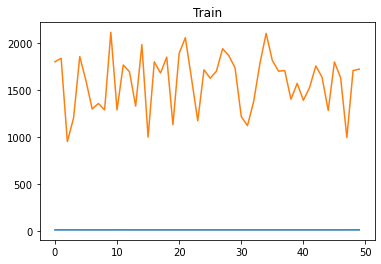

2/2 [==============================] - 2s 7ms/step


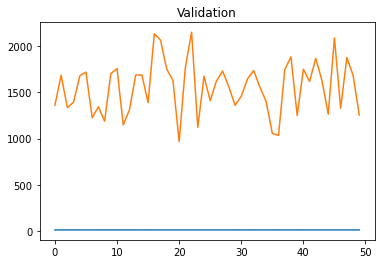

3/3 [==============================] - 0s 29ms/step


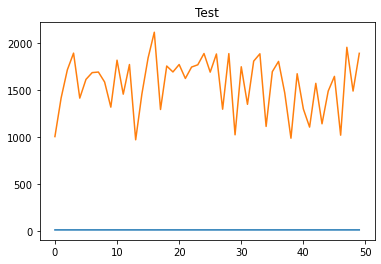

3/3 [==============================] - 0s 6ms/step


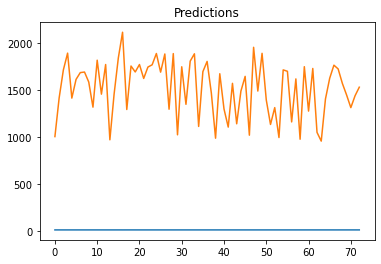

In [18]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2543469.5000 - root_mean_squared_error: 1594.8258

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 41s 4s/step - loss: 2532065.7500 - root_mean_squared_error: 1591.2466 - val_loss: 2503568.7500 - val_root_mean_squared_error: 1582.2668
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2531622.5000 - root_mean_squared_error: 1591.1073

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2531622.5000 - root_mean_squared_error: 1591.1073 - val_loss: 2503126.5000 - val_root_mean_squared_error: 1582.1273
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2531197.0000 - root_mean_squared_error: 1590.9736

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2531197.0000 - root_mean_squared_error: 1590.9736 - val_loss: 2502760.5000 - val_root_mean_squared_error: 1582.0116
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2547748.2500 - root_mean_squared_error: 1596.1667

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2530847.2500 - root_mean_squared_error: 1590.8636 - val_loss: 2502416.5000 - val_root_mean_squared_error: 1581.9028
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2530518.0000 - root_mean_squared_error: 1590.7603

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2530518.0000 - root_mean_squared_error: 1590.7603 - val_loss: 2502112.5000 - val_root_mean_squared_error: 1581.8068
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2514543.2500 - root_mean_squared_error: 1585.7312

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2530216.5000 - root_mean_squared_error: 1590.6654 - val_loss: 2501808.7500 - val_root_mean_squared_error: 1581.7107
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 2539570.2500 - root_mean_squared_error: 1593.6029

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2529917.5000 - root_mean_squared_error: 1590.5714 - val_loss: 2501510.0000 - val_root_mean_squared_error: 1581.6162
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2520605.2500 - root_mean_squared_error: 1587.6414

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2529616.0000 - root_mean_squared_error: 1590.4767 - val_loss: 2501210.7500 - val_root_mean_squared_error: 1581.5216
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2529313.2500 - root_mean_squared_error: 1590.3815

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2529313.2500 - root_mean_squared_error: 1590.3815 - val_loss: 2500906.2500 - val_root_mean_squared_error: 1581.4254
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2534360.2500 - root_mean_squared_error: 1591.9674

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2529004.0000 - root_mean_squared_error: 1590.2843 - val_loss: 2500588.2500 - val_root_mean_squared_error: 1581.3248
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2528679.7500 - root_mean_squared_error: 1590.1823

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2528679.7500 - root_mean_squared_error: 1590.1823 - val_loss: 2500254.2500 - val_root_mean_squared_error: 1581.2192
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2545722.0000 - root_mean_squared_error: 1595.5319

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2528336.7500 - root_mean_squared_error: 1590.0745 - val_loss: 2499903.5000 - val_root_mean_squared_error: 1581.1083
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2525370.2500 - root_mean_squared_error: 1589.1414

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2527978.7500 - root_mean_squared_error: 1589.9619 - val_loss: 2499529.0000 - val_root_mean_squared_error: 1580.9899
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2538815.2500 - root_mean_squared_error: 1593.3660

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2527590.2500 - root_mean_squared_error: 1589.8397 - val_loss: 2499127.2500 - val_root_mean_squared_error: 1580.8628
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 2528031.2500 - root_mean_squared_error: 1589.9784

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2527177.0000 - root_mean_squared_error: 1589.7097 - val_loss: 2498695.7500 - val_root_mean_squared_error: 1580.7264
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2526731.5000 - root_mean_squared_error: 1589.5696

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2526731.5000 - root_mean_squared_error: 1589.5696 - val_loss: 2498231.2500 - val_root_mean_squared_error: 1580.5793
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 2536449.7500 - root_mean_squared_error: 1592.6235

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2526256.0000 - root_mean_squared_error: 1589.4200 - val_loss: 2497736.5000 - val_root_mean_squared_error: 1580.4229
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2534982.2500 - root_mean_squared_error: 1592.1627

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2525749.0000 - root_mean_squared_error: 1589.2605 - val_loss: 2497217.0000 - val_root_mean_squared_error: 1580.2585
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2525218.7500 - root_mean_squared_error: 1589.0936

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2525218.7500 - root_mean_squared_error: 1589.0936 - val_loss: 2496671.2500 - val_root_mean_squared_error: 1580.0858
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2529142.7500 - root_mean_squared_error: 1590.3279

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2524658.2500 - root_mean_squared_error: 1588.9174 - val_loss: 2496098.5000 - val_root_mean_squared_error: 1579.9045
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2524076.5000 - root_mean_squared_error: 1588.7343

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2524076.5000 - root_mean_squared_error: 1588.7343 - val_loss: 2495500.7500 - val_root_mean_squared_error: 1579.7155
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2525934.7500 - root_mean_squared_error: 1589.3190

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2523466.2500 - root_mean_squared_error: 1588.5422 - val_loss: 2494880.2500 - val_root_mean_squared_error: 1579.5190
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2522838.2500 - root_mean_squared_error: 1588.3445

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2522838.2500 - root_mean_squared_error: 1588.3445 - val_loss: 2494240.5000 - val_root_mean_squared_error: 1579.3164
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2522188.5000 - root_mean_squared_error: 1588.1399

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2522188.5000 - root_mean_squared_error: 1588.1399 - val_loss: 2493584.0000 - val_root_mean_squared_error: 1579.1086
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2534147.7500 - root_mean_squared_error: 1591.9006

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2521515.2500 - root_mean_squared_error: 1587.9280 - val_loss: 2492910.5000 - val_root_mean_squared_error: 1578.8954
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2517310.2500 - root_mean_squared_error: 1586.6034

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2520836.2500 - root_mean_squared_error: 1587.7141 - val_loss: 2492215.7500 - val_root_mean_squared_error: 1578.6753
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 2501405.2500 - root_mean_squared_error: 1581.5831

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2520129.5000 - root_mean_squared_error: 1587.4916 - val_loss: 2491498.5000 - val_root_mean_squared_error: 1578.4481
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 2526316.2500 - root_mean_squared_error: 1589.4390

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2519397.5000 - root_mean_squared_error: 1587.2610 - val_loss: 2490756.5000 - val_root_mean_squared_error: 1578.2130
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2516387.7500 - root_mean_squared_error: 1586.3126

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2518644.2500 - root_mean_squared_error: 1587.0237 - val_loss: 2490004.5000 - val_root_mean_squared_error: 1577.9749
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2525019.5000 - root_mean_squared_error: 1589.0310

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2517882.7500 - root_mean_squared_error: 1586.7838 - val_loss: 2489238.2500 - val_root_mean_squared_error: 1577.7321
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2492422.7500 - root_mean_squared_error: 1578.7408

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2517108.5000 - root_mean_squared_error: 1586.5398 - val_loss: 2488472.5000 - val_root_mean_squared_error: 1577.4893
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2516344.2500 - root_mean_squared_error: 1586.2990

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2516344.2500 - root_mean_squared_error: 1586.2990 - val_loss: 2487702.5000 - val_root_mean_squared_error: 1577.2452
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2529762.5000 - root_mean_squared_error: 1590.5227

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2515579.5000 - root_mean_squared_error: 1586.0579 - val_loss: 2486943.2500 - val_root_mean_squared_error: 1577.0045
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2511541.2500 - root_mean_squared_error: 1584.7843

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2514819.7500 - root_mean_squared_error: 1585.8184 - val_loss: 2486190.5000 - val_root_mean_squared_error: 1576.7657
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2527497.2500 - root_mean_squared_error: 1589.8104

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2514079.7500 - root_mean_squared_error: 1585.5850 - val_loss: 2485445.5000 - val_root_mean_squared_error: 1576.5295
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2511403.2500 - root_mean_squared_error: 1584.7407

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2513339.2500 - root_mean_squared_error: 1585.3514 - val_loss: 2484718.0000 - val_root_mean_squared_error: 1576.2988
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2512611.5000 - root_mean_squared_error: 1585.1219

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2512611.5000 - root_mean_squared_error: 1585.1219 - val_loss: 2483994.0000 - val_root_mean_squared_error: 1576.0692
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2520044.2500 - root_mean_squared_error: 1587.4647

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2511887.0000 - root_mean_squared_error: 1584.8934 - val_loss: 2483272.5000 - val_root_mean_squared_error: 1575.8403
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2511170.7500 - root_mean_squared_error: 1584.6674

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2511170.7500 - root_mean_squared_error: 1584.6674 - val_loss: 2482565.7500 - val_root_mean_squared_error: 1575.6160
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2508552.5000 - root_mean_squared_error: 1583.8411

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2510468.0000 - root_mean_squared_error: 1584.4457 - val_loss: 2481862.5000 - val_root_mean_squared_error: 1575.3928
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2528115.2500 - root_mean_squared_error: 1590.0048

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2509770.0000 - root_mean_squared_error: 1584.2253 - val_loss: 2481163.5000 - val_root_mean_squared_error: 1575.1709
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2509074.2500 - root_mean_squared_error: 1584.0057

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2509074.2500 - root_mean_squared_error: 1584.0057 - val_loss: 2480475.7500 - val_root_mean_squared_error: 1574.9526
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 2496588.2500 - root_mean_squared_error: 1580.0596

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2508387.0000 - root_mean_squared_error: 1583.7888 - val_loss: 2479787.0000 - val_root_mean_squared_error: 1574.7339
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 2536860.5000 - root_mean_squared_error: 1592.7524

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2507700.7500 - root_mean_squared_error: 1583.5721 - val_loss: 2479090.7500 - val_root_mean_squared_error: 1574.5128
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2507005.2500 - root_mean_squared_error: 1583.3525

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2507005.2500 - root_mean_squared_error: 1583.3525 - val_loss: 2478402.0000 - val_root_mean_squared_error: 1574.2941
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2495001.5000 - root_mean_squared_error: 1579.5574

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2506315.5000 - root_mean_squared_error: 1583.1348 - val_loss: 2477715.0000 - val_root_mean_squared_error: 1574.0759
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2505634.7500 - root_mean_squared_error: 1582.9197

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2505634.7500 - root_mean_squared_error: 1582.9197 - val_loss: 2477028.5000 - val_root_mean_squared_error: 1573.8578
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 2418320.2500 - root_mean_squared_error: 1555.0950

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2504943.0000 - root_mean_squared_error: 1582.7012 - val_loss: 2476352.0000 - val_root_mean_squared_error: 1573.6429
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2504275.7500 - root_mean_squared_error: 1582.4904

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2504275.7500 - root_mean_squared_error: 1582.4904 - val_loss: 2475686.0000 - val_root_mean_squared_error: 1573.4313
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2489625.5000 - root_mean_squared_error: 1577.8547

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 5s 14ms/step


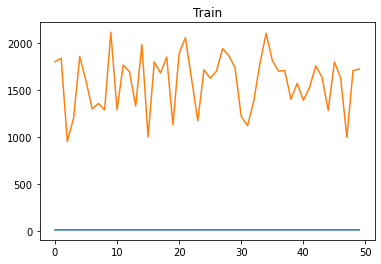

2/2 [==============================] - 3s 8ms/step


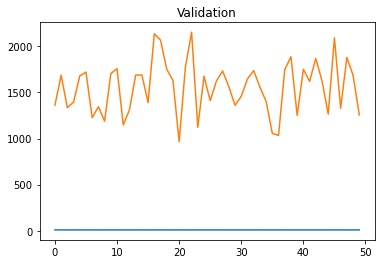

3/3 [==============================] - 0s 7ms/step


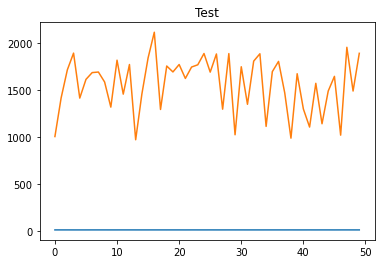

3/3 [==============================] - 1s 92ms/step


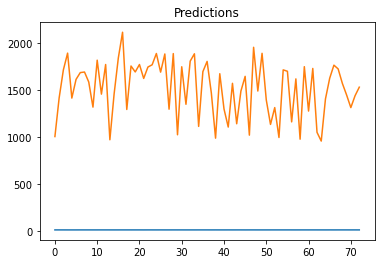

In [19]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2529922.0000 - root_mean_squared_error: 1590.5729  INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 19s 1s/step - loss: 2533650.2500 - root_mean_squared_error: 1591.7444 - val_loss: 2504648.7500 - val_root_mean_squared_error: 1582.6082
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 2514850.5000 - root_mean_squared_error: 1585.8280INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2532413.7500 - root_mean_squared_error: 1591.3560 - val_loss: 2503425.0000 - val_root_mean_squared_error: 1582.2216
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2533891.7500 - root_mean_squared_error: 1591.8203INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2531161.7500 - root_mean_squared_error: 1590.9625 - val_loss: 2502209.7500 - val_root_mean_squared_error: 1581.8374
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2539136.0000 - root_mean_squared_error: 1593.4667INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2529932.5000 - root_mean_squared_error: 1590.5762 - val_loss: 2501000.7500 - val_root_mean_squared_error: 1581.4553
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2526041.7500 - root_mean_squared_error: 1589.3527INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2528708.7500 - root_mean_squared_error: 1590.1914 - val_loss: 2499805.5000 - val_root_mean_squared_error: 1581.0773
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2508187.7500 - root_mean_squared_error: 1583.7260INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2527493.7500 - root_mean_squared_error: 1589.8093 - val_loss: 2498622.2500 - val_root_mean_squared_error: 1580.7031
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2526298.0000 - root_mean_squared_error: 1589.4332INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2526298.0000 - root_mean_squared_error: 1589.4332 - val_loss: 2497451.5000 - val_root_mean_squared_error: 1580.3328
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2516478.0000 - root_mean_squared_error: 1586.3411INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2525113.7500 - root_mean_squared_error: 1589.0607 - val_loss: 2496289.5000 - val_root_mean_squared_error: 1579.9651
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 2502368.7500 - root_mean_squared_error: 1581.8877INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2523942.0000 - root_mean_squared_error: 1588.6919 - val_loss: 2495153.7500 - val_root_mean_squared_error: 1579.6056
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 2482301.2500 - root_mean_squared_error: 1575.5321INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2522800.2500 - root_mean_squared_error: 1588.3325 - val_loss: 2494042.0000 - val_root_mean_squared_error: 1579.2537
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2521694.7500 - root_mean_squared_error: 1587.9845INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2521694.7500 - root_mean_squared_error: 1587.9845 - val_loss: 2492954.7500 - val_root_mean_squared_error: 1578.9093
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2544772.2500 - root_mean_squared_error: 1595.2343INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2520614.0000 - root_mean_squared_error: 1587.6442 - val_loss: 2491896.2500 - val_root_mean_squared_error: 1578.5741
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2511373.0000 - root_mean_squared_error: 1584.7312INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2519565.5000 - root_mean_squared_error: 1587.3140 - val_loss: 2490870.5000 - val_root_mean_squared_error: 1578.2491
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2518551.7500 - root_mean_squared_error: 1586.9945INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2518551.7500 - root_mean_squared_error: 1586.9945 - val_loss: 2489881.7500 - val_root_mean_squared_error: 1577.9359
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 2544268.7500 - root_mean_squared_error: 1595.0764INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2517581.2500 - root_mean_squared_error: 1586.6887 - val_loss: 2488943.5000 - val_root_mean_squared_error: 1577.6385
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2510749.7500 - root_mean_squared_error: 1584.5345INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2516655.5000 - root_mean_squared_error: 1586.3970 - val_loss: 2488044.7500 - val_root_mean_squared_error: 1577.3538
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2515769.7500 - root_mean_squared_error: 1586.1178INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2515769.7500 - root_mean_squared_error: 1586.1178 - val_loss: 2487178.0000 - val_root_mean_squared_error: 1577.0790
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2595831.7500 - root_mean_squared_error: 1611.1586INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2514922.2500 - root_mean_squared_error: 1585.8506 - val_loss: 2486346.0000 - val_root_mean_squared_error: 1576.8152
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 2470329.7500 - root_mean_squared_error: 1571.7283INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2514104.2500 - root_mean_squared_error: 1585.5928 - val_loss: 2485562.5000 - val_root_mean_squared_error: 1576.5667
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2485505.0000 - root_mean_squared_error: 1576.5485INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2513332.7500 - root_mean_squared_error: 1585.3494 - val_loss: 2484813.2500 - val_root_mean_squared_error: 1576.3291
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2512602.2500 - root_mean_squared_error: 1585.1190INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2512602.2500 - root_mean_squared_error: 1585.1190 - val_loss: 2484102.0000 - val_root_mean_squared_error: 1576.1034
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2527226.7500 - root_mean_squared_error: 1589.7253INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2511906.5000 - root_mean_squared_error: 1584.8995 - val_loss: 2483424.0000 - val_root_mean_squared_error: 1575.8883
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 2502634.7500 - root_mean_squared_error: 1581.9718INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2511245.7500 - root_mean_squared_error: 1584.6910 - val_loss: 2482781.7500 - val_root_mean_squared_error: 1575.6846
Epoch 24/50
3/8 [==========>...................] - ETA: 0s - loss: 2500398.0000 - root_mean_squared_error: 1581.2646INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2510613.0000 - root_mean_squared_error: 1584.4915 - val_loss: 2482162.5000 - val_root_mean_squared_error: 1575.4880
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 2491537.5000 - root_mean_squared_error: 1578.4604INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2510008.0000 - root_mean_squared_error: 1584.3005 - val_loss: 2481567.5000 - val_root_mean_squared_error: 1575.2993
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2509429.7500 - root_mean_squared_error: 1584.1179INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2509429.7500 - root_mean_squared_error: 1584.1179 - val_loss: 2481003.2500 - val_root_mean_squared_error: 1575.1200
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2500854.7500 - root_mean_squared_error: 1581.4091INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2508876.0000 - root_mean_squared_error: 1583.9432 - val_loss: 2480461.5000 - val_root_mean_squared_error: 1574.9480
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2508344.7500 - root_mean_squared_error: 1583.7755INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2508344.7500 - root_mean_squared_error: 1583.7755 - val_loss: 2479933.7500 - val_root_mean_squared_error: 1574.7805
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2474627.2500 - root_mean_squared_error: 1573.0948INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2507825.7500 - root_mean_squared_error: 1583.6116 - val_loss: 2479421.7500 - val_root_mean_squared_error: 1574.6179
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 2529470.7500 - root_mean_squared_error: 1590.4310INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2507326.5000 - root_mean_squared_error: 1583.4540 - val_loss: 2478920.7500 - val_root_mean_squared_error: 1574.4589
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 2487151.2500 - root_mean_squared_error: 1577.0704INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2506831.7500 - root_mean_squared_error: 1583.2977 - val_loss: 2478432.7500 - val_root_mean_squared_error: 1574.3038
Epoch 32/50
3/8 [==========>...................] - ETA: 0s - loss: 2576885.0000 - root_mean_squared_error: 1605.2679INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2506350.5000 - root_mean_squared_error: 1583.1458 - val_loss: 2477946.0000 - val_root_mean_squared_error: 1574.1493
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2505869.7500 - root_mean_squared_error: 1582.9939INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2505869.7500 - root_mean_squared_error: 1582.9939 - val_loss: 2477469.5000 - val_root_mean_squared_error: 1573.9979
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2505396.7500 - root_mean_squared_error: 1582.8445INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2505396.7500 - root_mean_squared_error: 1582.8445 - val_loss: 2476995.7500 - val_root_mean_squared_error: 1573.8474
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2496321.2500 - root_mean_squared_error: 1579.9751INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2504928.7500 - root_mean_squared_error: 1582.6967 - val_loss: 2476530.5000 - val_root_mean_squared_error: 1573.6996
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 2524975.0000 - root_mean_squared_error: 1589.0170INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2504471.7500 - root_mean_squared_error: 1582.5522 - val_loss: 2476077.7500 - val_root_mean_squared_error: 1573.5558
Epoch 37/50
4/8 [==============>...............] - ETA: 0s - loss: 2512132.0000 - root_mean_squared_error: 1584.9707INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2504028.5000 - root_mean_squared_error: 1582.4122 - val_loss: 2475640.7500 - val_root_mean_squared_error: 1573.4169
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2503600.0000 - root_mean_squared_error: 1582.2769INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2503600.0000 - root_mean_squared_error: 1582.2769 - val_loss: 2475219.2500 - val_root_mean_squared_error: 1573.2830
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 2482990.7500 - root_mean_squared_error: 1575.7509INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2503189.2500 - root_mean_squared_error: 1582.1471 - val_loss: 2474818.7500 - val_root_mean_squared_error: 1573.1556
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2524342.5000 - root_mean_squared_error: 1588.8180INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2502799.0000 - root_mean_squared_error: 1582.0237 - val_loss: 2474435.2500 - val_root_mean_squared_error: 1573.0338
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2474664.2500 - root_mean_squared_error: 1573.1066INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2502425.7500 - root_mean_squared_error: 1581.9058 - val_loss: 2474073.0000 - val_root_mean_squared_error: 1572.9186
Epoch 42/50
4/8 [==============>...............] - ETA: 0s - loss: 2509717.2500 - root_mean_squared_error: 1584.2087INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2502070.2500 - root_mean_squared_error: 1581.7933 - val_loss: 2473723.2500 - val_root_mean_squared_error: 1572.8075
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 2446272.7500 - root_mean_squared_error: 1564.0565INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2501726.2500 - root_mean_squared_error: 1581.6846 - val_loss: 2473383.2500 - val_root_mean_squared_error: 1572.6993
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 2556434.5000 - root_mean_squared_error: 1598.8854INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2501392.7500 - root_mean_squared_error: 1581.5792 - val_loss: 2473051.5000 - val_root_mean_squared_error: 1572.5939
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 2527974.7500 - root_mean_squared_error: 1589.9606INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2501066.2500 - root_mean_squared_error: 1581.4760 - val_loss: 2472730.5000 - val_root_mean_squared_error: 1572.4918
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2492703.7500 - root_mean_squared_error: 1578.8298INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2500748.7500 - root_mean_squared_error: 1581.3756 - val_loss: 2472416.5000 - val_root_mean_squared_error: 1572.3920
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 2567714.5000 - root_mean_squared_error: 1602.4089INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2500440.2500 - root_mean_squared_error: 1581.2781 - val_loss: 2472112.7500 - val_root_mean_squared_error: 1572.2954
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2505416.0000 - root_mean_squared_error: 1582.8506INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2500139.2500 - root_mean_squared_error: 1581.1829 - val_loss: 2471819.2500 - val_root_mean_squared_error: 1572.2020
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 2518813.5000 - root_mean_squared_error: 1587.0770INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2499852.7500 - root_mean_squared_error: 1581.0923 - val_loss: 2471531.7500 - val_root_mean_squared_error: 1572.1107
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 2476259.7500 - root_mean_squared_error: 1573.6136INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 3s 18ms/step


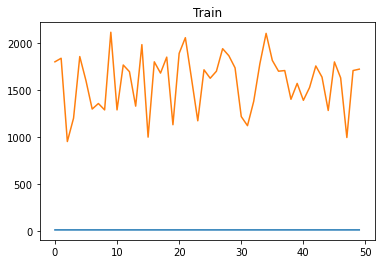

2/2 [==============================] - 1s 8ms/step


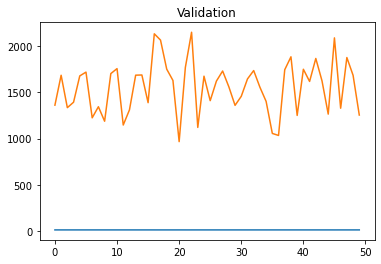

3/3 [==============================] - 0s 5ms/step


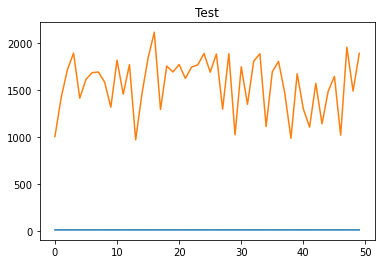

3/3 [==============================] - 0s 5ms/step


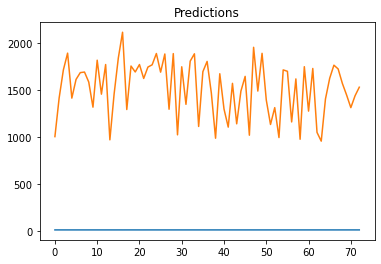

In [20]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 2567587.0000 - root_mean_squared_error: 1602.3691 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 10s 945ms/step - loss: 2537996.2500 - root_mean_squared_error: 1593.1090 - val_loss: 2505885.0000 - val_root_mean_squared_error: 1582.9988
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2529197.7500 - root_mean_squared_error: 1590.3452

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 864ms/step - loss: 2529197.7500 - root_mean_squared_error: 1590.3452 - val_loss: 2495653.7500 - val_root_mean_squared_error: 1579.7638
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2512060.2500 - root_mean_squared_error: 1584.9480

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 546ms/step - loss: 2519960.7500 - root_mean_squared_error: 1587.4385 - val_loss: 2487727.0000 - val_root_mean_squared_error: 1577.2531
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 2507861.5000 - root_mean_squared_error: 1583.6229

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2511570.0000 - root_mean_squared_error: 1584.7933 - val_loss: 2479352.0000 - val_root_mean_squared_error: 1574.5958
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2495817.7500 - root_mean_squared_error: 1579.8157

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 704ms/step - loss: 2504194.5000 - root_mean_squared_error: 1582.4647 - val_loss: 2470292.5000 - val_root_mean_squared_error: 1571.7164
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2493642.7500 - root_mean_squared_error: 1579.1272

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 718ms/step - loss: 2493642.7500 - root_mean_squared_error: 1579.1272 - val_loss: 2460740.7500 - val_root_mean_squared_error: 1568.6748
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2484437.5000 - root_mean_squared_error: 1576.2098

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 957ms/step - loss: 2484437.5000 - root_mean_squared_error: 1576.2098 - val_loss: 2450763.2500 - val_root_mean_squared_error: 1565.4913
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2475497.2500 - root_mean_squared_error: 1573.3713

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 850ms/step - loss: 2475497.2500 - root_mean_squared_error: 1573.3713 - val_loss: 2440342.5000 - val_root_mean_squared_error: 1562.1595
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2464284.5000 - root_mean_squared_error: 1569.8040

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2464284.5000 - root_mean_squared_error: 1569.8040 - val_loss: 2429403.5000 - val_root_mean_squared_error: 1558.6544
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 2495736.5000 - root_mean_squared_error: 1579.7900

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 652ms/step - loss: 2453773.7500 - root_mean_squared_error: 1566.4526 - val_loss: 2417771.0000 - val_root_mean_squared_error: 1554.9183
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2442512.7500 - root_mean_squared_error: 1562.8540

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2441343.0000 - root_mean_squared_error: 1562.4797 - val_loss: 2405469.2500 - val_root_mean_squared_error: 1550.9575
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2453030.5000 - root_mean_squared_error: 1566.2153

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 629ms/step - loss: 2428325.2500 - root_mean_squared_error: 1558.3085 - val_loss: 2392286.0000 - val_root_mean_squared_error: 1546.7017
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2416628.7500 - root_mean_squared_error: 1554.5510

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 934ms/step - loss: 2416628.7500 - root_mean_squared_error: 1554.5510 - val_loss: 2378119.7500 - val_root_mean_squared_error: 1542.1154
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2423350.7500 - root_mean_squared_error: 1556.7115

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 841ms/step - loss: 2400938.5000 - root_mean_squared_error: 1549.4962 - val_loss: 2362913.7500 - val_root_mean_squared_error: 1537.1772
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2376224.0000 - root_mean_squared_error: 1541.5006

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 859ms/step - loss: 2385548.5000 - root_mean_squared_error: 1544.5221 - val_loss: 2346534.0000 - val_root_mean_squared_error: 1531.8401
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2357840.2500 - root_mean_squared_error: 1535.5260

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 781ms/step - loss: 2369390.0000 - root_mean_squared_error: 1539.2823 - val_loss: 2328851.7500 - val_root_mean_squared_error: 1526.0576
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2406572.5000 - root_mean_squared_error: 1551.3131

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 784ms/step - loss: 2351828.2500 - root_mean_squared_error: 1533.5671 - val_loss: 2309619.0000 - val_root_mean_squared_error: 1519.7430
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2330313.5000 - root_mean_squared_error: 1526.5365

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 594ms/step - loss: 2332690.5000 - root_mean_squared_error: 1527.3148 - val_loss: 2289100.5000 - val_root_mean_squared_error: 1512.9774
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 2263777.2500 - root_mean_squared_error: 1504.5854

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 819ms/step - loss: 2311088.7500 - root_mean_squared_error: 1520.2266 - val_loss: 2266932.7500 - val_root_mean_squared_error: 1505.6337
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2288058.7500 - root_mean_squared_error: 1512.6331

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2288058.7500 - root_mean_squared_error: 1512.6331 - val_loss: 2242995.2500 - val_root_mean_squared_error: 1497.6632
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2264264.7500 - root_mean_squared_error: 1504.7474

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2265486.0000 - root_mean_squared_error: 1505.1532 - val_loss: 2217557.2500 - val_root_mean_squared_error: 1489.1465
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 2307054.0000 - root_mean_squared_error: 1518.8989

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 811ms/step - loss: 2241246.7500 - root_mean_squared_error: 1497.0793 - val_loss: 2190137.7500 - val_root_mean_squared_error: 1479.9114
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 2203591.2500 - root_mean_squared_error: 1484.4498

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 724ms/step - loss: 2212390.7500 - root_mean_squared_error: 1487.4108 - val_loss: 2160928.7500 - val_root_mean_squared_error: 1470.0098
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2155332.2500 - root_mean_squared_error: 1468.1050

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 663ms/step - loss: 2184320.5000 - root_mean_squared_error: 1477.9447 - val_loss: 2129794.0000 - val_root_mean_squared_error: 1459.3813
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2154002.7500 - root_mean_squared_error: 1467.6521

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2150772.0000 - root_mean_squared_error: 1466.5510 - val_loss: 2096346.1250 - val_root_mean_squared_error: 1447.8765
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2118185.7500 - root_mean_squared_error: 1455.3988

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 972ms/step - loss: 2118185.7500 - root_mean_squared_error: 1455.3988 - val_loss: 2061105.1250 - val_root_mean_squared_error: 1435.6549
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 2073193.0000 - root_mean_squared_error: 1439.8586

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 948ms/step - loss: 2084436.8750 - root_mean_squared_error: 1443.7579 - val_loss: 2023681.8750 - val_root_mean_squared_error: 1422.5618
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2087871.1250 - root_mean_squared_error: 1444.9468

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 832ms/step - loss: 2045059.6250 - root_mean_squared_error: 1430.0558 - val_loss: 1984058.2500 - val_root_mean_squared_error: 1408.5660
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 1990871.3750 - root_mean_squared_error: 1410.9824

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 978ms/step - loss: 2005010.7500 - root_mean_squared_error: 1415.9840 - val_loss: 1942404.3750 - val_root_mean_squared_error: 1393.7017
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 1989449.0000 - root_mean_squared_error: 1410.4783

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1963541.6250 - root_mean_squared_error: 1401.2643 - val_loss: 1898303.8750 - val_root_mean_squared_error: 1377.7894
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 1949236.3750 - root_mean_squared_error: 1396.1505

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 909ms/step - loss: 1919459.0000 - root_mean_squared_error: 1385.4454 - val_loss: 1851889.1250 - val_root_mean_squared_error: 1360.8413
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 1838026.0000 - root_mean_squared_error: 1355.7382

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 697ms/step - loss: 1874058.2500 - root_mean_squared_error: 1368.9625 - val_loss: 1803470.8750 - val_root_mean_squared_error: 1342.9337
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 1824686.3750 - root_mean_squared_error: 1350.8096

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 867ms/step - loss: 1824686.3750 - root_mean_squared_error: 1350.8096 - val_loss: 1752546.2500 - val_root_mean_squared_error: 1323.8376
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 1781707.1250 - root_mean_squared_error: 1334.8060

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 751ms/step - loss: 1777642.6250 - root_mean_squared_error: 1333.2826 - val_loss: 1699760.3750 - val_root_mean_squared_error: 1303.7485
Epoch 35/50
4/8 [==============>...............] - ETA: 0s - loss: 1747571.6250 - root_mean_squared_error: 1321.9575

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1719094.7500 - root_mean_squared_error: 1311.1426 - val_loss: 1645001.6250 - val_root_mean_squared_error: 1282.5762
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 1680887.0000 - root_mean_squared_error: 1296.4902

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 752ms/step - loss: 1668177.3750 - root_mean_squared_error: 1291.5795 - val_loss: 1588690.2500 - val_root_mean_squared_error: 1260.4326
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 1622192.5000 - root_mean_squared_error: 1273.6532

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 840ms/step - loss: 1610133.3750 - root_mean_squared_error: 1268.9103 - val_loss: 1530361.8750 - val_root_mean_squared_error: 1237.0780
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 1578172.0000 - root_mean_squared_error: 1256.2532

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 696ms/step - loss: 1552452.6250 - root_mean_squared_error: 1245.9746 - val_loss: 1470806.6250 - val_root_mean_squared_error: 1212.7682
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 1480101.1250 - root_mean_squared_error: 1216.5941

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 842ms/step - loss: 1490879.7500 - root_mean_squared_error: 1221.0159 - val_loss: 1409827.5000 - val_root_mean_squared_error: 1187.3616
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 1484376.5000 - root_mean_squared_error: 1218.3499

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 888ms/step - loss: 1432862.6250 - root_mean_squared_error: 1197.0223 - val_loss: 1346739.8750 - val_root_mean_squared_error: 1160.4912
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 1398025.2500 - root_mean_squared_error: 1182.3812

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1372722.7500 - root_mean_squared_error: 1171.6326 - val_loss: 1283054.6250 - val_root_mean_squared_error: 1132.7200
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 1309174.3750 - root_mean_squared_error: 1144.1915

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 647ms/step - loss: 1307368.6250 - root_mean_squared_error: 1143.4022 - val_loss: 1218199.0000 - val_root_mean_squared_error: 1103.7206
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 1269995.5000 - root_mean_squared_error: 1126.9408

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 741ms/step - loss: 1242979.3750 - root_mean_squared_error: 1114.8899 - val_loss: 1153165.1250 - val_root_mean_squared_error: 1073.8552
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 1176704.0000 - root_mean_squared_error: 1084.7599

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 720ms/step - loss: 1176704.0000 - root_mean_squared_error: 1084.7599 - val_loss: 1087846.8750 - val_root_mean_squared_error: 1042.9990
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 1134975.1250 - root_mean_squared_error: 1065.3522

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 795ms/step - loss: 1112674.8750 - root_mean_squared_error: 1054.8341 - val_loss: 1022816.8125 - val_root_mean_squared_error: 1011.3441
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 1049825.2500 - root_mean_squared_error: 1024.6099

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1049391.0000 - root_mean_squared_error: 1024.3978 - val_loss: 958587.3125 - val_root_mean_squared_error: 979.0747
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 1055250.7500 - root_mean_squared_error: 1027.2540

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 985349.0625 - root_mean_squared_error: 992.6475 - val_loss: 894689.9375 - val_root_mean_squared_error: 945.8805
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 867374.6875 - root_mean_squared_error: 931.3295  

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 946ms/step - loss: 919129.8750 - root_mean_squared_error: 958.7126 - val_loss: 832714.5000 - val_root_mean_squared_error: 912.5319
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 820412.0000 - root_mean_squared_error: 905.7660

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 859297.0000 - root_mean_squared_error: 926.9827 - val_loss: 771557.1250 - val_root_mean_squared_error: 878.3832
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 800785.5625 - root_mean_squared_error: 894.8662

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 1s 3ms/step


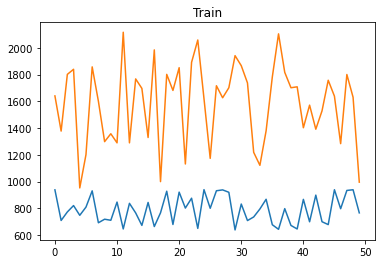

2/2 [==============================] - 0s 5ms/step


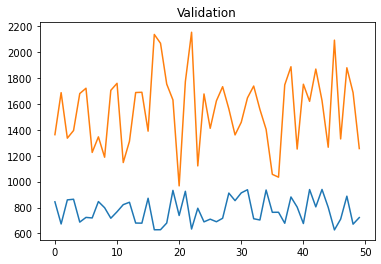

3/3 [==============================] - 0s 6ms/step


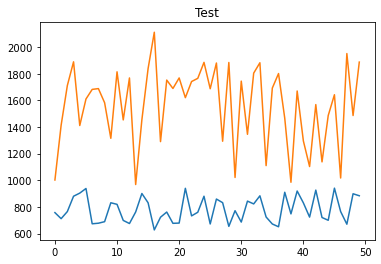

3/3 [==============================] - 0s 7ms/step


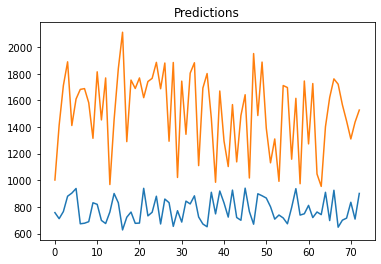

In [21]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
auto_cnn_mse

637363.3075735496

### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2533517.7500 - root_mean_squared_error: 1591.7028

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 51s 6s/step - loss: 2533517.7500 - root_mean_squared_error: 1591.7028 - val_loss: 2506931.2500 - val_root_mean_squared_error: 1583.3292
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2532868.0000 - root_mean_squared_error: 1591.4987

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2532868.0000 - root_mean_squared_error: 1591.4987 - val_loss: 2506274.7500 - val_root_mean_squared_error: 1583.1217
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2505602.7500 - root_mean_squared_error: 1582.9095

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2532199.5000 - root_mean_squared_error: 1591.2886 - val_loss: 2505621.2500 - val_root_mean_squared_error: 1582.9154
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2577499.7500 - root_mean_squared_error: 1605.4594

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2531365.7500 - root_mean_squared_error: 1591.0266 - val_loss: 2504961.5000 - val_root_mean_squared_error: 1582.7070
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2543014.0000 - root_mean_squared_error: 1594.6830

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2530861.5000 - root_mean_squared_error: 1590.8682 - val_loss: 2504304.5000 - val_root_mean_squared_error: 1582.4995
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2541878.2500 - root_mean_squared_error: 1594.3269

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2530252.0000 - root_mean_squared_error: 1590.6766 - val_loss: 2503638.2500 - val_root_mean_squared_error: 1582.2889
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2529187.7500 - root_mean_squared_error: 1590.3420

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2529512.0000 - root_mean_squared_error: 1590.4440 - val_loss: 2502960.7500 - val_root_mean_squared_error: 1582.0748
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2528742.5000 - root_mean_squared_error: 1590.2020

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2528742.5000 - root_mean_squared_error: 1590.2020 - val_loss: 2502270.2500 - val_root_mean_squared_error: 1581.8566
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2522036.0000 - root_mean_squared_error: 1588.0919

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2528176.7500 - root_mean_squared_error: 1590.0242 - val_loss: 2501562.5000 - val_root_mean_squared_error: 1581.6328
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2531844.2500 - root_mean_squared_error: 1591.1770

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2527304.7500 - root_mean_squared_error: 1589.7499 - val_loss: 2500831.0000 - val_root_mean_squared_error: 1581.4016
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2526615.7500 - root_mean_squared_error: 1589.5332

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2526615.7500 - root_mean_squared_error: 1589.5332 - val_loss: 2500080.7500 - val_root_mean_squared_error: 1581.1643
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2550751.2500 - root_mean_squared_error: 1597.1072

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2525896.5000 - root_mean_squared_error: 1589.3069 - val_loss: 2499308.2500 - val_root_mean_squared_error: 1580.9200
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2534305.2500 - root_mean_squared_error: 1591.9502

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2525074.2500 - root_mean_squared_error: 1589.0482 - val_loss: 2498508.2500 - val_root_mean_squared_error: 1580.6670
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2523229.2500 - root_mean_squared_error: 1588.4675

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2524253.7500 - root_mean_squared_error: 1588.7900 - val_loss: 2497690.7500 - val_root_mean_squared_error: 1580.4084
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2523477.0000 - root_mean_squared_error: 1588.5455

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 2523477.0000 - root_mean_squared_error: 1588.5455 - val_loss: 2496844.2500 - val_root_mean_squared_error: 1580.1406
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 2490455.5000 - root_mean_squared_error: 1578.1177

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2522745.0000 - root_mean_squared_error: 1588.3152 - val_loss: 2495971.7500 - val_root_mean_squared_error: 1579.8645
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2504466.7500 - root_mean_squared_error: 1582.5507

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2521624.0000 - root_mean_squared_error: 1587.9622 - val_loss: 2495068.5000 - val_root_mean_squared_error: 1579.5786
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2520797.0000 - root_mean_squared_error: 1587.7018

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2520797.0000 - root_mean_squared_error: 1587.7018 - val_loss: 2494139.5000 - val_root_mean_squared_error: 1579.2845
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2510710.7500 - root_mean_squared_error: 1584.5222

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2519770.7500 - root_mean_squared_error: 1587.3785 - val_loss: 2493192.7500 - val_root_mean_squared_error: 1578.9847
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2518977.0000 - root_mean_squared_error: 1587.1285

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2518977.0000 - root_mean_squared_error: 1587.1285 - val_loss: 2492225.5000 - val_root_mean_squared_error: 1578.6783
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2517965.5000 - root_mean_squared_error: 1586.8098

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2517965.5000 - root_mean_squared_error: 1586.8098 - val_loss: 2491243.7500 - val_root_mean_squared_error: 1578.3674
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2503537.5000 - root_mean_squared_error: 1582.2571

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2517022.7500 - root_mean_squared_error: 1586.5128 - val_loss: 2490245.0000 - val_root_mean_squared_error: 1578.0509
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 2519676.2500 - root_mean_squared_error: 1587.3488

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2515940.0000 - root_mean_squared_error: 1586.1715 - val_loss: 2489246.0000 - val_root_mean_squared_error: 1577.7344
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2517389.2500 - root_mean_squared_error: 1586.6283

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2514822.2500 - root_mean_squared_error: 1585.8191 - val_loss: 2488252.5000 - val_root_mean_squared_error: 1577.4196
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2513924.0000 - root_mean_squared_error: 1585.5359

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2513924.0000 - root_mean_squared_error: 1585.5359 - val_loss: 2487275.5000 - val_root_mean_squared_error: 1577.1099
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2513020.7500 - root_mean_squared_error: 1585.2510

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2513020.7500 - root_mean_squared_error: 1585.2510 - val_loss: 2486306.7500 - val_root_mean_squared_error: 1576.8027
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2525677.5000 - root_mean_squared_error: 1589.2380

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2511861.5000 - root_mean_squared_error: 1584.8854 - val_loss: 2485355.0000 - val_root_mean_squared_error: 1576.5007
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2503644.7500 - root_mean_squared_error: 1582.2910

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2511044.5000 - root_mean_squared_error: 1584.6276 - val_loss: 2484434.2500 - val_root_mean_squared_error: 1576.2089
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2510103.0000 - root_mean_squared_error: 1584.3304

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2510103.0000 - root_mean_squared_error: 1584.3304 - val_loss: 2483534.2500 - val_root_mean_squared_error: 1575.9233
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2515183.7500 - root_mean_squared_error: 1585.9331

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2509255.2500 - root_mean_squared_error: 1584.0629 - val_loss: 2482661.0000 - val_root_mean_squared_error: 1575.6462
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2508593.0000 - root_mean_squared_error: 1583.8539

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2508593.0000 - root_mean_squared_error: 1583.8539 - val_loss: 2481821.0000 - val_root_mean_squared_error: 1575.3796
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 2499298.7500 - root_mean_squared_error: 1580.9171

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2507459.2500 - root_mean_squared_error: 1583.4958 - val_loss: 2481004.5000 - val_root_mean_squared_error: 1575.1205
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2535709.0000 - root_mean_squared_error: 1592.3910

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2506759.2500 - root_mean_squared_error: 1583.2749 - val_loss: 2480204.7500 - val_root_mean_squared_error: 1574.8666
Epoch 34/50
5/8 [=================>............] - ETA: 0s - loss: 2534306.7500 - root_mean_squared_error: 1591.9506

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2505865.2500 - root_mean_squared_error: 1582.9926 - val_loss: 2479427.2500 - val_root_mean_squared_error: 1574.6198
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2505056.2500 - root_mean_squared_error: 1582.7369

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2505056.2500 - root_mean_squared_error: 1582.7369 - val_loss: 2478675.0000 - val_root_mean_squared_error: 1574.3809
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2512802.7500 - root_mean_squared_error: 1585.1823

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2504368.5000 - root_mean_squared_error: 1582.5197 - val_loss: 2477945.5000 - val_root_mean_squared_error: 1574.1492
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 2519180.7500 - root_mean_squared_error: 1587.1927

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2503753.7500 - root_mean_squared_error: 1582.3254 - val_loss: 2477238.5000 - val_root_mean_squared_error: 1573.9246
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2503240.7500 - root_mean_squared_error: 1582.1633

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2503240.7500 - root_mean_squared_error: 1582.1633 - val_loss: 2476551.7500 - val_root_mean_squared_error: 1573.7064
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2516247.7500 - root_mean_squared_error: 1586.2686

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2502101.0000 - root_mean_squared_error: 1581.8031 - val_loss: 2475884.5000 - val_root_mean_squared_error: 1573.4944
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2494442.2500 - root_mean_squared_error: 1579.3804

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2502072.2500 - root_mean_squared_error: 1581.7939 - val_loss: 2475242.0000 - val_root_mean_squared_error: 1573.2902
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2505864.0000 - root_mean_squared_error: 1582.9921

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2500778.0000 - root_mean_squared_error: 1581.3849 - val_loss: 2474619.5000 - val_root_mean_squared_error: 1573.0923
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2500442.2500 - root_mean_squared_error: 1581.2787

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2500442.2500 - root_mean_squared_error: 1581.2787 - val_loss: 2474024.2500 - val_root_mean_squared_error: 1572.9031
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2511991.5000 - root_mean_squared_error: 1584.9264

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2499805.7500 - root_mean_squared_error: 1581.0774 - val_loss: 2473443.2500 - val_root_mean_squared_error: 1572.7184
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 2561353.7500 - root_mean_squared_error: 1600.4230

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2499342.5000 - root_mean_squared_error: 1580.9309 - val_loss: 2472885.5000 - val_root_mean_squared_error: 1572.5411
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 2418712.7500 - root_mean_squared_error: 1555.2211

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2498973.7500 - root_mean_squared_error: 1580.8142 - val_loss: 2472350.5000 - val_root_mean_squared_error: 1572.3710
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2498428.7500 - root_mean_squared_error: 1580.6418

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2498428.7500 - root_mean_squared_error: 1580.6418 - val_loss: 2471827.7500 - val_root_mean_squared_error: 1572.2047
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2497605.2500 - root_mean_squared_error: 1580.3813

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2497605.2500 - root_mean_squared_error: 1580.3813 - val_loss: 2471330.2500 - val_root_mean_squared_error: 1572.0465
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2486780.0000 - root_mean_squared_error: 1576.9528

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2497270.2500 - root_mean_squared_error: 1580.2754 - val_loss: 2470845.7500 - val_root_mean_squared_error: 1571.8925
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2497036.5000 - root_mean_squared_error: 1580.2014

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2497036.5000 - root_mean_squared_error: 1580.2014 - val_loss: 2470382.0000 - val_root_mean_squared_error: 1571.7449
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2496163.2500 - root_mean_squared_error: 1579.9250

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 27ms/step


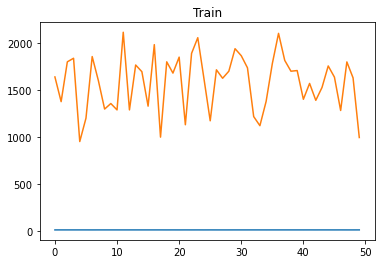

2/2 [==============================] - 3s 7ms/step


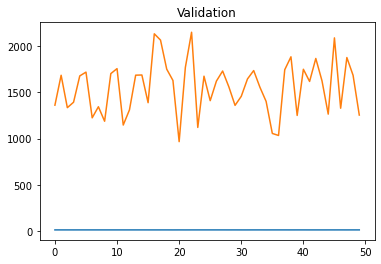

3/3 [==============================] - 0s 10ms/step


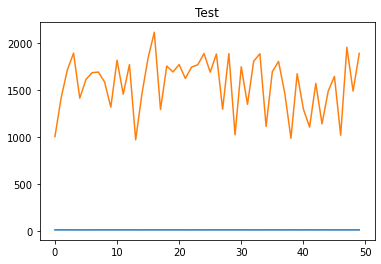

3/3 [==============================] - 0s 5ms/step


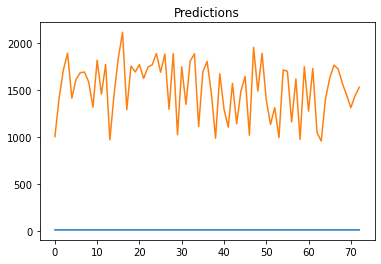

In [23]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [24]:
auto_gru_mse

2345886.706724469

### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2530011.2500 - root_mean_squared_error: 1590.6010

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 49s 4s/step - loss: 2528487.5000 - root_mean_squared_error: 1590.1218 - val_loss: 2501513.7500 - val_root_mean_squared_error: 1581.6176
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2546999.7500 - root_mean_squared_error: 1595.9323

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2527973.5000 - root_mean_squared_error: 1589.9602 - val_loss: 2501231.7500 - val_root_mean_squared_error: 1581.5283
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 2526003.2500 - root_mean_squared_error: 1589.3405

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2527707.5000 - root_mean_squared_error: 1589.8766 - val_loss: 2500952.7500 - val_root_mean_squared_error: 1581.4401
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2526536.5000 - root_mean_squared_error: 1589.5083

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2527420.5000 - root_mean_squared_error: 1589.7863 - val_loss: 2500665.5000 - val_root_mean_squared_error: 1581.3492
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2527119.0000 - root_mean_squared_error: 1589.6915

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2527119.0000 - root_mean_squared_error: 1589.6915 - val_loss: 2500373.5000 - val_root_mean_squared_error: 1581.2570
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2532250.2500 - root_mean_squared_error: 1591.3046

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2526732.0000 - root_mean_squared_error: 1589.5697 - val_loss: 2500075.2500 - val_root_mean_squared_error: 1581.1626
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 2512365.7500 - root_mean_squared_error: 1585.0444

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2526394.0000 - root_mean_squared_error: 1589.4634 - val_loss: 2499770.5000 - val_root_mean_squared_error: 1581.0663
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2526020.7500 - root_mean_squared_error: 1589.3461

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2526020.7500 - root_mean_squared_error: 1589.3461 - val_loss: 2499455.5000 - val_root_mean_squared_error: 1580.9667
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2539623.7500 - root_mean_squared_error: 1593.6198

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2525726.0000 - root_mean_squared_error: 1589.2533 - val_loss: 2499131.2500 - val_root_mean_squared_error: 1580.8641
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2525394.2500 - root_mean_squared_error: 1589.1489

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2525394.2500 - root_mean_squared_error: 1589.1489 - val_loss: 2498800.2500 - val_root_mean_squared_error: 1580.7594
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2525011.5000 - root_mean_squared_error: 1589.0284

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2525011.5000 - root_mean_squared_error: 1589.0284 - val_loss: 2498461.7500 - val_root_mean_squared_error: 1580.6523
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2535322.7500 - root_mean_squared_error: 1592.2697

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2524743.0000 - root_mean_squared_error: 1588.9440 - val_loss: 2498120.5000 - val_root_mean_squared_error: 1580.5443
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2526980.7500 - root_mean_squared_error: 1589.6479

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2524268.5000 - root_mean_squared_error: 1588.7947 - val_loss: 2497783.7500 - val_root_mean_squared_error: 1580.4379
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 2577676.0000 - root_mean_squared_error: 1605.5143

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2523955.0000 - root_mean_squared_error: 1588.6960 - val_loss: 2497437.7500 - val_root_mean_squared_error: 1580.3285
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2523605.0000 - root_mean_squared_error: 1588.5858

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2523605.0000 - root_mean_squared_error: 1588.5858 - val_loss: 2497084.5000 - val_root_mean_squared_error: 1580.2166
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2523159.0000 - root_mean_squared_error: 1588.4454

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2523159.0000 - root_mean_squared_error: 1588.4454 - val_loss: 2496722.2500 - val_root_mean_squared_error: 1580.1019
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2510519.0000 - root_mean_squared_error: 1584.4618

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2522888.7500 - root_mean_squared_error: 1588.3604 - val_loss: 2496347.2500 - val_root_mean_squared_error: 1579.9833
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2522399.0000 - root_mean_squared_error: 1588.2062

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2522399.0000 - root_mean_squared_error: 1588.2062 - val_loss: 2495961.5000 - val_root_mean_squared_error: 1579.8612
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2513286.5000 - root_mean_squared_error: 1585.3348

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2521958.5000 - root_mean_squared_error: 1588.0675 - val_loss: 2495566.0000 - val_root_mean_squared_error: 1579.7361
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2521560.0000 - root_mean_squared_error: 1587.9420

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2521560.0000 - root_mean_squared_error: 1587.9420 - val_loss: 2495157.0000 - val_root_mean_squared_error: 1579.6066
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2518106.0000 - root_mean_squared_error: 1586.8541

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2521190.2500 - root_mean_squared_error: 1587.8257 - val_loss: 2494735.7500 - val_root_mean_squared_error: 1579.4733
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 2544952.0000 - root_mean_squared_error: 1595.2905

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2520727.7500 - root_mean_squared_error: 1587.6799 - val_loss: 2494295.7500 - val_root_mean_squared_error: 1579.3340
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2520466.0000 - root_mean_squared_error: 1587.5975

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2520466.0000 - root_mean_squared_error: 1587.5975 - val_loss: 2493847.7500 - val_root_mean_squared_error: 1579.1921
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2519880.0000 - root_mean_squared_error: 1587.4130

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2519880.0000 - root_mean_squared_error: 1587.4130 - val_loss: 2493375.5000 - val_root_mean_squared_error: 1579.0426
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2566300.7500 - root_mean_squared_error: 1601.9678

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2519347.7500 - root_mean_squared_error: 1587.2454 - val_loss: 2492876.2500 - val_root_mean_squared_error: 1578.8845
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2531637.7500 - root_mean_squared_error: 1591.1121

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2518820.7500 - root_mean_squared_error: 1587.0793 - val_loss: 2492349.7500 - val_root_mean_squared_error: 1578.7178
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2506480.0000 - root_mean_squared_error: 1583.1866

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2518345.5000 - root_mean_squared_error: 1586.9296 - val_loss: 2491792.5000 - val_root_mean_squared_error: 1578.5413
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2517848.7500 - root_mean_squared_error: 1586.7731

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2517848.7500 - root_mean_squared_error: 1586.7731 - val_loss: 2491201.7500 - val_root_mean_squared_error: 1578.3541
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2516842.0000 - root_mean_squared_error: 1586.4558

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2516842.0000 - root_mean_squared_error: 1586.4558 - val_loss: 2490587.0000 - val_root_mean_squared_error: 1578.1594
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2516388.5000 - root_mean_squared_error: 1586.3129

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2516388.5000 - root_mean_squared_error: 1586.3129 - val_loss: 2489944.7500 - val_root_mean_squared_error: 1577.9559
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2551414.7500 - root_mean_squared_error: 1597.3148

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2515739.2500 - root_mean_squared_error: 1586.1082 - val_loss: 2489292.5000 - val_root_mean_squared_error: 1577.7491
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2511348.7500 - root_mean_squared_error: 1584.7235

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2515160.0000 - root_mean_squared_error: 1585.9255 - val_loss: 2488640.7500 - val_root_mean_squared_error: 1577.5426
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2514756.2500 - root_mean_squared_error: 1585.7983

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2514756.2500 - root_mean_squared_error: 1585.7983 - val_loss: 2487997.7500 - val_root_mean_squared_error: 1577.3387
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2487162.7500 - root_mean_squared_error: 1577.0741

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2514093.7500 - root_mean_squared_error: 1585.5894 - val_loss: 2487374.2500 - val_root_mean_squared_error: 1577.1412
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2532011.7500 - root_mean_squared_error: 1591.2296

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2513198.7500 - root_mean_squared_error: 1585.3071 - val_loss: 2486762.0000 - val_root_mean_squared_error: 1576.9470
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2512750.2500 - root_mean_squared_error: 1585.1656

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2512750.2500 - root_mean_squared_error: 1585.1656 - val_loss: 2486167.7500 - val_root_mean_squared_error: 1576.7587
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2526992.0000 - root_mean_squared_error: 1589.6515

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2512143.2500 - root_mean_squared_error: 1584.9742 - val_loss: 2485589.7500 - val_root_mean_squared_error: 1576.5753
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2511316.0000 - root_mean_squared_error: 1584.7133

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2511440.2500 - root_mean_squared_error: 1584.7524 - val_loss: 2485023.5000 - val_root_mean_squared_error: 1576.3958
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 2528318.7500 - root_mean_squared_error: 1590.0688

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2510896.7500 - root_mean_squared_error: 1584.5809 - val_loss: 2484467.2500 - val_root_mean_squared_error: 1576.2192
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2521640.7500 - root_mean_squared_error: 1587.9675

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2510664.5000 - root_mean_squared_error: 1584.5077 - val_loss: 2483921.7500 - val_root_mean_squared_error: 1576.0463
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2505486.5000 - root_mean_squared_error: 1582.8728

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2509699.2500 - root_mean_squared_error: 1584.2030 - val_loss: 2483394.0000 - val_root_mean_squared_error: 1575.8787
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2509028.0000 - root_mean_squared_error: 1583.9912

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2509028.0000 - root_mean_squared_error: 1583.9912 - val_loss: 2482876.2500 - val_root_mean_squared_error: 1575.7145
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 2553274.7500 - root_mean_squared_error: 1597.8970

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2508846.7500 - root_mean_squared_error: 1583.9340 - val_loss: 2482364.7500 - val_root_mean_squared_error: 1575.5522
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2508212.2500 - root_mean_squared_error: 1583.7336

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2508212.2500 - root_mean_squared_error: 1583.7336 - val_loss: 2481871.0000 - val_root_mean_squared_error: 1575.3956
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2507771.7500 - root_mean_squared_error: 1583.5946

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2507771.7500 - root_mean_squared_error: 1583.5946 - val_loss: 2481386.5000 - val_root_mean_squared_error: 1575.2417
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2490565.0000 - root_mean_squared_error: 1578.1523

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2507573.2500 - root_mean_squared_error: 1583.5319 - val_loss: 2480910.5000 - val_root_mean_squared_error: 1575.0906
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2520033.5000 - root_mean_squared_error: 1587.4613

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2506914.7500 - root_mean_squared_error: 1583.3240 - val_loss: 2480439.7500 - val_root_mean_squared_error: 1574.9412
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2506450.7500 - root_mean_squared_error: 1583.1774

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2506450.7500 - root_mean_squared_error: 1583.1774 - val_loss: 2479981.2500 - val_root_mean_squared_error: 1574.7957
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2506028.5000 - root_mean_squared_error: 1583.0441

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2506028.5000 - root_mean_squared_error: 1583.0441 - val_loss: 2479526.0000 - val_root_mean_squared_error: 1574.6511
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2505677.2500 - root_mean_squared_error: 1582.9331

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 7s 10ms/step


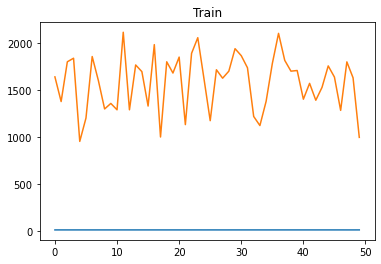

2/2 [==============================] - 3s 9ms/step


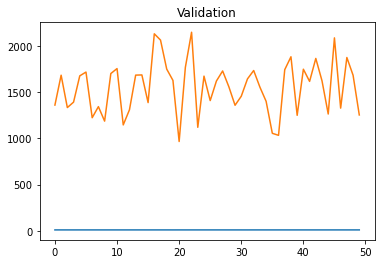

3/3 [==============================] - 0s 6ms/step


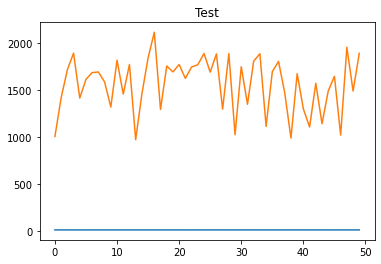

3/3 [==============================] - 0s 11ms/step


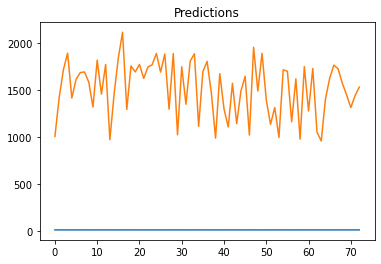

In [25]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [26]:
auto_lstm_mse

2354775.761125992

### RNN

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 2582472.7500 - root_mean_squared_error: 1607.0074  INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 20s 1s/step - loss: 2531514.5000 - root_mean_squared_error: 1591.0734 - val_loss: 2504431.0000 - val_root_mean_squared_error: 1582.5394
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2540731.7500 - root_mean_squared_error: 1593.9673INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2530146.2500 - root_mean_squared_error: 1590.6433 - val_loss: 2503474.7500 - val_root_mean_squared_error: 1582.2373
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2531480.7500 - root_mean_squared_error: 1591.0627INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2529167.5000 - root_mean_squared_error: 1590.3357 - val_loss: 2502531.2500 - val_root_mean_squared_error: 1581.9390
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 2569416.5000 - root_mean_squared_error: 1602.9399INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2528666.5000 - root_mean_squared_error: 1590.1781 - val_loss: 2501589.0000 - val_root_mean_squared_error: 1581.6412
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2527400.5000 - root_mean_squared_error: 1589.7800INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2527400.5000 - root_mean_squared_error: 1589.7800 - val_loss: 2500651.0000 - val_root_mean_squared_error: 1581.3447
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2534674.0000 - root_mean_squared_error: 1592.0659INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2526359.2500 - root_mean_squared_error: 1589.4525 - val_loss: 2499714.5000 - val_root_mean_squared_error: 1581.0486
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2525475.0000 - root_mean_squared_error: 1589.1743INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2525475.0000 - root_mean_squared_error: 1589.1743 - val_loss: 2498780.7500 - val_root_mean_squared_error: 1580.7532
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2542691.7500 - root_mean_squared_error: 1594.5820INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2524633.2500 - root_mean_squared_error: 1588.9094 - val_loss: 2497846.2500 - val_root_mean_squared_error: 1580.4576
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 2450562.5000 - root_mean_squared_error: 1565.4272INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 956ms/step - loss: 2523607.5000 - root_mean_squared_error: 1588.5867 - val_loss: 2496922.7500 - val_root_mean_squared_error: 1580.1654
Epoch 10/50
4/8 [==============>...............] - ETA: 0s - loss: 2536606.5000 - root_mean_squared_error: 1592.6727INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2522387.0000 - root_mean_squared_error: 1588.2024 - val_loss: 2496001.7500 - val_root_mean_squared_error: 1579.8740
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2514272.5000 - root_mean_squared_error: 1585.6458INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 20s 3s/step - loss: 2522017.0000 - root_mean_squared_error: 1588.0859 - val_loss: 2495087.5000 - val_root_mean_squared_error: 1579.5846
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2522367.2500 - root_mean_squared_error: 1588.1962INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2520962.2500 - root_mean_squared_error: 1587.7538 - val_loss: 2494173.2500 - val_root_mean_squared_error: 1579.2952
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2516601.7500 - root_mean_squared_error: 1586.3801INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 963ms/step - loss: 2520007.5000 - root_mean_squared_error: 1587.4531 - val_loss: 2493262.5000 - val_root_mean_squared_error: 1579.0068
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 2473165.2500 - root_mean_squared_error: 1572.6300INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2519282.7500 - root_mean_squared_error: 1587.2249 - val_loss: 2492352.5000 - val_root_mean_squared_error: 1578.7186
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2523615.5000 - root_mean_squared_error: 1588.5891INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 19s 3s/step - loss: 2517943.5000 - root_mean_squared_error: 1586.8030 - val_loss: 2491440.5000 - val_root_mean_squared_error: 1578.4298
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2526247.5000 - root_mean_squared_error: 1589.4174INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 910ms/step - loss: 2517325.7500 - root_mean_squared_error: 1586.6083 - val_loss: 2490525.2500 - val_root_mean_squared_error: 1578.1398
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2516359.0000 - root_mean_squared_error: 1586.3036INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2516359.0000 - root_mean_squared_error: 1586.3036 - val_loss: 2489609.7500 - val_root_mean_squared_error: 1577.8496
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2517380.5000 - root_mean_squared_error: 1586.6255INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2515057.7500 - root_mean_squared_error: 1585.8933 - val_loss: 2488689.0000 - val_root_mean_squared_error: 1577.5581
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 2547696.2500 - root_mean_squared_error: 1596.1504INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2514477.5000 - root_mean_squared_error: 1585.7104 - val_loss: 2487760.5000 - val_root_mean_squared_error: 1577.2637
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2511106.7500 - root_mean_squared_error: 1584.6472INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2513482.5000 - root_mean_squared_error: 1585.3966 - val_loss: 2486837.0000 - val_root_mean_squared_error: 1576.9708
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2512624.2500 - root_mean_squared_error: 1585.1260INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2512752.5000 - root_mean_squared_error: 1585.1664 - val_loss: 2485940.7500 - val_root_mean_squared_error: 1576.6866
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 2517929.0000 - root_mean_squared_error: 1586.7983INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 2511767.7500 - root_mean_squared_error: 1584.8557 - val_loss: 2485077.5000 - val_root_mean_squared_error: 1576.4128
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2532354.7500 - root_mean_squared_error: 1591.3374INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2510450.5000 - root_mean_squared_error: 1584.4401 - val_loss: 2484250.5000 - val_root_mean_squared_error: 1576.1505
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2565276.2500 - root_mean_squared_error: 1601.6479INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2510167.5000 - root_mean_squared_error: 1584.3508 - val_loss: 2483467.5000 - val_root_mean_squared_error: 1575.9021
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2515392.0000 - root_mean_squared_error: 1585.9988INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2509249.5000 - root_mean_squared_error: 1584.0610 - val_loss: 2482722.5000 - val_root_mean_squared_error: 1575.6658
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2505356.2500 - root_mean_squared_error: 1582.8317INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 20s 3s/step - loss: 2508873.2500 - root_mean_squared_error: 1583.9423 - val_loss: 2482007.2500 - val_root_mean_squared_error: 1575.4387
Epoch 27/50
5/8 [=================>............] - ETA: 0s - loss: 2441387.5000 - root_mean_squared_error: 1562.4940INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2507728.2500 - root_mean_squared_error: 1583.5808 - val_loss: 2481322.7500 - val_root_mean_squared_error: 1575.2214
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 2441825.7500 - root_mean_squared_error: 1562.6343INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2507222.7500 - root_mean_squared_error: 1583.4213 - val_loss: 2480666.2500 - val_root_mean_squared_error: 1575.0131
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2506377.5000 - root_mean_squared_error: 1583.1543INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2506377.5000 - root_mean_squared_error: 1583.1543 - val_loss: 2480031.5000 - val_root_mean_squared_error: 1574.8115
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2500888.5000 - root_mean_squared_error: 1581.4198INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2505987.5000 - root_mean_squared_error: 1583.0311 - val_loss: 2479430.5000 - val_root_mean_squared_error: 1574.6208
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2488455.2500 - root_mean_squared_error: 1577.4839INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2505395.7500 - root_mean_squared_error: 1582.8442 - val_loss: 2478859.7500 - val_root_mean_squared_error: 1574.4395
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 2554962.2500 - root_mean_squared_error: 1598.4249INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2504677.7500 - root_mean_squared_error: 1582.6174 - val_loss: 2478312.5000 - val_root_mean_squared_error: 1574.2657
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2502029.2500 - root_mean_squared_error: 1581.7804INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2504212.0000 - root_mean_squared_error: 1582.4702 - val_loss: 2477793.7500 - val_root_mean_squared_error: 1574.1010
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2477466.2500 - root_mean_squared_error: 1573.9969INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2503694.5000 - root_mean_squared_error: 1582.3068 - val_loss: 2477299.0000 - val_root_mean_squared_error: 1573.9437
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2516657.2500 - root_mean_squared_error: 1586.3976INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2502991.0000 - root_mean_squared_error: 1582.0844 - val_loss: 2476825.7500 - val_root_mean_squared_error: 1573.7935
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2513836.0000 - root_mean_squared_error: 1585.5082INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2502541.7500 - root_mean_squared_error: 1581.9424 - val_loss: 2476374.5000 - val_root_mean_squared_error: 1573.6500
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 2526842.7500 - root_mean_squared_error: 1589.6046INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2502412.2500 - root_mean_squared_error: 1581.9015 - val_loss: 2475951.0000 - val_root_mean_squared_error: 1573.5155
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 2524143.5000 - root_mean_squared_error: 1588.7554INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2502245.2500 - root_mean_squared_error: 1581.8486 - val_loss: 2475546.7500 - val_root_mean_squared_error: 1573.3871
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2512601.7500 - root_mean_squared_error: 1585.1189INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2501282.0000 - root_mean_squared_error: 1581.5442 - val_loss: 2475159.5000 - val_root_mean_squared_error: 1573.2639
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 2496315.2500 - root_mean_squared_error: 1579.9731INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2501337.2500 - root_mean_squared_error: 1581.5616 - val_loss: 2474785.7500 - val_root_mean_squared_error: 1573.1451
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2498556.5000 - root_mean_squared_error: 1580.6823INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2500830.7500 - root_mean_squared_error: 1581.4015 - val_loss: 2474424.2500 - val_root_mean_squared_error: 1573.0303
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2515126.7500 - root_mean_squared_error: 1585.9152INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2500416.0000 - root_mean_squared_error: 1581.2704 - val_loss: 2474075.7500 - val_root_mean_squared_error: 1572.9196
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 2517441.7500 - root_mean_squared_error: 1586.6448INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 968ms/step - loss: 2500283.7500 - root_mean_squared_error: 1581.2285 - val_loss: 2473741.0000 - val_root_mean_squared_error: 1572.8131
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2495138.7500 - root_mean_squared_error: 1579.6008INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2499975.2500 - root_mean_squared_error: 1581.1310 - val_loss: 2473417.0000 - val_root_mean_squared_error: 1572.7101
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 2515406.2500 - root_mean_squared_error: 1586.0032INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2499466.0000 - root_mean_squared_error: 1580.9700 - val_loss: 2473101.0000 - val_root_mean_squared_error: 1572.6096
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2498890.0000 - root_mean_squared_error: 1580.7877INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2498890.0000 - root_mean_squared_error: 1580.7877 - val_loss: 2472793.5000 - val_root_mean_squared_error: 1572.5118
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2503040.5000 - root_mean_squared_error: 1582.1000INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2499219.0000 - root_mean_squared_error: 1580.8918 - val_loss: 2472492.5000 - val_root_mean_squared_error: 1572.4161
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2498818.2500 - root_mean_squared_error: 1580.7651INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2498818.2500 - root_mean_squared_error: 1580.7651 - val_loss: 2472200.5000 - val_root_mean_squared_error: 1572.3232
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 2505965.5000 - root_mean_squared_error: 1583.0242INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 2498443.0000 - root_mean_squared_error: 1580.6464 - val_loss: 2471915.5000 - val_root_mean_squared_error: 1572.2327
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 2531754.2500 - root_mean_squared_error: 1591.1487INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 6ms/step


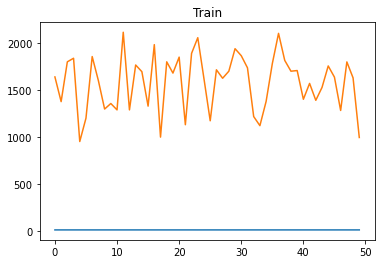

2/2 [==============================] - 1s 10ms/step


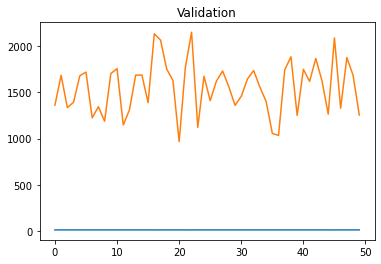

3/3 [==============================] - 0s 4ms/step


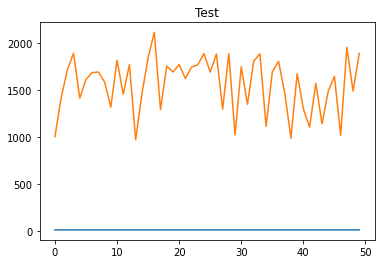

3/3 [==============================] - 0s 4ms/step


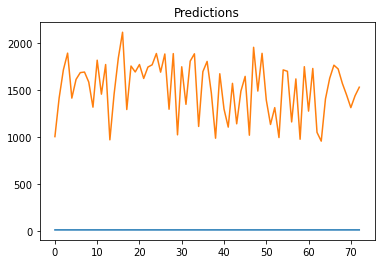

In [27]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [28]:
auto_rnn_mse

2347527.712406602

# Moving Average with Encoder

### CNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2545715.2500 - root_mean_squared_error: 1595.5298

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 15s 1s/step - loss: 2545715.2500 - root_mean_squared_error: 1595.5298 - val_loss: 2506273.0000 - val_root_mean_squared_error: 1583.1213
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2531799.0000 - root_mean_squared_error: 1591.1628

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2538201.5000 - root_mean_squared_error: 1593.1735 - val_loss: 2505930.5000 - val_root_mean_squared_error: 1583.0131
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2534837.0000 - root_mean_squared_error: 1592.1172

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 833ms/step - loss: 2534837.0000 - root_mean_squared_error: 1592.1172 - val_loss: 2505444.5000 - val_root_mean_squared_error: 1582.8596
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2566762.7500 - root_mean_squared_error: 1602.1119

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 734ms/step - loss: 2531241.2500 - root_mean_squared_error: 1590.9875 - val_loss: 2500589.7500 - val_root_mean_squared_error: 1581.3253
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 2516654.0000 - root_mean_squared_error: 1586.3966

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 920ms/step - loss: 2526911.5000 - root_mean_squared_error: 1589.6262 - val_loss: 2494080.7500 - val_root_mean_squared_error: 1579.2659
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2520440.7500 - root_mean_squared_error: 1587.5896

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 596ms/step - loss: 2520440.7500 - root_mean_squared_error: 1587.5896 - val_loss: 2486582.5000 - val_root_mean_squared_error: 1576.8901
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 2520813.7500 - root_mean_squared_error: 1587.7070

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2513028.5000 - root_mean_squared_error: 1585.2534 - val_loss: 2478703.0000 - val_root_mean_squared_error: 1574.3898
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2504936.5000 - root_mean_squared_error: 1582.6991

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 927ms/step - loss: 2504936.5000 - root_mean_squared_error: 1582.6991 - val_loss: 2470716.2500 - val_root_mean_squared_error: 1571.8512
Epoch 9/50
4/8 [==============>...............] - ETA: 1s - loss: 2458696.5000 - root_mean_squared_error: 1568.0231

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2496481.7500 - root_mean_squared_error: 1580.0259 - val_loss: 2462522.7500 - val_root_mean_squared_error: 1569.2427
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2488342.0000 - root_mean_squared_error: 1577.4480

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 865ms/step - loss: 2488342.0000 - root_mean_squared_error: 1577.4480 - val_loss: 2454184.0000 - val_root_mean_squared_error: 1566.5835
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 2472632.0000 - root_mean_squared_error: 1572.4604

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 917ms/step - loss: 2480879.0000 - root_mean_squared_error: 1575.0807 - val_loss: 2445623.7500 - val_root_mean_squared_error: 1563.8490
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2501289.2500 - root_mean_squared_error: 1581.5465

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 878ms/step - loss: 2473242.7500 - root_mean_squared_error: 1572.6547 - val_loss: 2436784.2500 - val_root_mean_squared_error: 1561.0203
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2460420.5000 - root_mean_squared_error: 1568.5728

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2462778.5000 - root_mean_squared_error: 1569.3242 - val_loss: 2427647.0000 - val_root_mean_squared_error: 1558.0908
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 2465712.5000 - root_mean_squared_error: 1570.2588

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 474ms/step - loss: 2453594.2500 - root_mean_squared_error: 1566.3953 - val_loss: 2418058.0000 - val_root_mean_squared_error: 1555.0106
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2431765.7500 - root_mean_squared_error: 1559.4120

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 800ms/step - loss: 2443941.0000 - root_mean_squared_error: 1563.3109 - val_loss: 2407980.7500 - val_root_mean_squared_error: 1551.7670
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2434731.2500 - root_mean_squared_error: 1560.3625

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2434731.2500 - root_mean_squared_error: 1560.3625 - val_loss: 2397291.5000 - val_root_mean_squared_error: 1548.3190
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2423747.7500 - root_mean_squared_error: 1556.8390

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2423747.7500 - root_mean_squared_error: 1556.8390 - val_loss: 2386088.7500 - val_root_mean_squared_error: 1544.6969
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2353076.0000 - root_mean_squared_error: 1533.9739

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2412705.7500 - root_mean_squared_error: 1553.2887 - val_loss: 2374184.5000 - val_root_mean_squared_error: 1540.8389
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 2408224.7500 - root_mean_squared_error: 1551.8456

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 571ms/step - loss: 2400734.5000 - root_mean_squared_error: 1549.4304 - val_loss: 2361410.5000 - val_root_mean_squared_error: 1536.6881
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2349273.2500 - root_mean_squared_error: 1532.7339

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 560ms/step - loss: 2386331.0000 - root_mean_squared_error: 1544.7754 - val_loss: 2347855.2500 - val_root_mean_squared_error: 1532.2712
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2373366.2500 - root_mean_squared_error: 1540.5734

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 731ms/step - loss: 2373366.2500 - root_mean_squared_error: 1540.5734 - val_loss: 2333509.5000 - val_root_mean_squared_error: 1527.5829
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2371330.5000 - root_mean_squared_error: 1539.9125

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 818ms/step - loss: 2358424.0000 - root_mean_squared_error: 1535.7161 - val_loss: 2318197.0000 - val_root_mean_squared_error: 1522.5626
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 2317970.0000 - root_mean_squared_error: 1522.4880

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2344258.2500 - root_mean_squared_error: 1531.0970 - val_loss: 2302092.0000 - val_root_mean_squared_error: 1517.2646
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2275670.7500 - root_mean_squared_error: 1508.5326

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 611ms/step - loss: 2326979.0000 - root_mean_squared_error: 1525.4438 - val_loss: 2284854.2500 - val_root_mean_squared_error: 1511.5735
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2299337.5000 - root_mean_squared_error: 1516.3567

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 611ms/step - loss: 2311572.7500 - root_mean_squared_error: 1520.3857 - val_loss: 2266593.0000 - val_root_mean_squared_error: 1505.5209
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2296490.0000 - root_mean_squared_error: 1515.4175

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 613ms/step - loss: 2293629.5000 - root_mean_squared_error: 1514.4734 - val_loss: 2247165.2500 - val_root_mean_squared_error: 1499.0548
Epoch 27/50
4/8 [==============>...............] - ETA: 0s - loss: 2239901.7500 - root_mean_squared_error: 1496.6301

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 796ms/step - loss: 2272886.5000 - root_mean_squared_error: 1507.6095 - val_loss: 2226536.0000 - val_root_mean_squared_error: 1492.1582
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 2225405.5000 - root_mean_squared_error: 1491.7793

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2250824.0000 - root_mean_squared_error: 1500.2748 - val_loss: 2204750.5000 - val_root_mean_squared_error: 1484.8402
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2227875.2500 - root_mean_squared_error: 1492.6068

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 804ms/step - loss: 2230164.5000 - root_mean_squared_error: 1493.3735 - val_loss: 2181651.2500 - val_root_mean_squared_error: 1477.0414
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2206789.5000 - root_mean_squared_error: 1485.5267

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 890ms/step - loss: 2206789.5000 - root_mean_squared_error: 1485.5267 - val_loss: 2157233.0000 - val_root_mean_squared_error: 1468.7522
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2178955.5000 - root_mean_squared_error: 1476.1285

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 732ms/step - loss: 2180506.5000 - root_mean_squared_error: 1476.6538 - val_loss: 2131440.5000 - val_root_mean_squared_error: 1459.9454
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2157750.7500 - root_mean_squared_error: 1468.9285

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 762ms/step - loss: 2156640.5000 - root_mean_squared_error: 1468.5504 - val_loss: 2104345.0000 - val_root_mean_squared_error: 1450.6361
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2128274.2500 - root_mean_squared_error: 1458.8606

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2127869.5000 - root_mean_squared_error: 1458.7219 - val_loss: 2075836.0000 - val_root_mean_squared_error: 1440.7761
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2101291.5000 - root_mean_squared_error: 1449.5833

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2101291.5000 - root_mean_squared_error: 1449.5833 - val_loss: 2045942.6250 - val_root_mean_squared_error: 1430.3645
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2063143.6250 - root_mean_squared_error: 1436.3647

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 568ms/step - loss: 2071121.8750 - root_mean_squared_error: 1439.1393 - val_loss: 2014581.7500 - val_root_mean_squared_error: 1419.3596
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 2068511.0000 - root_mean_squared_error: 1438.2319

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 756ms/step - loss: 2037152.3750 - root_mean_squared_error: 1427.2885 - val_loss: 1981508.3750 - val_root_mean_squared_error: 1407.6606
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2203054.2500 - root_mean_squared_error: 1484.2689

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 767ms/step - loss: 2005756.5000 - root_mean_squared_error: 1416.2473 - val_loss: 1946865.3750 - val_root_mean_squared_error: 1395.3011
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 1964945.0000 - root_mean_squared_error: 1401.7650

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 763ms/step - loss: 1973756.8750 - root_mean_squared_error: 1404.9045 - val_loss: 1911083.8750 - val_root_mean_squared_error: 1382.4196
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 1942224.6250 - root_mean_squared_error: 1393.6372

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1934832.3750 - root_mean_squared_error: 1390.9825 - val_loss: 1873929.8750 - val_root_mean_squared_error: 1368.9155
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 1881194.8750 - root_mean_squared_error: 1371.5665

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 942ms/step - loss: 1897937.2500 - root_mean_squared_error: 1377.6565 - val_loss: 1835336.2500 - val_root_mean_squared_error: 1354.7458
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 1888311.6250 - root_mean_squared_error: 1374.1586

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 676ms/step - loss: 1861906.1250 - root_mean_squared_error: 1364.5168 - val_loss: 1794868.1250 - val_root_mean_squared_error: 1339.7269
Epoch 42/50
5/8 [=================>............] - ETA: 0s - loss: 1786357.6250 - root_mean_squared_error: 1336.5469

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 812ms/step - loss: 1821019.3750 - root_mean_squared_error: 1349.4515 - val_loss: 1753389.3750 - val_root_mean_squared_error: 1324.1561
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 1763465.3750 - root_mean_squared_error: 1327.9553

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1775043.1250 - root_mean_squared_error: 1332.3075 - val_loss: 1710206.6250 - val_root_mean_squared_error: 1307.7487
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 1724439.8750 - root_mean_squared_error: 1313.1793

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1732517.8750 - root_mean_squared_error: 1316.2515 - val_loss: 1665856.8750 - val_root_mean_squared_error: 1290.6808
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 1658163.5000 - root_mean_squared_error: 1287.6970

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1687771.5000 - root_mean_squared_error: 1299.1426 - val_loss: 1620344.0000 - val_root_mean_squared_error: 1272.9274
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 1664969.2500 - root_mean_squared_error: 1290.3369

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 780ms/step - loss: 1638592.3750 - root_mean_squared_error: 1280.0752 - val_loss: 1573404.1250 - val_root_mean_squared_error: 1254.3541
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 1619125.3750 - root_mean_squared_error: 1272.4486

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 783ms/step - loss: 1597667.6250 - root_mean_squared_error: 1263.9888 - val_loss: 1525619.2500 - val_root_mean_squared_error: 1235.1595
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 1550165.1250 - root_mean_squared_error: 1245.0563

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 850ms/step - loss: 1550165.1250 - root_mean_squared_error: 1245.0563 - val_loss: 1477245.7500 - val_root_mean_squared_error: 1215.4200
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 1501871.3750 - root_mean_squared_error: 1225.5087

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1497067.1250 - root_mean_squared_error: 1223.5470 - val_loss: 1428235.7500 - val_root_mean_squared_error: 1195.0881
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 1428754.0000 - root_mean_squared_error: 1195.3049

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 11ms/step


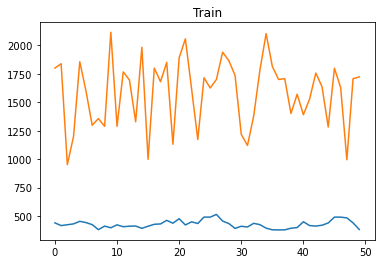

2/2 [==============================] - 1s 16ms/step


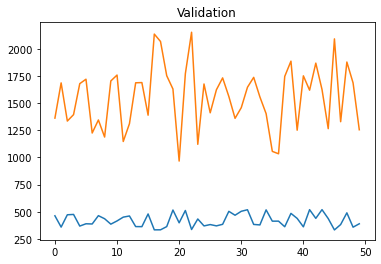

3/3 [==============================] - 0s 4ms/step


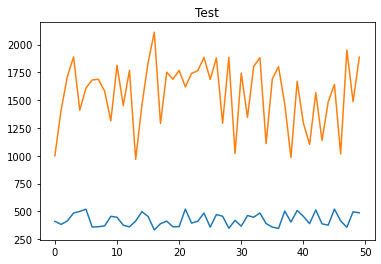

3/3 [==============================] - 0s 7ms/step


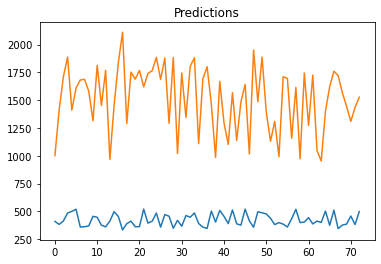

In [29]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [30]:
mavg_auto_cnn_mse

1279689.0957917648

### RNN

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 2526137.5000 - root_mean_squared_error: 1589.3827INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 16s 1s/step - loss: 2529676.2500 - root_mean_squared_error: 1590.4956 - val_loss: 2500740.5000 - val_root_mean_squared_error: 1581.3729
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2525443.0000 - root_mean_squared_error: 1589.1643INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2528812.2500 - root_mean_squared_error: 1590.2240 - val_loss: 2499765.2500 - val_root_mean_squared_error: 1581.0646
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 2497555.2500 - root_mean_squared_error: 1580.3656INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2527322.0000 - root_mean_squared_error: 1589.7554 - val_loss: 2498795.5000 - val_root_mean_squared_error: 1580.7579
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2526573.7500 - root_mean_squared_error: 1589.5200INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2526573.7500 - root_mean_squared_error: 1589.5200 - val_loss: 2497833.7500 - val_root_mean_squared_error: 1580.4536
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2525878.0000 - root_mean_squared_error: 1589.3011INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2525878.0000 - root_mean_squared_error: 1589.3011 - val_loss: 2496889.5000 - val_root_mean_squared_error: 1580.1549
Epoch 6/50
4/8 [==============>...............] - ETA: 0s - loss: 2521910.0000 - root_mean_squared_error: 1588.0522INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2524783.5000 - root_mean_squared_error: 1588.9568 - val_loss: 2495954.7500 - val_root_mean_squared_error: 1579.8591
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 2484684.7500 - root_mean_squared_error: 1576.2883INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2523567.0000 - root_mean_squared_error: 1588.5739 - val_loss: 2495025.7500 - val_root_mean_squared_error: 1579.5651
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2522580.5000 - root_mean_squared_error: 1588.2633INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2522580.5000 - root_mean_squared_error: 1588.2633 - val_loss: 2494102.2500 - val_root_mean_squared_error: 1579.2727
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2515791.5000 - root_mean_squared_error: 1586.1246INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2521936.0000 - root_mean_squared_error: 1588.0604 - val_loss: 2493181.5000 - val_root_mean_squared_error: 1578.9812
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2520486.0000 - root_mean_squared_error: 1587.6039INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2520486.0000 - root_mean_squared_error: 1587.6039 - val_loss: 2492259.2500 - val_root_mean_squared_error: 1578.6891
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 2581448.5000 - root_mean_squared_error: 1606.6887INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2519995.2500 - root_mean_squared_error: 1587.4493 - val_loss: 2491341.7500 - val_root_mean_squared_error: 1578.3984
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2532760.5000 - root_mean_squared_error: 1591.4648INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 963ms/step - loss: 2519249.2500 - root_mean_squared_error: 1587.2144 - val_loss: 2490436.5000 - val_root_mean_squared_error: 1578.1117
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 2597868.5000 - root_mean_squared_error: 1611.7904INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2517846.2500 - root_mean_squared_error: 1586.7722 - val_loss: 2489545.0000 - val_root_mean_squared_error: 1577.8292
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2517550.7500 - root_mean_squared_error: 1586.6792INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2517550.7500 - root_mean_squared_error: 1586.6792 - val_loss: 2488666.5000 - val_root_mean_squared_error: 1577.5508
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 2474877.2500 - root_mean_squared_error: 1573.1743INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2516500.0000 - root_mean_squared_error: 1586.3480 - val_loss: 2487806.2500 - val_root_mean_squared_error: 1577.2781
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2489276.0000 - root_mean_squared_error: 1577.7440INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2515636.5000 - root_mean_squared_error: 1586.0758 - val_loss: 2486963.2500 - val_root_mean_squared_error: 1577.0109
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2514513.2500 - root_mean_squared_error: 1585.7217INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2514513.2500 - root_mean_squared_error: 1585.7217 - val_loss: 2486142.0000 - val_root_mean_squared_error: 1576.7505
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2551449.5000 - root_mean_squared_error: 1597.3257INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 2513844.0000 - root_mean_squared_error: 1585.5106 - val_loss: 2485366.2500 - val_root_mean_squared_error: 1576.5044
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 2511059.0000 - root_mean_squared_error: 1584.6321INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 2513067.2500 - root_mean_squared_error: 1585.2656 - val_loss: 2484621.5000 - val_root_mean_squared_error: 1576.2682
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2512865.0000 - root_mean_squared_error: 1585.2019INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2512865.0000 - root_mean_squared_error: 1585.2019 - val_loss: 2483903.2500 - val_root_mean_squared_error: 1576.0403
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2502521.7500 - root_mean_squared_error: 1581.9360INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 19s 3s/step - loss: 2511905.0000 - root_mean_squared_error: 1584.8990 - val_loss: 2483221.2500 - val_root_mean_squared_error: 1575.8240
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 2521894.0000 - root_mean_squared_error: 1588.0472INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2510954.5000 - root_mean_squared_error: 1584.5991 - val_loss: 2482557.5000 - val_root_mean_squared_error: 1575.6134
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 2470613.7500 - root_mean_squared_error: 1571.8186INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 926ms/step - loss: 2510597.7500 - root_mean_squared_error: 1584.4866 - val_loss: 2481932.2500 - val_root_mean_squared_error: 1575.4149
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2546149.2500 - root_mean_squared_error: 1595.6658INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2509777.5000 - root_mean_squared_error: 1584.2278 - val_loss: 2481332.5000 - val_root_mean_squared_error: 1575.2246
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2509411.5000 - root_mean_squared_error: 1584.1122INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 20s 3s/step - loss: 2509411.5000 - root_mean_squared_error: 1584.1122 - val_loss: 2480758.0000 - val_root_mean_squared_error: 1575.0422
Epoch 26/50
5/8 [=================>............] - ETA: 0s - loss: 2542484.5000 - root_mean_squared_error: 1594.5170INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 2508436.7500 - root_mean_squared_error: 1583.8046 - val_loss: 2480210.7500 - val_root_mean_squared_error: 1574.8685
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2508332.0000 - root_mean_squared_error: 1583.7715INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2508332.0000 - root_mean_squared_error: 1583.7715 - val_loss: 2479688.0000 - val_root_mean_squared_error: 1574.7025
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2497489.2500 - root_mean_squared_error: 1580.3446INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2507046.2500 - root_mean_squared_error: 1583.3655 - val_loss: 2479191.2500 - val_root_mean_squared_error: 1574.5448
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2507157.5000 - root_mean_squared_error: 1583.4006INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2507157.5000 - root_mean_squared_error: 1583.4006 - val_loss: 2478712.2500 - val_root_mean_squared_error: 1574.3927
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2506094.5000 - root_mean_squared_error: 1583.0649INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2506094.5000 - root_mean_squared_error: 1583.0649 - val_loss: 2478248.7500 - val_root_mean_squared_error: 1574.2455
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2500678.0000 - root_mean_squared_error: 1581.3533INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2506296.2500 - root_mean_squared_error: 1583.1287 - val_loss: 2477802.0000 - val_root_mean_squared_error: 1574.1035
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 2419967.0000 - root_mean_squared_error: 1555.6243INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2505505.0000 - root_mean_squared_error: 1582.8787 - val_loss: 2477367.2500 - val_root_mean_squared_error: 1573.9655
Epoch 33/50
4/8 [==============>...............] - ETA: 0s - loss: 2629780.5000 - root_mean_squared_error: 1621.6598INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2505268.5000 - root_mean_squared_error: 1582.8040 - val_loss: 2476941.2500 - val_root_mean_squared_error: 1573.8301
Epoch 34/50
5/8 [=================>............] - ETA: 0s - loss: 2483368.5000 - root_mean_squared_error: 1575.8707INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2504584.5000 - root_mean_squared_error: 1582.5879 - val_loss: 2476522.5000 - val_root_mean_squared_error: 1573.6970
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2513995.5000 - root_mean_squared_error: 1585.5585INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2504723.2500 - root_mean_squared_error: 1582.6317 - val_loss: 2476113.0000 - val_root_mean_squared_error: 1573.5670
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 2471495.2500 - root_mean_squared_error: 1572.0990INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2504438.2500 - root_mean_squared_error: 1582.5417 - val_loss: 2475707.5000 - val_root_mean_squared_error: 1573.4381
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 2496088.5000 - root_mean_squared_error: 1579.9014INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 24s 3s/step - loss: 2503900.0000 - root_mean_squared_error: 1582.3716 - val_loss: 2475304.2500 - val_root_mean_squared_error: 1573.3099
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 2459475.0000 - root_mean_squared_error: 1568.2714INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2503217.0000 - root_mean_squared_error: 1582.1558 - val_loss: 2474901.5000 - val_root_mean_squared_error: 1573.1820
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 2497072.7500 - root_mean_squared_error: 1580.2129INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2502978.5000 - root_mean_squared_error: 1582.0804 - val_loss: 2474494.2500 - val_root_mean_squared_error: 1573.0525
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2514347.5000 - root_mean_squared_error: 1585.6694INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2502074.2500 - root_mean_squared_error: 1581.7947 - val_loss: 2474087.5000 - val_root_mean_squared_error: 1572.9232
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2470090.5000 - root_mean_squared_error: 1571.6521INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2501977.2500 - root_mean_squared_error: 1581.7639 - val_loss: 2473674.2500 - val_root_mean_squared_error: 1572.7919
Epoch 42/50
5/8 [=================>............] - ETA: 0s - loss: 2411511.5000 - root_mean_squared_error: 1552.9042INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2501310.0000 - root_mean_squared_error: 1581.5530 - val_loss: 2473256.2500 - val_root_mean_squared_error: 1572.6589
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2501693.0000 - root_mean_squared_error: 1581.6741INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 2501693.0000 - root_mean_squared_error: 1581.6741 - val_loss: 2472835.7500 - val_root_mean_squared_error: 1572.5253
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2500933.5000 - root_mean_squared_error: 1581.4340INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 20s 3s/step - loss: 2500933.5000 - root_mean_squared_error: 1581.4340 - val_loss: 2472425.5000 - val_root_mean_squared_error: 1572.3948
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2500525.5000 - root_mean_squared_error: 1581.3051INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2500525.5000 - root_mean_squared_error: 1581.3051 - val_loss: 2472032.7500 - val_root_mean_squared_error: 1572.2699
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2505832.5000 - root_mean_squared_error: 1582.9822INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2499512.0000 - root_mean_squared_error: 1580.9845 - val_loss: 2471662.5000 - val_root_mean_squared_error: 1572.1522
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2499586.7500 - root_mean_squared_error: 1581.0082INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 19s 3s/step - loss: 2499586.7500 - root_mean_squared_error: 1581.0082 - val_loss: 2471308.2500 - val_root_mean_squared_error: 1572.0396
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 2488940.7500 - root_mean_squared_error: 1577.6377INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2499647.7500 - root_mean_squared_error: 1581.0275 - val_loss: 2470973.2500 - val_root_mean_squared_error: 1571.9330
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 2516293.7500 - root_mean_squared_error: 1586.2830INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2498882.0000 - root_mean_squared_error: 1580.7853 - val_loss: 2470659.0000 - val_root_mean_squared_error: 1571.8330
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2506835.2500 - root_mean_squared_error: 1583.2988INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 8ms/step


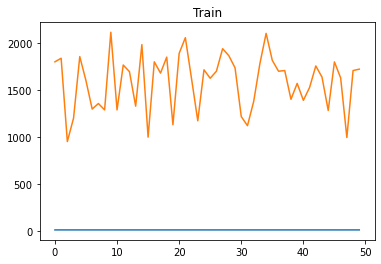

2/2 [==============================] - 1s 5ms/step


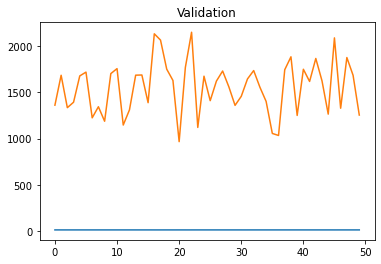

3/3 [==============================] - 0s 30ms/step


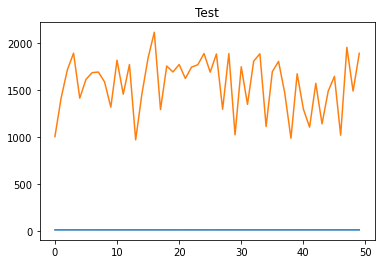

3/3 [==============================] - 0s 4ms/step


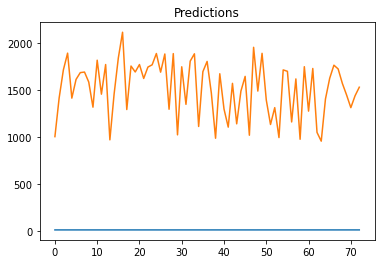

In [31]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [32]:
mavg_auto_rnn_mse

2346288.6117092315

### GRU

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2567992.2500 - root_mean_squared_error: 1602.4956

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 51s 4s/step - loss: 2534158.2500 - root_mean_squared_error: 1591.9039 - val_loss: 2505603.5000 - val_root_mean_squared_error: 1582.9098
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2542484.2500 - root_mean_squared_error: 1594.5170

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2533637.7500 - root_mean_squared_error: 1591.7405 - val_loss: 2505116.5000 - val_root_mean_squared_error: 1582.7560
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2533176.5000 - root_mean_squared_error: 1591.5956

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2533176.5000 - root_mean_squared_error: 1591.5956 - val_loss: 2504632.2500 - val_root_mean_squared_error: 1582.6030
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2532791.2500 - root_mean_squared_error: 1591.4746

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2532791.2500 - root_mean_squared_error: 1591.4746 - val_loss: 2504146.7500 - val_root_mean_squared_error: 1582.4496
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2532705.2500 - root_mean_squared_error: 1591.4475

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2532169.2500 - root_mean_squared_error: 1591.2792 - val_loss: 2503658.2500 - val_root_mean_squared_error: 1582.2953
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2539524.5000 - root_mean_squared_error: 1593.5885

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2531698.2500 - root_mean_squared_error: 1591.1311 - val_loss: 2503164.2500 - val_root_mean_squared_error: 1582.1392
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2531178.7500 - root_mean_squared_error: 1590.9679

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2531178.7500 - root_mean_squared_error: 1590.9679 - val_loss: 2502664.0000 - val_root_mean_squared_error: 1581.9811
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2563687.0000 - root_mean_squared_error: 1601.1517

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2530714.2500 - root_mean_squared_error: 1590.8219 - val_loss: 2502156.2500 - val_root_mean_squared_error: 1581.8206
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2537659.7500 - root_mean_squared_error: 1593.0034

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2530225.7500 - root_mean_squared_error: 1590.6683 - val_loss: 2501633.7500 - val_root_mean_squared_error: 1581.6554
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2529652.5000 - root_mean_squared_error: 1590.4882

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2529652.5000 - root_mean_squared_error: 1590.4882 - val_loss: 2501093.5000 - val_root_mean_squared_error: 1581.4846
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2537841.2500 - root_mean_squared_error: 1593.0603

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2529038.5000 - root_mean_squared_error: 1590.2950 - val_loss: 2500536.0000 - val_root_mean_squared_error: 1581.3083
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2528497.5000 - root_mean_squared_error: 1590.1250

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2528497.5000 - root_mean_squared_error: 1590.1250 - val_loss: 2499955.7500 - val_root_mean_squared_error: 1581.1249
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2527907.7500 - root_mean_squared_error: 1589.9396

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2527907.7500 - root_mean_squared_error: 1589.9396 - val_loss: 2499346.0000 - val_root_mean_squared_error: 1580.9320
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2526146.7500 - root_mean_squared_error: 1589.3856

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2527225.5000 - root_mean_squared_error: 1589.7250 - val_loss: 2498715.2500 - val_root_mean_squared_error: 1580.7325
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2519450.2500 - root_mean_squared_error: 1587.2776

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2526589.5000 - root_mean_squared_error: 1589.5249 - val_loss: 2498051.7500 - val_root_mean_squared_error: 1580.5226
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2525957.5000 - root_mean_squared_error: 1589.3262

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2525957.5000 - root_mean_squared_error: 1589.3262 - val_loss: 2497358.0000 - val_root_mean_squared_error: 1580.3031
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2525262.7500 - root_mean_squared_error: 1589.1075

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2525262.7500 - root_mean_squared_error: 1589.1075 - val_loss: 2496638.0000 - val_root_mean_squared_error: 1580.0753
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2501938.7500 - root_mean_squared_error: 1581.7518

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2524424.5000 - root_mean_squared_error: 1588.8438 - val_loss: 2495888.2500 - val_root_mean_squared_error: 1579.8380
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2510901.7500 - root_mean_squared_error: 1584.5825

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2523607.2500 - root_mean_squared_error: 1588.5865 - val_loss: 2495099.5000 - val_root_mean_squared_error: 1579.5884
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2522968.2500 - root_mean_squared_error: 1588.3854

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2522968.2500 - root_mean_squared_error: 1588.3854 - val_loss: 2494272.0000 - val_root_mean_squared_error: 1579.3264
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2522179.7500 - root_mean_squared_error: 1588.1372

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2522179.7500 - root_mean_squared_error: 1588.1372 - val_loss: 2493411.2500 - val_root_mean_squared_error: 1579.0540
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 2527198.0000 - root_mean_squared_error: 1589.7163

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2521232.2500 - root_mean_squared_error: 1587.8389 - val_loss: 2492522.7500 - val_root_mean_squared_error: 1578.7726
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2520406.0000 - root_mean_squared_error: 1587.5786

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2520406.0000 - root_mean_squared_error: 1587.5786 - val_loss: 2491612.2500 - val_root_mean_squared_error: 1578.4841
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2519323.7500 - root_mean_squared_error: 1587.2378

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2519323.7500 - root_mean_squared_error: 1587.2378 - val_loss: 2490675.2500 - val_root_mean_squared_error: 1578.1874
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2519886.0000 - root_mean_squared_error: 1587.4149

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2518380.5000 - root_mean_squared_error: 1586.9406 - val_loss: 2489733.5000 - val_root_mean_squared_error: 1577.8889
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2508449.7500 - root_mean_squared_error: 1583.8086

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2517485.7500 - root_mean_squared_error: 1586.6587 - val_loss: 2488783.0000 - val_root_mean_squared_error: 1577.5878
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2516701.2500 - root_mean_squared_error: 1586.4114

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2516701.2500 - root_mean_squared_error: 1586.4114 - val_loss: 2487844.7500 - val_root_mean_squared_error: 1577.2903
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2515537.5000 - root_mean_squared_error: 1586.0446

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2515537.5000 - root_mean_squared_error: 1586.0446 - val_loss: 2486927.2500 - val_root_mean_squared_error: 1576.9994
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2584156.2500 - root_mean_squared_error: 1607.5311

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2514781.0000 - root_mean_squared_error: 1585.8062 - val_loss: 2486035.2500 - val_root_mean_squared_error: 1576.7166
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2513769.2500 - root_mean_squared_error: 1585.4871

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2513769.2500 - root_mean_squared_error: 1585.4871 - val_loss: 2485175.0000 - val_root_mean_squared_error: 1576.4437
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2547316.7500 - root_mean_squared_error: 1596.0316

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2513122.7500 - root_mean_squared_error: 1585.2832 - val_loss: 2484339.2500 - val_root_mean_squared_error: 1576.1787
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2512195.2500 - root_mean_squared_error: 1584.9906

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2512195.2500 - root_mean_squared_error: 1584.9906 - val_loss: 2483544.5000 - val_root_mean_squared_error: 1575.9265
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2506642.7500 - root_mean_squared_error: 1583.2380

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2511231.0000 - root_mean_squared_error: 1584.6864 - val_loss: 2482776.7500 - val_root_mean_squared_error: 1575.6830
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2511034.7500 - root_mean_squared_error: 1584.6245

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2510628.2500 - root_mean_squared_error: 1584.4962 - val_loss: 2482038.0000 - val_root_mean_squared_error: 1575.4485
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2511232.2500 - root_mean_squared_error: 1584.6868

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2509959.0000 - root_mean_squared_error: 1584.2850 - val_loss: 2481333.2500 - val_root_mean_squared_error: 1575.2249
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2508743.5000 - root_mean_squared_error: 1583.9014

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2509272.5000 - root_mean_squared_error: 1584.0684 - val_loss: 2480657.7500 - val_root_mean_squared_error: 1575.0104
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2508503.2500 - root_mean_squared_error: 1583.8256

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2508503.2500 - root_mean_squared_error: 1583.8256 - val_loss: 2480013.7500 - val_root_mean_squared_error: 1574.8059
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2496705.5000 - root_mean_squared_error: 1580.0967

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2508023.5000 - root_mean_squared_error: 1583.6741 - val_loss: 2479397.5000 - val_root_mean_squared_error: 1574.6102
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 2505428.7500 - root_mean_squared_error: 1582.8546

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2507278.5000 - root_mean_squared_error: 1583.4388 - val_loss: 2478805.7500 - val_root_mean_squared_error: 1574.4224
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2506764.5000 - root_mean_squared_error: 1583.2765

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2506764.5000 - root_mean_squared_error: 1583.2765 - val_loss: 2478242.2500 - val_root_mean_squared_error: 1574.2434
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2509321.7500 - root_mean_squared_error: 1584.0839

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2506060.0000 - root_mean_squared_error: 1583.0540 - val_loss: 2477703.2500 - val_root_mean_squared_error: 1574.0721
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2505848.5000 - root_mean_squared_error: 1582.9872

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2505848.5000 - root_mean_squared_error: 1582.9872 - val_loss: 2477185.5000 - val_root_mean_squared_error: 1573.9077
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2501062.2500 - root_mean_squared_error: 1581.4747

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2505312.7500 - root_mean_squared_error: 1582.8180 - val_loss: 2476685.2500 - val_root_mean_squared_error: 1573.7488
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2495947.5000 - root_mean_squared_error: 1579.8568

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2504606.0000 - root_mean_squared_error: 1582.5947 - val_loss: 2476197.2500 - val_root_mean_squared_error: 1573.5938
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2503390.2500 - root_mean_squared_error: 1582.2106

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2504571.2500 - root_mean_squared_error: 1582.5837 - val_loss: 2475724.7500 - val_root_mean_squared_error: 1573.4436
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2503836.0000 - root_mean_squared_error: 1582.3514

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2503836.0000 - root_mean_squared_error: 1582.3514 - val_loss: 2475271.7500 - val_root_mean_squared_error: 1573.2997
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2503311.2500 - root_mean_squared_error: 1582.1855

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2503311.2500 - root_mean_squared_error: 1582.1855 - val_loss: 2474831.5000 - val_root_mean_squared_error: 1573.1597
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2502693.5000 - root_mean_squared_error: 1581.9904

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2502693.5000 - root_mean_squared_error: 1581.9904 - val_loss: 2474406.5000 - val_root_mean_squared_error: 1573.0247
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 2475304.5000 - root_mean_squared_error: 1573.3101

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2502440.2500 - root_mean_squared_error: 1581.9103 - val_loss: 2473995.2500 - val_root_mean_squared_error: 1572.8939
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2502000.7500 - root_mean_squared_error: 1581.7714

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 9s 17ms/step


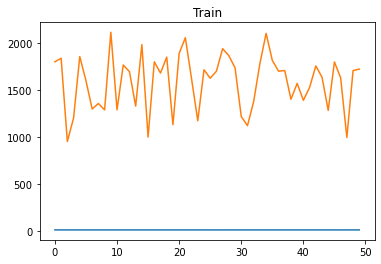

2/2 [==============================] - 3s 9ms/step


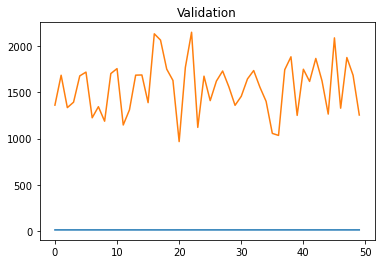

3/3 [==============================] - 0s 7ms/step


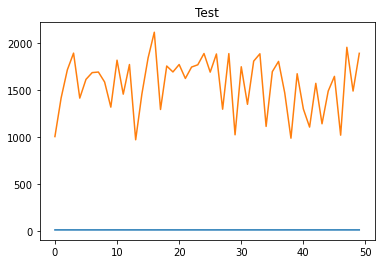

3/3 [==============================] - 0s 5ms/step


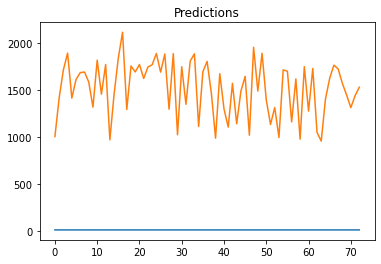

In [33]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
mavg_auto_gru_mse

2349440.065357125

### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2531944.5000 - root_mean_squared_error: 1591.2085

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 67s 4s/step - loss: 2532471.2500 - root_mean_squared_error: 1591.3740 - val_loss: 2504019.2500 - val_root_mean_squared_error: 1582.4093
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2543160.0000 - root_mean_squared_error: 1594.7288

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2532114.0000 - root_mean_squared_error: 1591.2617 - val_loss: 2503678.5000 - val_root_mean_squared_error: 1582.3016
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2531789.7500 - root_mean_squared_error: 1591.1599

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2531789.7500 - root_mean_squared_error: 1591.1599 - val_loss: 2503336.5000 - val_root_mean_squared_error: 1582.1936
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2527089.5000 - root_mean_squared_error: 1589.6823

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 2531376.7500 - root_mean_squared_error: 1591.0302 - val_loss: 2502983.5000 - val_root_mean_squared_error: 1582.0822
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2536916.5000 - root_mean_squared_error: 1592.7700

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2530998.0000 - root_mean_squared_error: 1590.9110 - val_loss: 2502621.7500 - val_root_mean_squared_error: 1581.9677
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2509024.2500 - root_mean_squared_error: 1583.9900

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2530692.2500 - root_mean_squared_error: 1590.8149 - val_loss: 2502248.2500 - val_root_mean_squared_error: 1581.8496
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2528808.5000 - root_mean_squared_error: 1590.2228

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 2530314.5000 - root_mean_squared_error: 1590.6963 - val_loss: 2501857.0000 - val_root_mean_squared_error: 1581.7260
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2527426.5000 - root_mean_squared_error: 1589.7882

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2529991.2500 - root_mean_squared_error: 1590.5946 - val_loss: 2501450.2500 - val_root_mean_squared_error: 1581.5974
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2529571.0000 - root_mean_squared_error: 1590.4625

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2529571.0000 - root_mean_squared_error: 1590.4625 - val_loss: 2501024.5000 - val_root_mean_squared_error: 1581.4626
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2529042.5000 - root_mean_squared_error: 1590.2964

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2529042.5000 - root_mean_squared_error: 1590.2964 - val_loss: 2500577.0000 - val_root_mean_squared_error: 1581.3213
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2528502.0000 - root_mean_squared_error: 1590.1265

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2528502.0000 - root_mean_squared_error: 1590.1265 - val_loss: 2500106.0000 - val_root_mean_squared_error: 1581.1724
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2523038.7500 - root_mean_squared_error: 1588.4076

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2528115.7500 - root_mean_squared_error: 1590.0050 - val_loss: 2499610.5000 - val_root_mean_squared_error: 1581.0156
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2522020.5000 - root_mean_squared_error: 1588.0870

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 2527622.5000 - root_mean_squared_error: 1589.8499 - val_loss: 2499089.0000 - val_root_mean_squared_error: 1580.8507
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2525456.5000 - root_mean_squared_error: 1589.1685

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2527178.0000 - root_mean_squared_error: 1589.7101 - val_loss: 2498541.7500 - val_root_mean_squared_error: 1580.6776
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2526594.2500 - root_mean_squared_error: 1589.5264

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2526594.2500 - root_mean_squared_error: 1589.5264 - val_loss: 2497967.5000 - val_root_mean_squared_error: 1580.4960
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2539155.5000 - root_mean_squared_error: 1593.4728

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2525970.0000 - root_mean_squared_error: 1589.3301 - val_loss: 2497369.0000 - val_root_mean_squared_error: 1580.3066
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2525286.0000 - root_mean_squared_error: 1589.1149

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2525286.0000 - root_mean_squared_error: 1589.1149 - val_loss: 2496744.2500 - val_root_mean_squared_error: 1580.1089
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2546633.2500 - root_mean_squared_error: 1595.8174

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2524754.7500 - root_mean_squared_error: 1588.9476 - val_loss: 2496094.2500 - val_root_mean_squared_error: 1579.9032
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2524059.0000 - root_mean_squared_error: 1588.7288

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2524059.0000 - root_mean_squared_error: 1588.7288 - val_loss: 2495423.5000 - val_root_mean_squared_error: 1579.6909
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2523419.5000 - root_mean_squared_error: 1588.5275

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 2523419.5000 - root_mean_squared_error: 1588.5275 - val_loss: 2494731.5000 - val_root_mean_squared_error: 1579.4719
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2505313.2500 - root_mean_squared_error: 1582.8181

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2522622.0000 - root_mean_squared_error: 1588.2764 - val_loss: 2494025.7500 - val_root_mean_squared_error: 1579.2484
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2521992.7500 - root_mean_squared_error: 1588.0784

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 2521992.7500 - root_mean_squared_error: 1588.0784 - val_loss: 2493298.2500 - val_root_mean_squared_error: 1579.0182
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 2471780.7500 - root_mean_squared_error: 1572.1898

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2521316.5000 - root_mean_squared_error: 1587.8654 - val_loss: 2492558.2500 - val_root_mean_squared_error: 1578.7838
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2516573.7500 - root_mean_squared_error: 1586.3712

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 2520587.5000 - root_mean_squared_error: 1587.6359 - val_loss: 2491801.7500 - val_root_mean_squared_error: 1578.5442
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2519756.0000 - root_mean_squared_error: 1587.3739

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2519756.0000 - root_mean_squared_error: 1587.3739 - val_loss: 2491034.2500 - val_root_mean_squared_error: 1578.3010
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2513079.7500 - root_mean_squared_error: 1585.2697

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2518926.7500 - root_mean_squared_error: 1587.1127 - val_loss: 2490249.0000 - val_root_mean_squared_error: 1578.0525
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 2557109.2500 - root_mean_squared_error: 1599.0964

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2518119.2500 - root_mean_squared_error: 1586.8583 - val_loss: 2489457.0000 - val_root_mean_squared_error: 1577.8013
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2460058.0000 - root_mean_squared_error: 1568.4572

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2517375.0000 - root_mean_squared_error: 1586.6238 - val_loss: 2488667.5000 - val_root_mean_squared_error: 1577.5511
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2516344.5000 - root_mean_squared_error: 1586.2990

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 4s/step - loss: 2516344.5000 - root_mean_squared_error: 1586.2990 - val_loss: 2487887.5000 - val_root_mean_squared_error: 1577.3038
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2524154.2500 - root_mean_squared_error: 1588.7587

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2515648.2500 - root_mean_squared_error: 1586.0795 - val_loss: 2487129.5000 - val_root_mean_squared_error: 1577.0636
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2531271.2500 - root_mean_squared_error: 1590.9969

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 2515135.2500 - root_mean_squared_error: 1585.9178 - val_loss: 2486407.5000 - val_root_mean_squared_error: 1576.8346
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2520350.2500 - root_mean_squared_error: 1587.5612

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2514292.0000 - root_mean_squared_error: 1585.6519 - val_loss: 2485712.0000 - val_root_mean_squared_error: 1576.6141
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2493463.2500 - root_mean_squared_error: 1579.0704

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2513599.0000 - root_mean_squared_error: 1585.4333 - val_loss: 2485036.2500 - val_root_mean_squared_error: 1576.3998
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2509190.2500 - root_mean_squared_error: 1584.0424

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2512751.0000 - root_mean_squared_error: 1585.1659 - val_loss: 2484381.5000 - val_root_mean_squared_error: 1576.1921
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2523861.0000 - root_mean_squared_error: 1588.6664

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2512131.7500 - root_mean_squared_error: 1584.9706 - val_loss: 2483739.7500 - val_root_mean_squared_error: 1575.9885
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2511570.7500 - root_mean_squared_error: 1584.7936

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 2511570.7500 - root_mean_squared_error: 1584.7936 - val_loss: 2483114.5000 - val_root_mean_squared_error: 1575.7902
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 2519777.7500 - root_mean_squared_error: 1587.3807

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2511048.7500 - root_mean_squared_error: 1584.6289 - val_loss: 2482506.2500 - val_root_mean_squared_error: 1575.5972
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2502517.2500 - root_mean_squared_error: 1581.9347

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 2510542.7500 - root_mean_squared_error: 1584.4692 - val_loss: 2481910.5000 - val_root_mean_squared_error: 1575.4081
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2513235.5000 - root_mean_squared_error: 1585.3187

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2509808.7500 - root_mean_squared_error: 1584.2375 - val_loss: 2481328.0000 - val_root_mean_squared_error: 1575.2231
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 2489221.0000 - root_mean_squared_error: 1577.7266

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 55s 8s/step - loss: 2509359.7500 - root_mean_squared_error: 1584.0958 - val_loss: 2480765.2500 - val_root_mean_squared_error: 1575.0446
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2508781.0000 - root_mean_squared_error: 1583.9132

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2508781.0000 - root_mean_squared_error: 1583.9132 - val_loss: 2480221.5000 - val_root_mean_squared_error: 1574.8719
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2508221.7500 - root_mean_squared_error: 1583.7367

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 52s 7s/step - loss: 2508221.7500 - root_mean_squared_error: 1583.7367 - val_loss: 2479697.7500 - val_root_mean_squared_error: 1574.7056
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2512544.7500 - root_mean_squared_error: 1585.1008

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2507865.5000 - root_mean_squared_error: 1583.6241 - val_loss: 2479195.7500 - val_root_mean_squared_error: 1574.5463
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2506986.5000 - root_mean_squared_error: 1583.3466

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2506986.5000 - root_mean_squared_error: 1583.3466 - val_loss: 2478711.2500 - val_root_mean_squared_error: 1574.3923
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2506965.5000 - root_mean_squared_error: 1583.3400

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2506965.5000 - root_mean_squared_error: 1583.3400 - val_loss: 2478246.0000 - val_root_mean_squared_error: 1574.2446
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2518076.2500 - root_mean_squared_error: 1586.8447

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2505988.7500 - root_mean_squared_error: 1583.0315 - val_loss: 2477793.7500 - val_root_mean_squared_error: 1574.1010
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2505700.5000 - root_mean_squared_error: 1582.9404

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 2505700.5000 - root_mean_squared_error: 1582.9404 - val_loss: 2477357.2500 - val_root_mean_squared_error: 1573.9623
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2505450.5000 - root_mean_squared_error: 1582.8615

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 2505450.5000 - root_mean_squared_error: 1582.8615 - val_loss: 2476934.5000 - val_root_mean_squared_error: 1573.8280
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 2474170.7500 - root_mean_squared_error: 1572.9497

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 2504895.5000 - root_mean_squared_error: 1582.6862 - val_loss: 2476526.2500 - val_root_mean_squared_error: 1573.6982
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2503159.7500 - root_mean_squared_error: 1582.1377

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 7s 8ms/step


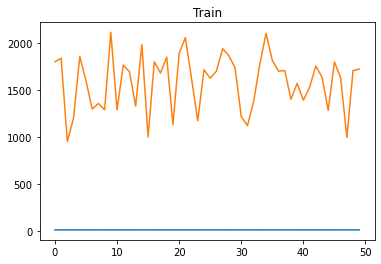

2/2 [==============================] - 3s 6ms/step


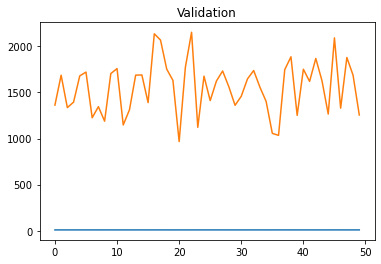

3/3 [==============================] - 0s 6ms/step


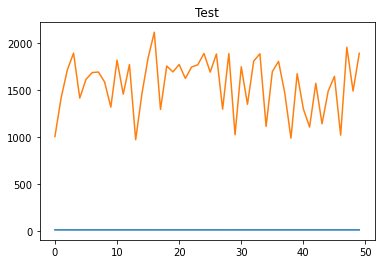

3/3 [==============================] - 1s 6ms/step


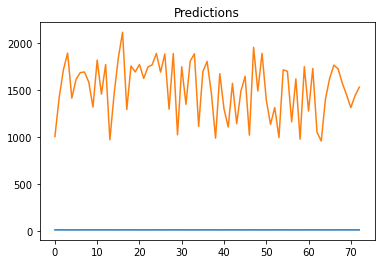

In [35]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [36]:
mavg_auto_lstm_mse

2351911.6254102197

# Hybrid

## General

### CNN LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2531090.2500 - root_mean_squared_error: 1590.9401

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 163s 16s/step - loss: 2529242.7500 - root_mean_squared_error: 1590.3594 - val_loss: 2502282.7500 - val_root_mean_squared_error: 1581.8605
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2528087.2500 - root_mean_squared_error: 1589.9960

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 91s 13s/step - loss: 2528087.2500 - root_mean_squared_error: 1589.9960 - val_loss: 2501384.7500 - val_root_mean_squared_error: 1581.5767
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2527247.0000 - root_mean_squared_error: 1589.7317

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 99s 13s/step - loss: 2527247.0000 - root_mean_squared_error: 1589.7317 - val_loss: 2500591.7500 - val_root_mean_squared_error: 1581.3259
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2526462.5000 - root_mean_squared_error: 1589.4850

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 105s 14s/step - loss: 2526462.5000 - root_mean_squared_error: 1589.4850 - val_loss: 2499831.0000 - val_root_mean_squared_error: 1581.0853
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2525709.0000 - root_mean_squared_error: 1589.2479

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 96s 14s/step - loss: 2525709.0000 - root_mean_squared_error: 1589.2479 - val_loss: 2499090.2500 - val_root_mean_squared_error: 1580.8511
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2524973.2500 - root_mean_squared_error: 1589.0165

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 82s 12s/step - loss: 2524973.2500 - root_mean_squared_error: 1589.0165 - val_loss: 2498355.5000 - val_root_mean_squared_error: 1580.6187
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2524236.2500 - root_mean_squared_error: 1588.7845

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 91s 13s/step - loss: 2524236.2500 - root_mean_squared_error: 1588.7845 - val_loss: 2497622.0000 - val_root_mean_squared_error: 1580.3867
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2523507.0000 - root_mean_squared_error: 1588.5551

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 101s 14s/step - loss: 2523507.0000 - root_mean_squared_error: 1588.5551 - val_loss: 2496899.2500 - val_root_mean_squared_error: 1580.1580
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2522794.0000 - root_mean_squared_error: 1588.3306

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 96s 13s/step - loss: 2522794.0000 - root_mean_squared_error: 1588.3306 - val_loss: 2496196.5000 - val_root_mean_squared_error: 1579.9355
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2522096.7500 - root_mean_squared_error: 1588.1111

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 112s 16s/step - loss: 2522096.7500 - root_mean_squared_error: 1588.1111 - val_loss: 2495530.5000 - val_root_mean_squared_error: 1579.7249
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2521445.7500 - root_mean_squared_error: 1587.9061

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 97s 14s/step - loss: 2521445.7500 - root_mean_squared_error: 1587.9061 - val_loss: 2494900.7500 - val_root_mean_squared_error: 1579.5255
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2520827.7500 - root_mean_squared_error: 1587.7114

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 104s 15s/step - loss: 2520827.7500 - root_mean_squared_error: 1587.7114 - val_loss: 2494305.0000 - val_root_mean_squared_error: 1579.3369
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2520237.7500 - root_mean_squared_error: 1587.5256

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 101s 14s/step - loss: 2520237.7500 - root_mean_squared_error: 1587.5256 - val_loss: 2493726.2500 - val_root_mean_squared_error: 1579.1537
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2519667.5000 - root_mean_squared_error: 1587.3461

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 111s 15s/step - loss: 2519667.5000 - root_mean_squared_error: 1587.3461 - val_loss: 2493174.5000 - val_root_mean_squared_error: 1578.9789
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2519136.2500 - root_mean_squared_error: 1587.1787

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 102s 15s/step - loss: 2519136.2500 - root_mean_squared_error: 1587.1787 - val_loss: 2492674.7500 - val_root_mean_squared_error: 1578.8207
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2518647.5000 - root_mean_squared_error: 1587.0248

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 92s 12s/step - loss: 2518647.5000 - root_mean_squared_error: 1587.0248 - val_loss: 2492206.5000 - val_root_mean_squared_error: 1578.6724
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2518193.2500 - root_mean_squared_error: 1586.8816

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 125s 18s/step - loss: 2518193.2500 - root_mean_squared_error: 1586.8816 - val_loss: 2491768.2500 - val_root_mean_squared_error: 1578.5336
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2517762.5000 - root_mean_squared_error: 1586.7458

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 100s 14s/step - loss: 2517762.5000 - root_mean_squared_error: 1586.7458 - val_loss: 2491353.7500 - val_root_mean_squared_error: 1578.4022
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2517355.0000 - root_mean_squared_error: 1586.6174

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 138s 19s/step - loss: 2517355.0000 - root_mean_squared_error: 1586.6174 - val_loss: 2490956.2500 - val_root_mean_squared_error: 1578.2764
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2516964.5000 - root_mean_squared_error: 1586.4944

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 95s 14s/step - loss: 2516964.5000 - root_mean_squared_error: 1586.4944 - val_loss: 2490573.7500 - val_root_mean_squared_error: 1578.1552
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2516585.7500 - root_mean_squared_error: 1586.3750

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 135s 19s/step - loss: 2516585.7500 - root_mean_squared_error: 1586.3750 - val_loss: 2490204.7500 - val_root_mean_squared_error: 1578.0382
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2516561.7500 - root_mean_squared_error: 1586.3674

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 101s 14s/step - loss: 2516219.7500 - root_mean_squared_error: 1586.2596 - val_loss: 2489843.7500 - val_root_mean_squared_error: 1577.9238
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2496542.0000 - root_mean_squared_error: 1580.0449

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 92s 13s/step - loss: 2515861.2500 - root_mean_squared_error: 1586.1466 - val_loss: 2489491.7500 - val_root_mean_squared_error: 1577.8124
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2515512.2500 - root_mean_squared_error: 1586.0366

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 126s 17s/step - loss: 2515512.2500 - root_mean_squared_error: 1586.0366 - val_loss: 2489146.0000 - val_root_mean_squared_error: 1577.7028
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2515168.5000 - root_mean_squared_error: 1585.9282

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 106s 15s/step - loss: 2515168.5000 - root_mean_squared_error: 1585.9282 - val_loss: 2488808.2500 - val_root_mean_squared_error: 1577.5957
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2515179.2500 - root_mean_squared_error: 1585.9316

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 119s 17s/step - loss: 2514833.7500 - root_mean_squared_error: 1585.8228 - val_loss: 2488476.5000 - val_root_mean_squared_error: 1577.4906
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2514500.5000 - root_mean_squared_error: 1585.7177

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 96s 14s/step - loss: 2514500.5000 - root_mean_squared_error: 1585.7177 - val_loss: 2488146.5000 - val_root_mean_squared_error: 1577.3860
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2514171.2500 - root_mean_squared_error: 1585.6139

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 127s 18s/step - loss: 2514171.2500 - root_mean_squared_error: 1585.6139 - val_loss: 2487815.7500 - val_root_mean_squared_error: 1577.2811
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2513841.2500 - root_mean_squared_error: 1585.5098

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 97s 14s/step - loss: 2513841.2500 - root_mean_squared_error: 1585.5098 - val_loss: 2487490.0000 - val_root_mean_squared_error: 1577.1779
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2513516.5000 - root_mean_squared_error: 1585.4073

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 120s 17s/step - loss: 2513516.5000 - root_mean_squared_error: 1585.4073 - val_loss: 2487164.7500 - val_root_mean_squared_error: 1577.0747
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2513191.0000 - root_mean_squared_error: 1585.3047

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 110s 15s/step - loss: 2513191.0000 - root_mean_squared_error: 1585.3047 - val_loss: 2486836.5000 - val_root_mean_squared_error: 1576.9707
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2506030.7500 - root_mean_squared_error: 1583.0448

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 108s 15s/step - loss: 2512860.7500 - root_mean_squared_error: 1585.2006 - val_loss: 2486509.0000 - val_root_mean_squared_error: 1576.8668
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2512537.2500 - root_mean_squared_error: 1585.0985

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 141s 20s/step - loss: 2512537.2500 - root_mean_squared_error: 1585.0985 - val_loss: 2486190.2500 - val_root_mean_squared_error: 1576.7657
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2512226.2500 - root_mean_squared_error: 1585.0004

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 106s 15s/step - loss: 2512226.2500 - root_mean_squared_error: 1585.0004 - val_loss: 2485888.5000 - val_root_mean_squared_error: 1576.6700
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2511933.0000 - root_mean_squared_error: 1584.9078

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 138s 20s/step - loss: 2511933.0000 - root_mean_squared_error: 1584.9078 - val_loss: 2485606.5000 - val_root_mean_squared_error: 1576.5807
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2511658.0000 - root_mean_squared_error: 1584.8212

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 99s 14s/step - loss: 2511658.0000 - root_mean_squared_error: 1584.8212 - val_loss: 2485344.5000 - val_root_mean_squared_error: 1576.4976
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2511401.2500 - root_mean_squared_error: 1584.7401

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 142s 20s/step - loss: 2511401.2500 - root_mean_squared_error: 1584.7401 - val_loss: 2485096.5000 - val_root_mean_squared_error: 1576.4189
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2511157.5000 - root_mean_squared_error: 1584.6632

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 106s 15s/step - loss: 2511157.5000 - root_mean_squared_error: 1584.6632 - val_loss: 2484858.0000 - val_root_mean_squared_error: 1576.3433
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2510920.7500 - root_mean_squared_error: 1584.5885

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 96s 14s/step - loss: 2510920.7500 - root_mean_squared_error: 1584.5885 - val_loss: 2484626.7500 - val_root_mean_squared_error: 1576.2699
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2510692.5000 - root_mean_squared_error: 1584.5165

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 115s 16s/step - loss: 2510692.5000 - root_mean_squared_error: 1584.5165 - val_loss: 2484400.5000 - val_root_mean_squared_error: 1576.1981
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2510467.0000 - root_mean_squared_error: 1584.4453

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 107s 15s/step - loss: 2510467.0000 - root_mean_squared_error: 1584.4453 - val_loss: 2484174.5000 - val_root_mean_squared_error: 1576.1265
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2510239.5000 - root_mean_squared_error: 1584.3735

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 218s 31s/step - loss: 2510239.5000 - root_mean_squared_error: 1584.3735 - val_loss: 2483943.5000 - val_root_mean_squared_error: 1576.0531
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2510005.5000 - root_mean_squared_error: 1584.2997

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 70s 9s/step - loss: 2510005.5000 - root_mean_squared_error: 1584.2997 - val_loss: 2483703.0000 - val_root_mean_squared_error: 1575.9768
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2502663.5000 - root_mean_squared_error: 1581.9808

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 56s 8s/step - loss: 2509761.7500 - root_mean_squared_error: 1584.2228 - val_loss: 2483453.0000 - val_root_mean_squared_error: 1575.8976
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2509506.5000 - root_mean_squared_error: 1584.1422

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 49s 6s/step - loss: 2509506.5000 - root_mean_squared_error: 1584.1422 - val_loss: 2483191.7500 - val_root_mean_squared_error: 1575.8146
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2531789.7500 - root_mean_squared_error: 1591.1599

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2509242.2500 - root_mean_squared_error: 1584.0588 - val_loss: 2482924.7500 - val_root_mean_squared_error: 1575.7299
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2500905.2500 - root_mean_squared_error: 1581.4250

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2508976.0000 - root_mean_squared_error: 1583.9747 - val_loss: 2482664.7500 - val_root_mean_squared_error: 1575.6475
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2508721.0000 - root_mean_squared_error: 1583.8943

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2508721.0000 - root_mean_squared_error: 1583.8943 - val_loss: 2482419.0000 - val_root_mean_squared_error: 1575.5695
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2519341.7500 - root_mean_squared_error: 1587.2434

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2508485.0000 - root_mean_squared_error: 1583.8197 - val_loss: 2482195.2500 - val_root_mean_squared_error: 1575.4984
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2508270.7500 - root_mean_squared_error: 1583.7521

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 5s 24ms/step


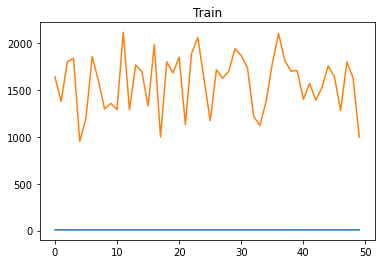

2/2 [==============================] - 3s 50ms/step


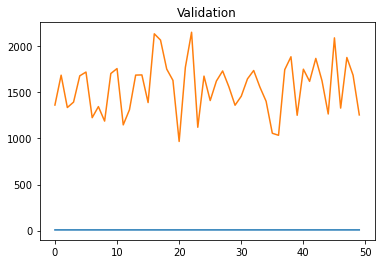

3/3 [==============================] - 0s 13ms/step


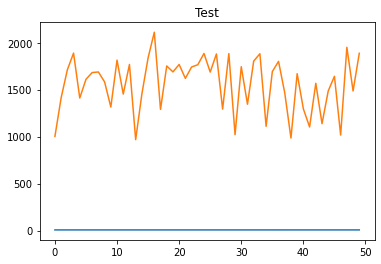

3/3 [==============================] - 0s 12ms/step


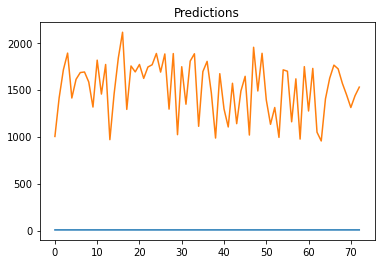

In [37]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [38]:
hybrid_cnn_lstm_mse

2357603.64674517

### RNN LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2531455.2500 - root_mean_squared_error: 1591.0548

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 48s 5s/step - loss: 2531455.2500 - root_mean_squared_error: 1591.0548 - val_loss: 2504664.0000 - val_root_mean_squared_error: 1582.6130
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2530388.5000 - root_mean_squared_error: 1590.7195

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2530388.5000 - root_mean_squared_error: 1590.7195 - val_loss: 2503626.0000 - val_root_mean_squared_error: 1582.2850
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 2556937.2500 - root_mean_squared_error: 1599.0426

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2529367.7500 - root_mean_squared_error: 1590.3986 - val_loss: 2502629.0000 - val_root_mean_squared_error: 1581.9700
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2536074.7500 - root_mean_squared_error: 1592.5059

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2528383.0000 - root_mean_squared_error: 1590.0890 - val_loss: 2501669.0000 - val_root_mean_squared_error: 1581.6665
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2527431.7500 - root_mean_squared_error: 1589.7898

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2527431.7500 - root_mean_squared_error: 1589.7898 - val_loss: 2500741.0000 - val_root_mean_squared_error: 1581.3730
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2526522.2500 - root_mean_squared_error: 1589.5038

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2526522.2500 - root_mean_squared_error: 1589.5038 - val_loss: 2499857.0000 - val_root_mean_squared_error: 1581.0936
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2524180.2500 - root_mean_squared_error: 1588.7668

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2525657.7500 - root_mean_squared_error: 1589.2318 - val_loss: 2499016.7500 - val_root_mean_squared_error: 1580.8279
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2535622.5000 - root_mean_squared_error: 1592.3638

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2524832.2500 - root_mean_squared_error: 1588.9720 - val_loss: 2498211.0000 - val_root_mean_squared_error: 1580.5731
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2524043.0000 - root_mean_squared_error: 1588.7238

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2524043.0000 - root_mean_squared_error: 1588.7238 - val_loss: 2497434.2500 - val_root_mean_squared_error: 1580.3273
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2517176.5000 - root_mean_squared_error: 1586.5613

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2523279.5000 - root_mean_squared_error: 1588.4834 - val_loss: 2496684.5000 - val_root_mean_squared_error: 1580.0901
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2542721.2500 - root_mean_squared_error: 1594.5913

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2522535.0000 - root_mean_squared_error: 1588.2490 - val_loss: 2495956.7500 - val_root_mean_squared_error: 1579.8597
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2563876.2500 - root_mean_squared_error: 1601.2108

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2521823.2500 - root_mean_squared_error: 1588.0249 - val_loss: 2495245.5000 - val_root_mean_squared_error: 1579.6346
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2532556.2500 - root_mean_squared_error: 1591.4008

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2521118.2500 - root_mean_squared_error: 1587.8030 - val_loss: 2494548.5000 - val_root_mean_squared_error: 1579.4139
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2520426.0000 - root_mean_squared_error: 1587.5850

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2520426.0000 - root_mean_squared_error: 1587.5850 - val_loss: 2493865.5000 - val_root_mean_squared_error: 1579.1978
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2519754.7500 - root_mean_squared_error: 1587.3735

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2519754.7500 - root_mean_squared_error: 1587.3735 - val_loss: 2493197.2500 - val_root_mean_squared_error: 1578.9861
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2519094.0000 - root_mean_squared_error: 1587.1654

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2519094.0000 - root_mean_squared_error: 1587.1654 - val_loss: 2492556.5000 - val_root_mean_squared_error: 1578.7832
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2494524.2500 - root_mean_squared_error: 1579.4062

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2518463.2500 - root_mean_squared_error: 1586.9667 - val_loss: 2491942.0000 - val_root_mean_squared_error: 1578.5886
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2470735.7500 - root_mean_squared_error: 1571.8574

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2517859.0000 - root_mean_squared_error: 1586.7762 - val_loss: 2491352.2500 - val_root_mean_squared_error: 1578.4019
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2534241.2500 - root_mean_squared_error: 1591.9301

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2517280.5000 - root_mean_squared_error: 1586.5940 - val_loss: 2490783.0000 - val_root_mean_squared_error: 1578.2214
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2515838.0000 - root_mean_squared_error: 1586.1393

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2516720.7500 - root_mean_squared_error: 1586.4176 - val_loss: 2490239.0000 - val_root_mean_squared_error: 1578.0491
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2516180.7500 - root_mean_squared_error: 1586.2474

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 2s/step - loss: 2516180.7500 - root_mean_squared_error: 1586.2474 - val_loss: 2489708.7500 - val_root_mean_squared_error: 1577.8811
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2515654.0000 - root_mean_squared_error: 1586.0813

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2515654.0000 - root_mean_squared_error: 1586.0813 - val_loss: 2489183.5000 - val_root_mean_squared_error: 1577.7146
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2500919.2500 - root_mean_squared_error: 1581.4294

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2515131.7500 - root_mean_squared_error: 1585.9167 - val_loss: 2488664.2500 - val_root_mean_squared_error: 1577.5500
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2514617.2500 - root_mean_squared_error: 1585.7545

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2514617.2500 - root_mean_squared_error: 1585.7545 - val_loss: 2488149.5000 - val_root_mean_squared_error: 1577.3870
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2514104.5000 - root_mean_squared_error: 1585.5928

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2514104.5000 - root_mean_squared_error: 1585.5928 - val_loss: 2487649.7500 - val_root_mean_squared_error: 1577.2285
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2476542.2500 - root_mean_squared_error: 1573.7034

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2513610.5000 - root_mean_squared_error: 1585.4370 - val_loss: 2487166.2500 - val_root_mean_squared_error: 1577.0752
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2513132.5000 - root_mean_squared_error: 1585.2863

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2513132.5000 - root_mean_squared_error: 1585.2863 - val_loss: 2486700.2500 - val_root_mean_squared_error: 1576.9275
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2512671.2500 - root_mean_squared_error: 1585.1407

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2512671.2500 - root_mean_squared_error: 1585.1407 - val_loss: 2486252.7500 - val_root_mean_squared_error: 1576.7855
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2513266.2500 - root_mean_squared_error: 1585.3285

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2512237.0000 - root_mean_squared_error: 1585.0038 - val_loss: 2485821.0000 - val_root_mean_squared_error: 1576.6487
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 2519770.5000 - root_mean_squared_error: 1587.3785

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2511812.2500 - root_mean_squared_error: 1584.8698 - val_loss: 2485409.7500 - val_root_mean_squared_error: 1576.5182
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2538541.0000 - root_mean_squared_error: 1593.2799

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2511405.7500 - root_mean_squared_error: 1584.7416 - val_loss: 2485011.7500 - val_root_mean_squared_error: 1576.3920
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2511014.5000 - root_mean_squared_error: 1584.6180

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2511014.5000 - root_mean_squared_error: 1584.6180 - val_loss: 2484626.0000 - val_root_mean_squared_error: 1576.2695
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2555956.0000 - root_mean_squared_error: 1598.7357

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2510632.7500 - root_mean_squared_error: 1584.4977 - val_loss: 2484251.0000 - val_root_mean_squared_error: 1576.1506
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2475847.0000 - root_mean_squared_error: 1573.4824

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2510259.2500 - root_mean_squared_error: 1584.3798 - val_loss: 2483886.5000 - val_root_mean_squared_error: 1576.0350
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2503262.2500 - root_mean_squared_error: 1582.1702

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2509900.2500 - root_mean_squared_error: 1584.2665 - val_loss: 2483533.2500 - val_root_mean_squared_error: 1575.9230
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2509552.2500 - root_mean_squared_error: 1584.1566

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2509552.2500 - root_mean_squared_error: 1584.1566 - val_loss: 2483190.5000 - val_root_mean_squared_error: 1575.8142
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2509215.0000 - root_mean_squared_error: 1584.0502

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 2509215.0000 - root_mean_squared_error: 1584.0502 - val_loss: 2482863.5000 - val_root_mean_squared_error: 1575.7104
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2526764.7500 - root_mean_squared_error: 1589.5801

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2508893.7500 - root_mean_squared_error: 1583.9487 - val_loss: 2482554.2500 - val_root_mean_squared_error: 1575.6123
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2508592.0000 - root_mean_squared_error: 1583.8535

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2508592.0000 - root_mean_squared_error: 1583.8535 - val_loss: 2482261.7500 - val_root_mean_squared_error: 1575.5195
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 2498970.0000 - root_mean_squared_error: 1580.8131

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2508305.5000 - root_mean_squared_error: 1583.7631 - val_loss: 2481989.0000 - val_root_mean_squared_error: 1575.4330
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2508040.2500 - root_mean_squared_error: 1583.6793

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2508040.2500 - root_mean_squared_error: 1583.6793 - val_loss: 2481730.7500 - val_root_mean_squared_error: 1575.3510
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 2530829.0000 - root_mean_squared_error: 1590.8579

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2507786.0000 - root_mean_squared_error: 1583.5991 - val_loss: 2481486.5000 - val_root_mean_squared_error: 1575.2734
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2521671.7500 - root_mean_squared_error: 1587.9773

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2507548.2500 - root_mean_squared_error: 1583.5240 - val_loss: 2481255.5000 - val_root_mean_squared_error: 1575.2002
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2507321.0000 - root_mean_squared_error: 1583.4523

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2507321.0000 - root_mean_squared_error: 1583.4523 - val_loss: 2481035.2500 - val_root_mean_squared_error: 1575.1302
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2500286.5000 - root_mean_squared_error: 1581.2294

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2507103.7500 - root_mean_squared_error: 1583.3837 - val_loss: 2480824.5000 - val_root_mean_squared_error: 1575.0634
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2509916.5000 - root_mean_squared_error: 1584.2716

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2506896.5000 - root_mean_squared_error: 1583.3182 - val_loss: 2480621.5000 - val_root_mean_squared_error: 1574.9989
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2494547.5000 - root_mean_squared_error: 1579.4137

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2506696.2500 - root_mean_squared_error: 1583.2550 - val_loss: 2480428.2500 - val_root_mean_squared_error: 1574.9375
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 2522918.0000 - root_mean_squared_error: 1588.3696

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2506505.7500 - root_mean_squared_error: 1583.1948 - val_loss: 2480240.5000 - val_root_mean_squared_error: 1574.8779
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2506321.2500 - root_mean_squared_error: 1583.1365

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2506321.2500 - root_mean_squared_error: 1583.1365 - val_loss: 2480059.5000 - val_root_mean_squared_error: 1574.8204
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2518525.2500 - root_mean_squared_error: 1586.9862

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 3s 23ms/step


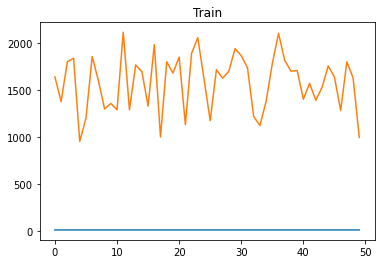

2/2 [==============================] - 3s 18ms/step


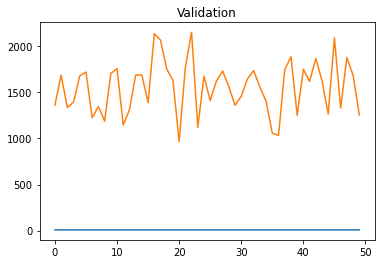

3/3 [==============================] - 0s 31ms/step


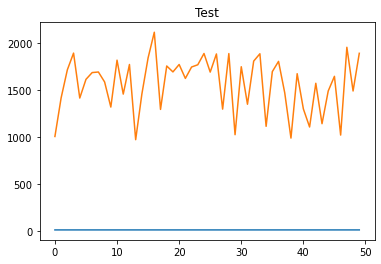

3/3 [==============================] - 0s 8ms/step


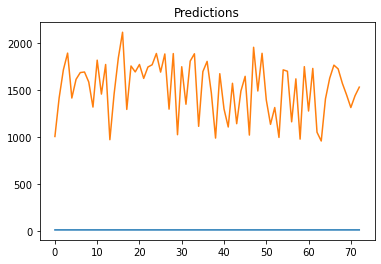

In [39]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [40]:
hybrid_rnn_lstm_mse

2355554.523383478

### RNN GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2531160.7500 - root_mean_squared_error: 1590.9622

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 31s 2s/step - loss: 2531160.7500 - root_mean_squared_error: 1590.9622 - val_loss: 2504343.7500 - val_root_mean_squared_error: 1582.5118
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2530150.5000 - root_mean_squared_error: 1590.6447

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2530150.5000 - root_mean_squared_error: 1590.6447 - val_loss: 2503333.7500 - val_root_mean_squared_error: 1582.1927
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2523967.7500 - root_mean_squared_error: 1588.7001

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2529139.5000 - root_mean_squared_error: 1590.3269 - val_loss: 2502307.2500 - val_root_mean_squared_error: 1581.8683
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2528096.2500 - root_mean_squared_error: 1589.9988

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2528096.2500 - root_mean_squared_error: 1589.9988 - val_loss: 2501266.7500 - val_root_mean_squared_error: 1581.5393
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2527052.5000 - root_mean_squared_error: 1589.6705

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2527052.5000 - root_mean_squared_error: 1589.6705 - val_loss: 2500206.2500 - val_root_mean_squared_error: 1581.2041
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2495486.0000 - root_mean_squared_error: 1579.7107

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2525982.5000 - root_mean_squared_error: 1589.3340 - val_loss: 2499139.0000 - val_root_mean_squared_error: 1580.8666
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 2543229.2500 - root_mean_squared_error: 1594.7505

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2524924.0000 - root_mean_squared_error: 1589.0010 - val_loss: 2498087.2500 - val_root_mean_squared_error: 1580.5338
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2521917.2500 - root_mean_squared_error: 1588.0546

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2523878.0000 - root_mean_squared_error: 1588.6718 - val_loss: 2497061.7500 - val_root_mean_squared_error: 1580.2094
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2529662.7500 - root_mean_squared_error: 1590.4913

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2522865.5000 - root_mean_squared_error: 1588.3530 - val_loss: 2496070.5000 - val_root_mean_squared_error: 1579.8958
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2521879.2500 - root_mean_squared_error: 1588.0426

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2521879.2500 - root_mean_squared_error: 1588.0426 - val_loss: 2495117.7500 - val_root_mean_squared_error: 1579.5941
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2520932.7500 - root_mean_squared_error: 1587.7445

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2520932.7500 - root_mean_squared_error: 1587.7445 - val_loss: 2494198.5000 - val_root_mean_squared_error: 1579.3032
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2520032.5000 - root_mean_squared_error: 1587.4611

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2520032.5000 - root_mean_squared_error: 1587.4611 - val_loss: 2493316.2500 - val_root_mean_squared_error: 1579.0238
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2512409.7500 - root_mean_squared_error: 1585.0582

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2519162.7500 - root_mean_squared_error: 1587.1870 - val_loss: 2492473.0000 - val_root_mean_squared_error: 1578.7568
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2518329.7500 - root_mean_squared_error: 1586.9246

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2518329.7500 - root_mean_squared_error: 1586.9246 - val_loss: 2491673.7500 - val_root_mean_squared_error: 1578.5035
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2517547.2500 - root_mean_squared_error: 1586.6781

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2517547.2500 - root_mean_squared_error: 1586.6781 - val_loss: 2490912.0000 - val_root_mean_squared_error: 1578.2622
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2516800.0000 - root_mean_squared_error: 1586.4425

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2516800.0000 - root_mean_squared_error: 1586.4425 - val_loss: 2490194.0000 - val_root_mean_squared_error: 1578.0349
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2504904.5000 - root_mean_squared_error: 1582.6890

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2516095.2500 - root_mean_squared_error: 1586.2205 - val_loss: 2489518.5000 - val_root_mean_squared_error: 1577.8208
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2511406.0000 - root_mean_squared_error: 1584.7416

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2515433.2500 - root_mean_squared_error: 1586.0117 - val_loss: 2488883.2500 - val_root_mean_squared_error: 1577.6195
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2514813.5000 - root_mean_squared_error: 1585.8164

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2514813.5000 - root_mean_squared_error: 1585.8164 - val_loss: 2488289.0000 - val_root_mean_squared_error: 1577.4312
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2514232.7500 - root_mean_squared_error: 1585.6332

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2514232.7500 - root_mean_squared_error: 1585.6332 - val_loss: 2487736.2500 - val_root_mean_squared_error: 1577.2560
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2498631.7500 - root_mean_squared_error: 1580.7061

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2513692.2500 - root_mean_squared_error: 1585.4628 - val_loss: 2487221.0000 - val_root_mean_squared_error: 1577.0925
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 2512689.7500 - root_mean_squared_error: 1585.1466

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2513190.2500 - root_mean_squared_error: 1585.3044 - val_loss: 2486743.0000 - val_root_mean_squared_error: 1576.9409
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2508185.5000 - root_mean_squared_error: 1583.7252

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2512723.7500 - root_mean_squared_error: 1585.1573 - val_loss: 2486298.0000 - val_root_mean_squared_error: 1576.7999
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2512289.0000 - root_mean_squared_error: 1585.0201

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2512289.0000 - root_mean_squared_error: 1585.0201 - val_loss: 2485886.2500 - val_root_mean_squared_error: 1576.6693
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2511888.5000 - root_mean_squared_error: 1584.8938

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2511888.5000 - root_mean_squared_error: 1584.8938 - val_loss: 2485503.7500 - val_root_mean_squared_error: 1576.5480
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2511516.5000 - root_mean_squared_error: 1584.7765

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2511516.5000 - root_mean_squared_error: 1584.7765 - val_loss: 2485145.7500 - val_root_mean_squared_error: 1576.4344
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2516974.2500 - root_mean_squared_error: 1586.4974

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2511167.2500 - root_mean_squared_error: 1584.6663 - val_loss: 2484813.2500 - val_root_mean_squared_error: 1576.3291
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2497341.5000 - root_mean_squared_error: 1580.2980

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2510843.2500 - root_mean_squared_error: 1584.5641 - val_loss: 2484500.7500 - val_root_mean_squared_error: 1576.2299
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2497492.0000 - root_mean_squared_error: 1580.3456

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2510537.5000 - root_mean_squared_error: 1584.4675 - val_loss: 2484206.0000 - val_root_mean_squared_error: 1576.1365
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2510249.0000 - root_mean_squared_error: 1584.3766

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2510249.0000 - root_mean_squared_error: 1584.3766 - val_loss: 2483928.5000 - val_root_mean_squared_error: 1576.0483
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2521923.2500 - root_mean_squared_error: 1588.0564

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2509978.0000 - root_mean_squared_error: 1584.2910 - val_loss: 2483668.2500 - val_root_mean_squared_error: 1575.9658
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2510785.2500 - root_mean_squared_error: 1584.5458

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2509722.7500 - root_mean_squared_error: 1584.2104 - val_loss: 2483423.5000 - val_root_mean_squared_error: 1575.8882
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2503750.7500 - root_mean_squared_error: 1582.3245

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2509483.0000 - root_mean_squared_error: 1584.1348 - val_loss: 2483190.0000 - val_root_mean_squared_error: 1575.8141
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2470047.2500 - root_mean_squared_error: 1571.6384

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2509253.2500 - root_mean_squared_error: 1584.0623 - val_loss: 2482967.7500 - val_root_mean_squared_error: 1575.7435
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2504851.7500 - root_mean_squared_error: 1582.6724

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2509035.5000 - root_mean_squared_error: 1583.9935 - val_loss: 2482754.7500 - val_root_mean_squared_error: 1575.6760
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2508825.7500 - root_mean_squared_error: 1583.9274

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2508825.7500 - root_mean_squared_error: 1583.9274 - val_loss: 2482553.0000 - val_root_mean_squared_error: 1575.6119
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2493318.5000 - root_mean_squared_error: 1579.0245

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2508627.7500 - root_mean_squared_error: 1583.8649 - val_loss: 2482359.2500 - val_root_mean_squared_error: 1575.5505
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2508436.0000 - root_mean_squared_error: 1583.8043

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2508436.0000 - root_mean_squared_error: 1583.8043 - val_loss: 2482172.7500 - val_root_mean_squared_error: 1575.4913
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2508252.7500 - root_mean_squared_error: 1583.7465

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 2s/step - loss: 2508252.7500 - root_mean_squared_error: 1583.7465 - val_loss: 2481991.7500 - val_root_mean_squared_error: 1575.4338
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2536174.7500 - root_mean_squared_error: 1592.5372

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2508073.5000 - root_mean_squared_error: 1583.6898 - val_loss: 2481818.0000 - val_root_mean_squared_error: 1575.3787
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2513382.7500 - root_mean_squared_error: 1585.3652

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2507904.0000 - root_mean_squared_error: 1583.6364 - val_loss: 2481651.2500 - val_root_mean_squared_error: 1575.3258
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 2502860.2500 - root_mean_squared_error: 1582.0431

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2507738.7500 - root_mean_squared_error: 1583.5841 - val_loss: 2481489.7500 - val_root_mean_squared_error: 1575.2745
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2505950.2500 - root_mean_squared_error: 1583.0193

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2507579.0000 - root_mean_squared_error: 1583.5337 - val_loss: 2481331.2500 - val_root_mean_squared_error: 1575.2242
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 2478352.2500 - root_mean_squared_error: 1574.2783

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2507421.2500 - root_mean_squared_error: 1583.4839 - val_loss: 2481177.5000 - val_root_mean_squared_error: 1575.1754
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2507269.0000 - root_mean_squared_error: 1583.4358

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2507269.0000 - root_mean_squared_error: 1583.4358 - val_loss: 2481027.0000 - val_root_mean_squared_error: 1575.1277
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2507119.7500 - root_mean_squared_error: 1583.3887

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2507119.7500 - root_mean_squared_error: 1583.3887 - val_loss: 2480879.7500 - val_root_mean_squared_error: 1575.0808
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2506974.5000 - root_mean_squared_error: 1583.3428

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2506974.5000 - root_mean_squared_error: 1583.3428 - val_loss: 2480735.0000 - val_root_mean_squared_error: 1575.0349
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2506830.7500 - root_mean_squared_error: 1583.2975

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2506830.7500 - root_mean_squared_error: 1583.2975 - val_loss: 2480594.7500 - val_root_mean_squared_error: 1574.9904
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2508874.7500 - root_mean_squared_error: 1583.9427

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2506691.2500 - root_mean_squared_error: 1583.2534 - val_loss: 2480457.5000 - val_root_mean_squared_error: 1574.9468
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 2523721.2500 - root_mean_squared_error: 1588.6224

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 2s 13ms/step


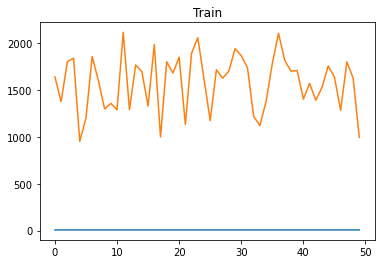

2/2 [==============================] - 1s 11ms/step


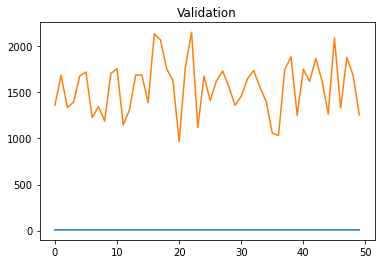

3/3 [==============================] - 0s 22ms/step


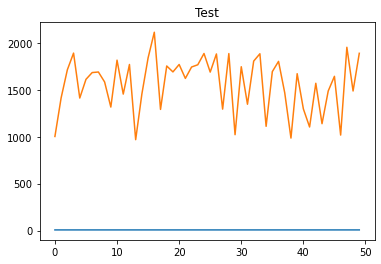

3/3 [==============================] - 0s 8ms/step


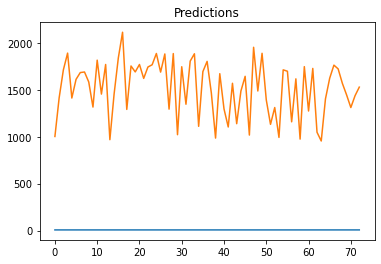

In [41]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [42]:
hybrid_rnn_gru_mse

2355978.779139569

### CNN GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2547238.7500 - root_mean_squared_error: 1596.0071

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 41s 4s/step - loss: 2532414.0000 - root_mean_squared_error: 1591.3561 - val_loss: 2505066.5000 - val_root_mean_squared_error: 1582.7402
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2530521.0000 - root_mean_squared_error: 1590.7611

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2530521.0000 - root_mean_squared_error: 1590.7611 - val_loss: 2503267.2500 - val_root_mean_squared_error: 1582.1716
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2547310.2500 - root_mean_squared_error: 1596.0295

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2528773.5000 - root_mean_squared_error: 1590.2118 - val_loss: 2501621.2500 - val_root_mean_squared_error: 1581.6515
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2517766.5000 - root_mean_squared_error: 1586.7472

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2527126.5000 - root_mean_squared_error: 1589.6938 - val_loss: 2499938.0000 - val_root_mean_squared_error: 1581.1193
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2523368.2500 - root_mean_squared_error: 1588.5114

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2525389.5000 - root_mean_squared_error: 1589.1475 - val_loss: 2498205.2500 - val_root_mean_squared_error: 1580.5713
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2523741.0000 - root_mean_squared_error: 1588.6287

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2523741.0000 - root_mean_squared_error: 1588.6287 - val_loss: 2496707.7500 - val_root_mean_squared_error: 1580.0974
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2522368.2500 - root_mean_squared_error: 1588.1965

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2522368.2500 - root_mean_squared_error: 1588.1965 - val_loss: 2495499.5000 - val_root_mean_squared_error: 1579.7150
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2521187.2500 - root_mean_squared_error: 1587.8247

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2521187.2500 - root_mean_squared_error: 1587.8247 - val_loss: 2494340.7500 - val_root_mean_squared_error: 1579.3481
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2519993.7500 - root_mean_squared_error: 1587.4489

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2519993.7500 - root_mean_squared_error: 1587.4489 - val_loss: 2493122.2500 - val_root_mean_squared_error: 1578.9624
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2518786.7500 - root_mean_squared_error: 1587.0686

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 2518786.7500 - root_mean_squared_error: 1587.0686 - val_loss: 2491964.2500 - val_root_mean_squared_error: 1578.5957
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2517681.2500 - root_mean_squared_error: 1586.7203

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2517681.2500 - root_mean_squared_error: 1586.7203 - val_loss: 2490901.0000 - val_root_mean_squared_error: 1578.2589
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2516653.0000 - root_mean_squared_error: 1586.3962

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2516653.0000 - root_mean_squared_error: 1586.3962 - val_loss: 2489952.7500 - val_root_mean_squared_error: 1577.9585
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2515789.0000 - root_mean_squared_error: 1586.1239

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2515789.0000 - root_mean_squared_error: 1586.1239 - val_loss: 2489219.0000 - val_root_mean_squared_error: 1577.7260
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2519921.7500 - root_mean_squared_error: 1587.4261

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2515101.0000 - root_mean_squared_error: 1585.9070 - val_loss: 2488593.7500 - val_root_mean_squared_error: 1577.5277
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2514506.5000 - root_mean_squared_error: 1585.7196

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2514506.5000 - root_mean_squared_error: 1585.7196 - val_loss: 2488031.5000 - val_root_mean_squared_error: 1577.3495
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2513963.5000 - root_mean_squared_error: 1585.5483

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2513963.5000 - root_mean_squared_error: 1585.5483 - val_loss: 2487506.2500 - val_root_mean_squared_error: 1577.1831
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2480058.2500 - root_mean_squared_error: 1574.8201

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2513454.5000 - root_mean_squared_error: 1585.3878 - val_loss: 2487027.7500 - val_root_mean_squared_error: 1577.0312
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2535761.7500 - root_mean_squared_error: 1592.4076

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2513009.0000 - root_mean_squared_error: 1585.2473 - val_loss: 2486618.7500 - val_root_mean_squared_error: 1576.9016
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2512626.5000 - root_mean_squared_error: 1585.1267

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2512626.5000 - root_mean_squared_error: 1585.1267 - val_loss: 2486271.2500 - val_root_mean_squared_error: 1576.7914
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2512295.2500 - root_mean_squared_error: 1585.0222

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2512295.2500 - root_mean_squared_error: 1585.0222 - val_loss: 2485960.7500 - val_root_mean_squared_error: 1576.6930
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2512001.0000 - root_mean_squared_error: 1584.9293

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2512001.0000 - root_mean_squared_error: 1584.9293 - val_loss: 2485682.2500 - val_root_mean_squared_error: 1576.6046
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2511731.5000 - root_mean_squared_error: 1584.8444

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2511731.5000 - root_mean_squared_error: 1584.8444 - val_loss: 2485429.2500 - val_root_mean_squared_error: 1576.5244
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2511487.2500 - root_mean_squared_error: 1584.7672

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2511487.2500 - root_mean_squared_error: 1584.7672 - val_loss: 2485195.2500 - val_root_mean_squared_error: 1576.4502
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2507968.5000 - root_mean_squared_error: 1583.6567

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2511259.5000 - root_mean_squared_error: 1584.6954 - val_loss: 2484976.0000 - val_root_mean_squared_error: 1576.3806
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2511045.5000 - root_mean_squared_error: 1584.6279

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2511045.5000 - root_mean_squared_error: 1584.6279 - val_loss: 2484768.5000 - val_root_mean_squared_error: 1576.3148
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2510842.7500 - root_mean_squared_error: 1584.5638

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2510842.7500 - root_mean_squared_error: 1584.5638 - val_loss: 2484572.7500 - val_root_mean_squared_error: 1576.2528
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2510652.5000 - root_mean_squared_error: 1584.5039

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2510652.5000 - root_mean_squared_error: 1584.5039 - val_loss: 2484388.2500 - val_root_mean_squared_error: 1576.1942
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2510471.5000 - root_mean_squared_error: 1584.4468

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2510471.5000 - root_mean_squared_error: 1584.4468 - val_loss: 2484213.5000 - val_root_mean_squared_error: 1576.1388
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2510299.7500 - root_mean_squared_error: 1584.3926

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2510299.7500 - root_mean_squared_error: 1584.3926 - val_loss: 2484047.7500 - val_root_mean_squared_error: 1576.0862
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2510136.5000 - root_mean_squared_error: 1584.3411

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2510136.5000 - root_mean_squared_error: 1584.3411 - val_loss: 2483889.5000 - val_root_mean_squared_error: 1576.0360
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2509980.7500 - root_mean_squared_error: 1584.2919

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2509980.7500 - root_mean_squared_error: 1584.2919 - val_loss: 2483734.5000 - val_root_mean_squared_error: 1575.9868
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2509827.0000 - root_mean_squared_error: 1584.2434

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2509827.0000 - root_mean_squared_error: 1584.2434 - val_loss: 2483584.5000 - val_root_mean_squared_error: 1575.9392
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2511971.5000 - root_mean_squared_error: 1584.9200

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2509678.2500 - root_mean_squared_error: 1584.1964 - val_loss: 2483436.5000 - val_root_mean_squared_error: 1575.8922
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2509529.0000 - root_mean_squared_error: 1584.1493

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2509529.0000 - root_mean_squared_error: 1584.1493 - val_loss: 2483284.5000 - val_root_mean_squared_error: 1575.8441
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2522681.2500 - root_mean_squared_error: 1588.2950

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2509375.5000 - root_mean_squared_error: 1584.1008 - val_loss: 2483130.5000 - val_root_mean_squared_error: 1575.7952
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2509226.5000 - root_mean_squared_error: 1584.0538

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2509226.5000 - root_mean_squared_error: 1584.0538 - val_loss: 2482989.7500 - val_root_mean_squared_error: 1575.7505
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2516312.5000 - root_mean_squared_error: 1586.2889

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2509091.2500 - root_mean_squared_error: 1584.0111 - val_loss: 2482860.7500 - val_root_mean_squared_error: 1575.7096
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2513008.0000 - root_mean_squared_error: 1585.2469

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2508963.7500 - root_mean_squared_error: 1583.9708 - val_loss: 2482735.5000 - val_root_mean_squared_error: 1575.6698
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2508839.5000 - root_mean_squared_error: 1583.9316

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2508839.5000 - root_mean_squared_error: 1583.9316 - val_loss: 2482613.5000 - val_root_mean_squared_error: 1575.6311
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2515830.5000 - root_mean_squared_error: 1586.1370

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2508718.0000 - root_mean_squared_error: 1583.8933 - val_loss: 2482493.7500 - val_root_mean_squared_error: 1575.5931
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2502014.5000 - root_mean_squared_error: 1581.7758

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2508599.7500 - root_mean_squared_error: 1583.8560 - val_loss: 2482377.0000 - val_root_mean_squared_error: 1575.5562
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2531123.5000 - root_mean_squared_error: 1590.9506

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2508484.5000 - root_mean_squared_error: 1583.8196 - val_loss: 2482261.5000 - val_root_mean_squared_error: 1575.5194
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2508370.5000 - root_mean_squared_error: 1583.7836

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2508370.5000 - root_mean_squared_error: 1583.7836 - val_loss: 2482149.0000 - val_root_mean_squared_error: 1575.4838
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2508257.7500 - root_mean_squared_error: 1583.7480

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 3s/step - loss: 2508257.7500 - root_mean_squared_error: 1583.7480 - val_loss: 2482037.7500 - val_root_mean_squared_error: 1575.4485
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2508147.5000 - root_mean_squared_error: 1583.7133

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2508147.5000 - root_mean_squared_error: 1583.7133 - val_loss: 2481927.7500 - val_root_mean_squared_error: 1575.4136
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2519176.0000 - root_mean_squared_error: 1587.1913

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2508037.7500 - root_mean_squared_error: 1583.6786 - val_loss: 2481819.5000 - val_root_mean_squared_error: 1575.3792
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2500709.2500 - root_mean_squared_error: 1581.3632

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2507929.7500 - root_mean_squared_error: 1583.6444 - val_loss: 2481713.0000 - val_root_mean_squared_error: 1575.3453
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2509052.2500 - root_mean_squared_error: 1583.9988

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2507824.5000 - root_mean_squared_error: 1583.6112 - val_loss: 2481607.2500 - val_root_mean_squared_error: 1575.3118
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2496070.2500 - root_mean_squared_error: 1579.8956

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2507718.0000 - root_mean_squared_error: 1583.5776 - val_loss: 2481502.2500 - val_root_mean_squared_error: 1575.2784
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2501968.0000 - root_mean_squared_error: 1581.7610

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 2s 23ms/step


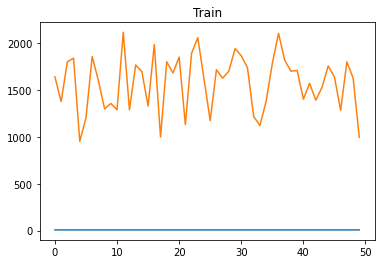

2/2 [==============================] - 2s 18ms/step


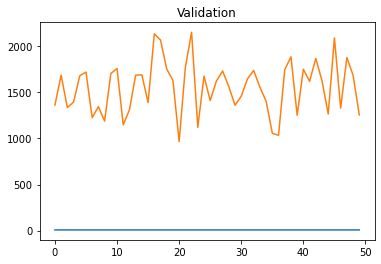

3/3 [==============================] - 4s 2s/step


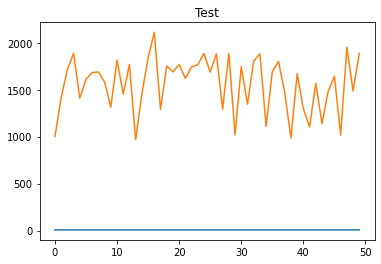

3/3 [==============================] - 0s 12ms/step


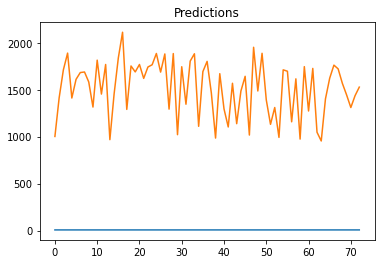

In [43]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [44]:
hybrid_cnn_gru_mse

2357024.717624597

### CNN RNN GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2530471.5000 - root_mean_squared_error: 1590.7456

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 32s 3s/step - loss: 2523307.0000 - root_mean_squared_error: 1588.4921 - val_loss: 2495936.2500 - val_root_mean_squared_error: 1579.8533
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2521390.0000 - root_mean_squared_error: 1587.8885

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2521390.0000 - root_mean_squared_error: 1587.8885 - val_loss: 2494280.2500 - val_root_mean_squared_error: 1579.3291
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2519855.0000 - root_mean_squared_error: 1587.4052

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2519855.0000 - root_mean_squared_error: 1587.4052 - val_loss: 2492944.7500 - val_root_mean_squared_error: 1578.9061
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2526221.7500 - root_mean_squared_error: 1589.4093

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2518630.2500 - root_mean_squared_error: 1587.0193 - val_loss: 2491823.2500 - val_root_mean_squared_error: 1578.5510
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2516612.0000 - root_mean_squared_error: 1586.3833

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2517542.0000 - root_mean_squared_error: 1586.6764 - val_loss: 2490785.7500 - val_root_mean_squared_error: 1578.2223
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2506134.0000 - root_mean_squared_error: 1583.0774

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2516567.5000 - root_mean_squared_error: 1586.3693 - val_loss: 2489885.2500 - val_root_mean_squared_error: 1577.9370
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2515711.7500 - root_mean_squared_error: 1586.0995

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2515711.7500 - root_mean_squared_error: 1586.0995 - val_loss: 2489059.7500 - val_root_mean_squared_error: 1577.6754
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2496464.5000 - root_mean_squared_error: 1580.0204

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2514890.0000 - root_mean_squared_error: 1585.8405 - val_loss: 2488263.7500 - val_root_mean_squared_error: 1577.4231
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2514106.2500 - root_mean_squared_error: 1585.5934

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2514106.2500 - root_mean_squared_error: 1585.5934 - val_loss: 2487475.2500 - val_root_mean_squared_error: 1577.1732
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2513327.0000 - root_mean_squared_error: 1585.3477

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2513327.0000 - root_mean_squared_error: 1585.3477 - val_loss: 2486741.7500 - val_root_mean_squared_error: 1576.9407
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2518307.2500 - root_mean_squared_error: 1586.9175

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2512654.5000 - root_mean_squared_error: 1585.1355 - val_loss: 2486144.0000 - val_root_mean_squared_error: 1576.7511
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2512096.2500 - root_mean_squared_error: 1584.9594

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2512096.2500 - root_mean_squared_error: 1584.9594 - val_loss: 2485609.7500 - val_root_mean_squared_error: 1576.5817
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2489382.2500 - root_mean_squared_error: 1577.7776

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2511565.5000 - root_mean_squared_error: 1584.7920 - val_loss: 2485099.5000 - val_root_mean_squared_error: 1576.4198
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2502037.5000 - root_mean_squared_error: 1581.7830

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2511060.0000 - root_mean_squared_error: 1584.6324 - val_loss: 2484602.7500 - val_root_mean_squared_error: 1576.2623
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2506672.0000 - root_mean_squared_error: 1583.2473

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2510568.5000 - root_mean_squared_error: 1584.4774 - val_loss: 2484120.7500 - val_root_mean_squared_error: 1576.1094
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2503852.0000 - root_mean_squared_error: 1582.3564

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2510093.2500 - root_mean_squared_error: 1584.3274 - val_loss: 2483651.7500 - val_root_mean_squared_error: 1575.9606
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2530835.5000 - root_mean_squared_error: 1590.8600

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2509626.2500 - root_mean_squared_error: 1584.1801 - val_loss: 2483195.5000 - val_root_mean_squared_error: 1575.8158
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2498827.2500 - root_mean_squared_error: 1580.7679

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2509174.5000 - root_mean_squared_error: 1584.0374 - val_loss: 2482751.0000 - val_root_mean_squared_error: 1575.6746
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2501532.7500 - root_mean_squared_error: 1581.6234

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2508731.7500 - root_mean_squared_error: 1583.8977 - val_loss: 2482309.5000 - val_root_mean_squared_error: 1575.5347
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2500671.5000 - root_mean_squared_error: 1581.3512

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2508293.2500 - root_mean_squared_error: 1583.7592 - val_loss: 2481874.7500 - val_root_mean_squared_error: 1575.3967
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2486888.7500 - root_mean_squared_error: 1576.9872

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2507860.0000 - root_mean_squared_error: 1583.6224 - val_loss: 2481445.0000 - val_root_mean_squared_error: 1575.2603
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2507433.7500 - root_mean_squared_error: 1583.4878

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2507433.7500 - root_mean_squared_error: 1583.4878 - val_loss: 2481017.7500 - val_root_mean_squared_error: 1575.1246
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2519294.5000 - root_mean_squared_error: 1587.2285

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2507007.0000 - root_mean_squared_error: 1583.3530 - val_loss: 2480599.7500 - val_root_mean_squared_error: 1574.9919
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2506593.5000 - root_mean_squared_error: 1583.2225

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2506593.5000 - root_mean_squared_error: 1583.2225 - val_loss: 2480185.5000 - val_root_mean_squared_error: 1574.8605
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2506180.5000 - root_mean_squared_error: 1583.0920

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2506180.5000 - root_mean_squared_error: 1583.0920 - val_loss: 2479775.5000 - val_root_mean_squared_error: 1574.7303
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2505769.5000 - root_mean_squared_error: 1582.9623

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2505769.5000 - root_mean_squared_error: 1582.9623 - val_loss: 2479367.7500 - val_root_mean_squared_error: 1574.6008
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2505363.7500 - root_mean_squared_error: 1582.8341

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2505363.7500 - root_mean_squared_error: 1582.8341 - val_loss: 2478964.5000 - val_root_mean_squared_error: 1574.4728
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2501837.5000 - root_mean_squared_error: 1581.7198

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2504960.5000 - root_mean_squared_error: 1582.7067 - val_loss: 2478562.7500 - val_root_mean_squared_error: 1574.3452
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2499719.2500 - root_mean_squared_error: 1581.0500

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2504558.0000 - root_mean_squared_error: 1582.5796 - val_loss: 2478161.7500 - val_root_mean_squared_error: 1574.2178
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2519795.5000 - root_mean_squared_error: 1587.3864

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2504157.7500 - root_mean_squared_error: 1582.4531 - val_loss: 2477760.5000 - val_root_mean_squared_error: 1574.0903
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2530707.0000 - root_mean_squared_error: 1590.8196

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2503759.2500 - root_mean_squared_error: 1582.3271 - val_loss: 2477362.0000 - val_root_mean_squared_error: 1573.9637
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2503359.5000 - root_mean_squared_error: 1582.2008

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2503359.5000 - root_mean_squared_error: 1582.2008 - val_loss: 2476965.5000 - val_root_mean_squared_error: 1573.8378
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2502208.5000 - root_mean_squared_error: 1581.8370

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2502965.2500 - root_mean_squared_error: 1582.0763 - val_loss: 2476568.7500 - val_root_mean_squared_error: 1573.7118
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2504634.0000 - root_mean_squared_error: 1582.6035

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2502565.2500 - root_mean_squared_error: 1581.9498 - val_loss: 2476172.2500 - val_root_mean_squared_error: 1573.5858
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2502170.2500 - root_mean_squared_error: 1581.8250

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2502170.2500 - root_mean_squared_error: 1581.8250 - val_loss: 2475774.5000 - val_root_mean_squared_error: 1573.4594
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2515110.2500 - root_mean_squared_error: 1585.9099

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2501772.5000 - root_mean_squared_error: 1581.6992 - val_loss: 2475378.2500 - val_root_mean_squared_error: 1573.3335
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2495916.7500 - root_mean_squared_error: 1579.8470

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2501374.0000 - root_mean_squared_error: 1581.5732 - val_loss: 2474981.2500 - val_root_mean_squared_error: 1573.2073
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2500974.7500 - root_mean_squared_error: 1581.4470

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2500974.7500 - root_mean_squared_error: 1581.4470 - val_loss: 2474579.2500 - val_root_mean_squared_error: 1573.0796
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2511541.7500 - root_mean_squared_error: 1584.7844

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2500572.0000 - root_mean_squared_error: 1581.3197 - val_loss: 2474172.7500 - val_root_mean_squared_error: 1572.9503
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2486640.5000 - root_mean_squared_error: 1576.9086

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2500164.5000 - root_mean_squared_error: 1581.1908 - val_loss: 2473763.7500 - val_root_mean_squared_error: 1572.8203
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2495085.2500 - root_mean_squared_error: 1579.5839

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2499753.7500 - root_mean_squared_error: 1581.0609 - val_loss: 2473348.5000 - val_root_mean_squared_error: 1572.6884
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2494121.2500 - root_mean_squared_error: 1579.2787

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2499336.5000 - root_mean_squared_error: 1580.9290 - val_loss: 2472930.5000 - val_root_mean_squared_error: 1572.5554
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2505910.0000 - root_mean_squared_error: 1583.0066

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2498918.5000 - root_mean_squared_error: 1580.7968 - val_loss: 2472509.5000 - val_root_mean_squared_error: 1572.4215
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2511558.0000 - root_mean_squared_error: 1584.7896

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2498496.2500 - root_mean_squared_error: 1580.6632 - val_loss: 2472088.7500 - val_root_mean_squared_error: 1572.2877
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2480266.0000 - root_mean_squared_error: 1574.8860

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2498075.2500 - root_mean_squared_error: 1580.5300 - val_loss: 2471667.0000 - val_root_mean_squared_error: 1572.1536
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2488279.2500 - root_mean_squared_error: 1577.4281

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2497648.7500 - root_mean_squared_error: 1580.3951 - val_loss: 2471242.5000 - val_root_mean_squared_error: 1572.0186
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2497227.7500 - root_mean_squared_error: 1580.2620

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2497227.7500 - root_mean_squared_error: 1580.2620 - val_loss: 2470814.0000 - val_root_mean_squared_error: 1571.8822
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2483065.5000 - root_mean_squared_error: 1575.7745

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2496797.2500 - root_mean_squared_error: 1580.1257 - val_loss: 2470386.2500 - val_root_mean_squared_error: 1571.7462
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2511116.7500 - root_mean_squared_error: 1584.6504

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2496369.5000 - root_mean_squared_error: 1579.9904 - val_loss: 2469959.0000 - val_root_mean_squared_error: 1571.6104
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2502796.7500 - root_mean_squared_error: 1582.0229

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 2s 13ms/step


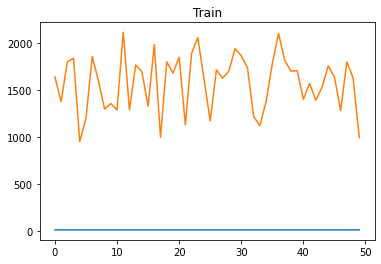

2/2 [==============================] - 1s 12ms/step


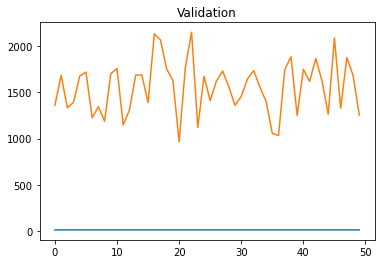

3/3 [==============================] - 0s 37ms/step


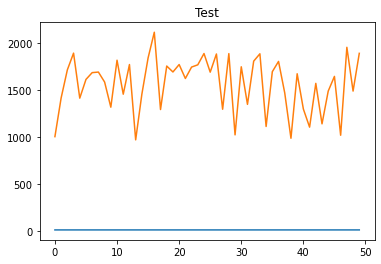

3/3 [==============================] - 0s 9ms/step


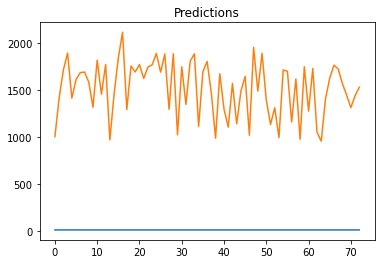

In [45]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [46]:
hybrid_cnn_rnn_gru_mse

2345496.3862025123

### LSTM RNN GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2531815.7500 - root_mean_squared_error: 1591.1681

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 39s 4s/step - loss: 2528796.7500 - root_mean_squared_error: 1590.2191 - val_loss: 2501039.0000 - val_root_mean_squared_error: 1581.4674
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2515796.7500 - root_mean_squared_error: 1586.1263

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2526141.5000 - root_mean_squared_error: 1589.3840 - val_loss: 2498305.7500 - val_root_mean_squared_error: 1580.6030
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2523339.0000 - root_mean_squared_error: 1588.5021

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2523339.0000 - root_mean_squared_error: 1588.5021 - val_loss: 2495365.0000 - val_root_mean_squared_error: 1579.6725
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2520306.5000 - root_mean_squared_error: 1587.5474

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2520306.5000 - root_mean_squared_error: 1587.5474 - val_loss: 2492225.7500 - val_root_mean_squared_error: 1578.6785
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2517136.2500 - root_mean_squared_error: 1586.5486

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2517136.2500 - root_mean_squared_error: 1586.5486 - val_loss: 2489067.0000 - val_root_mean_squared_error: 1577.6777
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2514040.7500 - root_mean_squared_error: 1585.5726

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2514040.7500 - root_mean_squared_error: 1585.5726 - val_loss: 2486119.0000 - val_root_mean_squared_error: 1576.7432
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2511223.2500 - root_mean_squared_error: 1584.6840

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2511223.2500 - root_mean_squared_error: 1584.6840 - val_loss: 2483520.0000 - val_root_mean_squared_error: 1575.9188
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2508770.2500 - root_mean_squared_error: 1583.9098

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2508770.2500 - root_mean_squared_error: 1583.9098 - val_loss: 2481296.0000 - val_root_mean_squared_error: 1575.2130
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2506678.5000 - root_mean_squared_error: 1583.2494

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 57s 8s/step - loss: 2506678.5000 - root_mean_squared_error: 1583.2494 - val_loss: 2479384.2500 - val_root_mean_squared_error: 1574.6061
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2504888.5000 - root_mean_squared_error: 1582.6840

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 2504888.5000 - root_mean_squared_error: 1582.6840 - val_loss: 2477772.2500 - val_root_mean_squared_error: 1574.0941
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2503384.0000 - root_mean_squared_error: 1582.2086

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2503384.0000 - root_mean_squared_error: 1582.2086 - val_loss: 2476441.0000 - val_root_mean_squared_error: 1573.6711
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2502147.5000 - root_mean_squared_error: 1581.8177

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2502147.5000 - root_mean_squared_error: 1581.8177 - val_loss: 2475374.2500 - val_root_mean_squared_error: 1573.3322
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2487768.5000 - root_mean_squared_error: 1577.2661

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2501178.2500 - root_mean_squared_error: 1581.5114 - val_loss: 2474530.0000 - val_root_mean_squared_error: 1573.0640
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2500405.0000 - root_mean_squared_error: 1581.2668

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 2500405.0000 - root_mean_squared_error: 1581.2668 - val_loss: 2473861.5000 - val_root_mean_squared_error: 1572.8514
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2499790.7500 - root_mean_squared_error: 1581.0726

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2499790.7500 - root_mean_squared_error: 1581.0726 - val_loss: 2473317.5000 - val_root_mean_squared_error: 1572.6785
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2499283.5000 - root_mean_squared_error: 1580.9122

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2499283.5000 - root_mean_squared_error: 1580.9122 - val_loss: 2472864.0000 - val_root_mean_squared_error: 1572.5343
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2498856.2500 - root_mean_squared_error: 1580.7771

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2498856.2500 - root_mean_squared_error: 1580.7771 - val_loss: 2472470.5000 - val_root_mean_squared_error: 1572.4092
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2498483.7500 - root_mean_squared_error: 1580.6593

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2498483.7500 - root_mean_squared_error: 1580.6593 - val_loss: 2472119.2500 - val_root_mean_squared_error: 1572.2975
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2498145.0000 - root_mean_squared_error: 1580.5521

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2498145.0000 - root_mean_squared_error: 1580.5521 - val_loss: 2471804.5000 - val_root_mean_squared_error: 1572.1974
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2497840.7500 - root_mean_squared_error: 1580.4558

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2497840.7500 - root_mean_squared_error: 1580.4558 - val_loss: 2471511.2500 - val_root_mean_squared_error: 1572.1041
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2497553.5000 - root_mean_squared_error: 1580.3650

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2497553.5000 - root_mean_squared_error: 1580.3650 - val_loss: 2471239.7500 - val_root_mean_squared_error: 1572.0177
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2497288.5000 - root_mean_squared_error: 1580.2811

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2497288.5000 - root_mean_squared_error: 1580.2811 - val_loss: 2470979.0000 - val_root_mean_squared_error: 1571.9348
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2497031.5000 - root_mean_squared_error: 1580.1998

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2497031.5000 - root_mean_squared_error: 1580.1998 - val_loss: 2470731.2500 - val_root_mean_squared_error: 1571.8560
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2496788.0000 - root_mean_squared_error: 1580.1228

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2496788.0000 - root_mean_squared_error: 1580.1228 - val_loss: 2470491.7500 - val_root_mean_squared_error: 1571.7798
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2496551.0000 - root_mean_squared_error: 1580.0477

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2496551.0000 - root_mean_squared_error: 1580.0477 - val_loss: 2470259.7500 - val_root_mean_squared_error: 1571.7061
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2480770.2500 - root_mean_squared_error: 1575.0461

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2496321.5000 - root_mean_squared_error: 1579.9751 - val_loss: 2470033.7500 - val_root_mean_squared_error: 1571.6342
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2496097.2500 - root_mean_squared_error: 1579.9042

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 2496097.2500 - root_mean_squared_error: 1579.9042 - val_loss: 2469812.5000 - val_root_mean_squared_error: 1571.5637
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2495878.2500 - root_mean_squared_error: 1579.8348

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 2495878.2500 - root_mean_squared_error: 1579.8348 - val_loss: 2469596.7500 - val_root_mean_squared_error: 1571.4951
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2495663.7500 - root_mean_squared_error: 1579.7670

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2495663.7500 - root_mean_squared_error: 1579.7670 - val_loss: 2469386.0000 - val_root_mean_squared_error: 1571.4280
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2495455.7500 - root_mean_squared_error: 1579.7012

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 47s 6s/step - loss: 2495455.7500 - root_mean_squared_error: 1579.7012 - val_loss: 2469178.7500 - val_root_mean_squared_error: 1571.3622
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2495248.0000 - root_mean_squared_error: 1579.6354

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2495248.0000 - root_mean_squared_error: 1579.6354 - val_loss: 2468976.2500 - val_root_mean_squared_error: 1571.2976
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2495047.0000 - root_mean_squared_error: 1579.5718

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 2495047.0000 - root_mean_squared_error: 1579.5718 - val_loss: 2468775.2500 - val_root_mean_squared_error: 1571.2336
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2494847.7500 - root_mean_squared_error: 1579.5087

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 46s 6s/step - loss: 2494847.7500 - root_mean_squared_error: 1579.5087 - val_loss: 2468576.2500 - val_root_mean_squared_error: 1571.1703
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2494650.0000 - root_mean_squared_error: 1579.4460

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 2494650.0000 - root_mean_squared_error: 1579.4460 - val_loss: 2468380.2500 - val_root_mean_squared_error: 1571.1079
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2494455.2500 - root_mean_squared_error: 1579.3844

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2494455.2500 - root_mean_squared_error: 1579.3844 - val_loss: 2468186.5000 - val_root_mean_squared_error: 1571.0464
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2494261.0000 - root_mean_squared_error: 1579.3230

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2494261.0000 - root_mean_squared_error: 1579.3230 - val_loss: 2467994.7500 - val_root_mean_squared_error: 1570.9852
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2494069.7500 - root_mean_squared_error: 1579.2625

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2494069.7500 - root_mean_squared_error: 1579.2625 - val_loss: 2467803.0000 - val_root_mean_squared_error: 1570.9242
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2509375.5000 - root_mean_squared_error: 1584.1008

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2493879.5000 - root_mean_squared_error: 1579.2021 - val_loss: 2467615.7500 - val_root_mean_squared_error: 1570.8646
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2493692.7500 - root_mean_squared_error: 1579.1431

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 2493692.7500 - root_mean_squared_error: 1579.1431 - val_loss: 2467429.0000 - val_root_mean_squared_error: 1570.8052
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2493505.7500 - root_mean_squared_error: 1579.0839

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 2493505.7500 - root_mean_squared_error: 1579.0839 - val_loss: 2467243.7500 - val_root_mean_squared_error: 1570.7462
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2492987.7500 - root_mean_squared_error: 1578.9198

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2493320.5000 - root_mean_squared_error: 1579.0251 - val_loss: 2467058.0000 - val_root_mean_squared_error: 1570.6871
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2493135.7500 - root_mean_squared_error: 1578.9667

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 2493135.7500 - root_mean_squared_error: 1578.9667 - val_loss: 2466872.2500 - val_root_mean_squared_error: 1570.6279
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2492951.0000 - root_mean_squared_error: 1578.9082

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 2492951.0000 - root_mean_squared_error: 1578.9082 - val_loss: 2466688.2500 - val_root_mean_squared_error: 1570.5695
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2492766.0000 - root_mean_squared_error: 1578.8496

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 2492766.0000 - root_mean_squared_error: 1578.8496 - val_loss: 2466506.0000 - val_root_mean_squared_error: 1570.5114
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2492583.0000 - root_mean_squared_error: 1578.7916

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 2492583.0000 - root_mean_squared_error: 1578.7916 - val_loss: 2466322.7500 - val_root_mean_squared_error: 1570.4530
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2492400.7500 - root_mean_squared_error: 1578.7339

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 2492400.7500 - root_mean_squared_error: 1578.7339 - val_loss: 2466139.7500 - val_root_mean_squared_error: 1570.3948
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2492218.2500 - root_mean_squared_error: 1578.6761

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2492218.2500 - root_mean_squared_error: 1578.6761 - val_loss: 2465957.2500 - val_root_mean_squared_error: 1570.3367
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2492036.2500 - root_mean_squared_error: 1578.6184

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2492036.2500 - root_mean_squared_error: 1578.6184 - val_loss: 2465777.7500 - val_root_mean_squared_error: 1570.2795
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2492812.0000 - root_mean_squared_error: 1578.8641

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 2491856.5000 - root_mean_squared_error: 1578.5615 - val_loss: 2465597.7500 - val_root_mean_squared_error: 1570.2222
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2491677.7500 - root_mean_squared_error: 1578.5049

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 5s 46ms/step


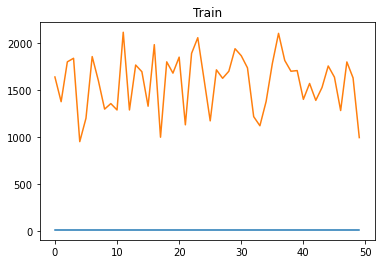

2/2 [==============================] - 3s 21ms/step


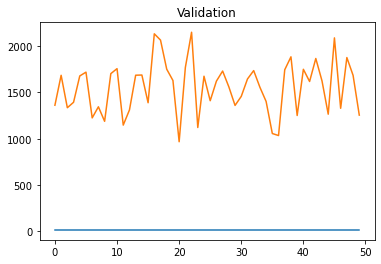

3/3 [==============================] - 0s 23ms/step


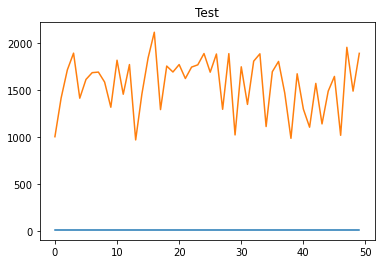

3/3 [==============================] - 0s 27ms/step


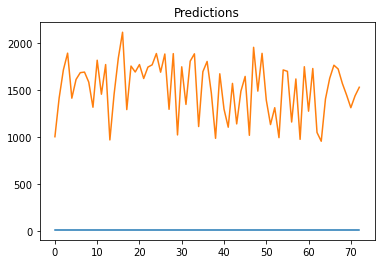

In [47]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [48]:
hybrid_lstm_rnn_gru_mse

2341497.9688298795

## Moving Average

### CNN LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2533131.0000 - root_mean_squared_error: 1591.5813

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 70s 7s/step - loss: 2533131.0000 - root_mean_squared_error: 1591.5813 - val_loss: 2504067.7500 - val_root_mean_squared_error: 1582.4247
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2531872.7500 - root_mean_squared_error: 1591.1859

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 2531872.7500 - root_mean_squared_error: 1591.1859 - val_loss: 2503059.2500 - val_root_mean_squared_error: 1582.1060
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2530930.0000 - root_mean_squared_error: 1590.8896

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2530930.0000 - root_mean_squared_error: 1590.8896 - val_loss: 2502208.2500 - val_root_mean_squared_error: 1581.8369
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2530106.7500 - root_mean_squared_error: 1590.6310

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2530106.7500 - root_mean_squared_error: 1590.6310 - val_loss: 2501424.7500 - val_root_mean_squared_error: 1581.5894
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2530773.7500 - root_mean_squared_error: 1590.8406

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2529333.5000 - root_mean_squared_error: 1590.3878 - val_loss: 2500628.7500 - val_root_mean_squared_error: 1581.3376
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2528511.0000 - root_mean_squared_error: 1590.1293

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2528511.0000 - root_mean_squared_error: 1590.1293 - val_loss: 2499773.7500 - val_root_mean_squared_error: 1581.0674
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2527606.7500 - root_mean_squared_error: 1589.8448

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2527606.7500 - root_mean_squared_error: 1589.8448 - val_loss: 2498903.0000 - val_root_mean_squared_error: 1580.7919
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2526829.7500 - root_mean_squared_error: 1589.6005

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 4s/step - loss: 2526829.7500 - root_mean_squared_error: 1589.6005 - val_loss: 2498183.7500 - val_root_mean_squared_error: 1580.5643
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2524916.5000 - root_mean_squared_error: 1588.9985

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2526150.2500 - root_mean_squared_error: 1589.3867 - val_loss: 2497525.7500 - val_root_mean_squared_error: 1580.3562
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2525501.7500 - root_mean_squared_error: 1589.1827

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2525501.7500 - root_mean_squared_error: 1589.1827 - val_loss: 2496896.7500 - val_root_mean_squared_error: 1580.1572
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2515294.5000 - root_mean_squared_error: 1585.9680

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 2524882.7500 - root_mean_squared_error: 1588.9879 - val_loss: 2496288.5000 - val_root_mean_squared_error: 1579.9647
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2524280.5000 - root_mean_squared_error: 1588.7985

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2524280.5000 - root_mean_squared_error: 1588.7985 - val_loss: 2495693.2500 - val_root_mean_squared_error: 1579.7764
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2523688.5000 - root_mean_squared_error: 1588.6122

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2523688.5000 - root_mean_squared_error: 1588.6122 - val_loss: 2495118.2500 - val_root_mean_squared_error: 1579.5944
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2523120.0000 - root_mean_squared_error: 1588.4332

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2523120.0000 - root_mean_squared_error: 1588.4332 - val_loss: 2494553.5000 - val_root_mean_squared_error: 1579.4156
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2522555.0000 - root_mean_squared_error: 1588.2554

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2522555.0000 - root_mean_squared_error: 1588.2554 - val_loss: 2493992.5000 - val_root_mean_squared_error: 1579.2379
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2521996.2500 - root_mean_squared_error: 1588.0795

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2521996.2500 - root_mean_squared_error: 1588.0795 - val_loss: 2493435.7500 - val_root_mean_squared_error: 1579.0616
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2521435.0000 - root_mean_squared_error: 1587.9027

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2521435.0000 - root_mean_squared_error: 1587.9027 - val_loss: 2492875.5000 - val_root_mean_squared_error: 1578.8843
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2516254.2500 - root_mean_squared_error: 1586.2705

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2520869.7500 - root_mean_squared_error: 1587.7247 - val_loss: 2492322.2500 - val_root_mean_squared_error: 1578.7090
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2520323.7500 - root_mean_squared_error: 1587.5527

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2520323.7500 - root_mean_squared_error: 1587.5527 - val_loss: 2491804.2500 - val_root_mean_squared_error: 1578.5449
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2519826.7500 - root_mean_squared_error: 1587.3962

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2519826.7500 - root_mean_squared_error: 1587.3962 - val_loss: 2491321.5000 - val_root_mean_squared_error: 1578.3921
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2519362.5000 - root_mean_squared_error: 1587.2500

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2519362.5000 - root_mean_squared_error: 1587.2500 - val_loss: 2490879.5000 - val_root_mean_squared_error: 1578.2521
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2518053.5000 - root_mean_squared_error: 1586.8375

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2518935.0000 - root_mean_squared_error: 1587.1154 - val_loss: 2490466.0000 - val_root_mean_squared_error: 1578.1211
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2518533.5000 - root_mean_squared_error: 1586.9888

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2518533.5000 - root_mean_squared_error: 1586.9888 - val_loss: 2490075.7500 - val_root_mean_squared_error: 1577.9974
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2518148.2500 - root_mean_squared_error: 1586.8674

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2518148.2500 - root_mean_squared_error: 1586.8674 - val_loss: 2489697.0000 - val_root_mean_squared_error: 1577.8773
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2517774.5000 - root_mean_squared_error: 1586.7496

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2517774.5000 - root_mean_squared_error: 1586.7496 - val_loss: 2489325.2500 - val_root_mean_squared_error: 1577.7595
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2505004.5000 - root_mean_squared_error: 1582.7206

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2517404.2500 - root_mean_squared_error: 1586.6329 - val_loss: 2488958.2500 - val_root_mean_squared_error: 1577.6433
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2517035.0000 - root_mean_squared_error: 1586.5166

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2517035.0000 - root_mean_squared_error: 1586.5166 - val_loss: 2488591.5000 - val_root_mean_squared_error: 1577.5270
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2516669.5000 - root_mean_squared_error: 1586.4015

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2516669.5000 - root_mean_squared_error: 1586.4015 - val_loss: 2488234.0000 - val_root_mean_squared_error: 1577.4137
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2521995.7500 - root_mean_squared_error: 1588.0792

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2516319.0000 - root_mean_squared_error: 1586.2910 - val_loss: 2487887.2500 - val_root_mean_squared_error: 1577.3038
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2515975.2500 - root_mean_squared_error: 1586.1826

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2515975.2500 - root_mean_squared_error: 1586.1826 - val_loss: 2487551.0000 - val_root_mean_squared_error: 1577.1971
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2515643.7500 - root_mean_squared_error: 1586.0781

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2515643.7500 - root_mean_squared_error: 1586.0781 - val_loss: 2487220.7500 - val_root_mean_squared_error: 1577.0924
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2510732.5000 - root_mean_squared_error: 1584.5291

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2515313.5000 - root_mean_squared_error: 1585.9740 - val_loss: 2486890.2500 - val_root_mean_squared_error: 1576.9877
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2514980.2500 - root_mean_squared_error: 1585.8689

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2514980.2500 - root_mean_squared_error: 1585.8689 - val_loss: 2486554.0000 - val_root_mean_squared_error: 1576.8811
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2513158.0000 - root_mean_squared_error: 1585.2943

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2514640.2500 - root_mean_squared_error: 1585.7617 - val_loss: 2486210.5000 - val_root_mean_squared_error: 1576.7722
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2514838.2500 - root_mean_squared_error: 1585.8241

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2514295.2500 - root_mean_squared_error: 1585.6530 - val_loss: 2485853.2500 - val_root_mean_squared_error: 1576.6589
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2509242.2500 - root_mean_squared_error: 1584.0588

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2513932.5000 - root_mean_squared_error: 1585.5386 - val_loss: 2485485.0000 - val_root_mean_squared_error: 1576.5421
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2502405.7500 - root_mean_squared_error: 1581.8994

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2513558.7500 - root_mean_squared_error: 1585.4207 - val_loss: 2485106.7500 - val_root_mean_squared_error: 1576.4221
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2513177.7500 - root_mean_squared_error: 1585.3005

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2513177.7500 - root_mean_squared_error: 1585.3005 - val_loss: 2484723.2500 - val_root_mean_squared_error: 1576.3005
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2512794.2500 - root_mean_squared_error: 1585.1796

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2512794.2500 - root_mean_squared_error: 1585.1796 - val_loss: 2484349.7500 - val_root_mean_squared_error: 1576.1820
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2512429.7500 - root_mean_squared_error: 1585.0646

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2512429.7500 - root_mean_squared_error: 1585.0646 - val_loss: 2484001.5000 - val_root_mean_squared_error: 1576.0715
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2512094.7500 - root_mean_squared_error: 1584.9589

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2512094.7500 - root_mean_squared_error: 1584.9589 - val_loss: 2483679.5000 - val_root_mean_squared_error: 1575.9694
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2511783.5000 - root_mean_squared_error: 1584.8607

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2511783.5000 - root_mean_squared_error: 1584.8607 - val_loss: 2483380.5000 - val_root_mean_squared_error: 1575.8745
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2512077.5000 - root_mean_squared_error: 1584.9535

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2511485.7500 - root_mean_squared_error: 1584.7667 - val_loss: 2483090.5000 - val_root_mean_squared_error: 1575.7825
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2501729.5000 - root_mean_squared_error: 1581.6857

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2511200.2500 - root_mean_squared_error: 1584.6768 - val_loss: 2482807.5000 - val_root_mean_squared_error: 1575.6927
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2512717.5000 - root_mean_squared_error: 1585.1554

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2510917.7500 - root_mean_squared_error: 1584.5875 - val_loss: 2482536.5000 - val_root_mean_squared_error: 1575.6067
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2510414.0000 - root_mean_squared_error: 1584.4286

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2510655.5000 - root_mean_squared_error: 1584.5048 - val_loss: 2482289.0000 - val_root_mean_squared_error: 1575.5282
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2510419.2500 - root_mean_squared_error: 1584.4303

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2510419.2500 - root_mean_squared_error: 1584.4303 - val_loss: 2482064.0000 - val_root_mean_squared_error: 1575.4568
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2510203.5000 - root_mean_squared_error: 1584.3622

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2510203.5000 - root_mean_squared_error: 1584.3622 - val_loss: 2481856.0000 - val_root_mean_squared_error: 1575.3909
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2495304.5000 - root_mean_squared_error: 1579.6533

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2510000.7500 - root_mean_squared_error: 1584.2982 - val_loss: 2481662.2500 - val_root_mean_squared_error: 1575.3292
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2509811.5000 - root_mean_squared_error: 1584.2384

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 7s 22ms/step


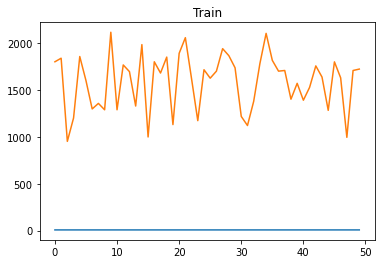

2/2 [==============================] - 2s 46ms/step


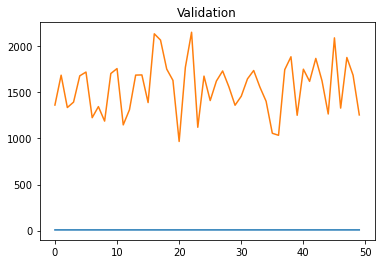

3/3 [==============================] - 0s 11ms/step


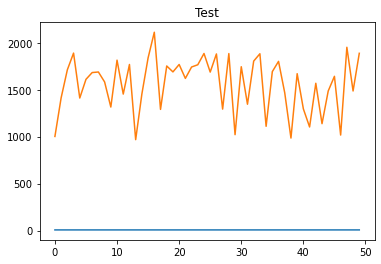

3/3 [==============================] - 1s 10ms/step


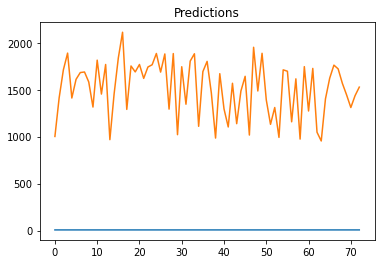

In [49]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [50]:
mavg_hybrid_cnn_lstm_mse

2357101.373702184

### RNN LSTM

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2500672.7500 - root_mean_squared_error: 1581.3516

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 48s 5s/step - loss: 2533795.0000 - root_mean_squared_error: 1591.7899 - val_loss: 2504877.7500 - val_root_mean_squared_error: 1582.6805
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2532632.0000 - root_mean_squared_error: 1591.4246

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2532632.0000 - root_mean_squared_error: 1591.4246 - val_loss: 2503769.0000 - val_root_mean_squared_error: 1582.3302
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2546332.0000 - root_mean_squared_error: 1595.7230

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2531552.5000 - root_mean_squared_error: 1591.0853 - val_loss: 2502742.0000 - val_root_mean_squared_error: 1582.0057
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2540113.5000 - root_mean_squared_error: 1593.7733

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2530550.2500 - root_mean_squared_error: 1590.7704 - val_loss: 2501780.7500 - val_root_mean_squared_error: 1581.7019
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2534636.2500 - root_mean_squared_error: 1592.0541

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2529605.0000 - root_mean_squared_error: 1590.4731 - val_loss: 2500866.7500 - val_root_mean_squared_error: 1581.4128
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2528705.5000 - root_mean_squared_error: 1590.1904

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2528705.5000 - root_mean_squared_error: 1590.1904 - val_loss: 2499989.0000 - val_root_mean_squared_error: 1581.1354
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2521123.2500 - root_mean_squared_error: 1587.8046

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2527839.2500 - root_mean_squared_error: 1589.9180 - val_loss: 2499135.5000 - val_root_mean_squared_error: 1580.8655
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2529344.7500 - root_mean_squared_error: 1590.3914

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2526993.0000 - root_mean_squared_error: 1589.6519 - val_loss: 2498306.2500 - val_root_mean_squared_error: 1580.6030
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2527818.5000 - root_mean_squared_error: 1589.9115

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2526169.7500 - root_mean_squared_error: 1589.3929 - val_loss: 2497498.7500 - val_root_mean_squared_error: 1580.3477
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2541527.2500 - root_mean_squared_error: 1594.2168

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2525373.7500 - root_mean_squared_error: 1589.1425 - val_loss: 2496706.7500 - val_root_mean_squared_error: 1580.0970
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2524588.2500 - root_mean_squared_error: 1588.8953

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2524588.2500 - root_mean_squared_error: 1588.8953 - val_loss: 2495931.7500 - val_root_mean_squared_error: 1579.8518
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2523821.5000 - root_mean_squared_error: 1588.6539

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2523821.5000 - root_mean_squared_error: 1588.6539 - val_loss: 2495174.0000 - val_root_mean_squared_error: 1579.6119
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2522232.0000 - root_mean_squared_error: 1588.1537

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2523069.0000 - root_mean_squared_error: 1588.4171 - val_loss: 2494424.0000 - val_root_mean_squared_error: 1579.3745
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2522324.7500 - root_mean_squared_error: 1588.1829

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2522324.7500 - root_mean_squared_error: 1588.1829 - val_loss: 2493679.5000 - val_root_mean_squared_error: 1579.1388
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2521580.0000 - root_mean_squared_error: 1587.9484

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2521580.0000 - root_mean_squared_error: 1587.9484 - val_loss: 2492930.5000 - val_root_mean_squared_error: 1578.9017
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2507615.2500 - root_mean_squared_error: 1583.5452

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2520837.7500 - root_mean_squared_error: 1587.7146 - val_loss: 2492175.0000 - val_root_mean_squared_error: 1578.6624
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2520077.7500 - root_mean_squared_error: 1587.4752

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2520077.7500 - root_mean_squared_error: 1587.4752 - val_loss: 2491419.5000 - val_root_mean_squared_error: 1578.4231
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2494756.7500 - root_mean_squared_error: 1579.4799

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2519325.5000 - root_mean_squared_error: 1587.2383 - val_loss: 2490672.7500 - val_root_mean_squared_error: 1578.1865
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2520435.2500 - root_mean_squared_error: 1587.5879

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2518588.2500 - root_mean_squared_error: 1587.0061 - val_loss: 2489944.2500 - val_root_mean_squared_error: 1577.9557
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2487024.7500 - root_mean_squared_error: 1577.0304

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2517875.7500 - root_mean_squared_error: 1586.7816 - val_loss: 2489260.7500 - val_root_mean_squared_error: 1577.7391
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2506335.5000 - root_mean_squared_error: 1583.1410

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2517212.0000 - root_mean_squared_error: 1586.5724 - val_loss: 2488623.5000 - val_root_mean_squared_error: 1577.5371
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2527164.5000 - root_mean_squared_error: 1589.7058

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2516593.7500 - root_mean_squared_error: 1586.3776 - val_loss: 2488033.7500 - val_root_mean_squared_error: 1577.3502
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 2523694.7500 - root_mean_squared_error: 1588.6141

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2516025.0000 - root_mean_squared_error: 1586.1982 - val_loss: 2487493.7500 - val_root_mean_squared_error: 1577.1791
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2512648.0000 - root_mean_squared_error: 1585.1334

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2515503.5000 - root_mean_squared_error: 1586.0339 - val_loss: 2486994.5000 - val_root_mean_squared_error: 1577.0208
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2489364.7500 - root_mean_squared_error: 1577.7721

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2515018.0000 - root_mean_squared_error: 1585.8809 - val_loss: 2486532.5000 - val_root_mean_squared_error: 1576.8743
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2549584.7500 - root_mean_squared_error: 1596.7419

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2514571.2500 - root_mean_squared_error: 1585.7400 - val_loss: 2486099.2500 - val_root_mean_squared_error: 1576.7369
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2512522.7500 - root_mean_squared_error: 1585.0939

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2514149.2500 - root_mean_squared_error: 1585.6069 - val_loss: 2485697.0000 - val_root_mean_squared_error: 1576.6094
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2513756.7500 - root_mean_squared_error: 1585.4832

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2513756.7500 - root_mean_squared_error: 1585.4832 - val_loss: 2485320.7500 - val_root_mean_squared_error: 1576.4900
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2513389.2500 - root_mean_squared_error: 1585.3672

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2513389.2500 - root_mean_squared_error: 1585.3672 - val_loss: 2484967.2500 - val_root_mean_squared_error: 1576.3779
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2533510.0000 - root_mean_squared_error: 1591.7003

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2513043.7500 - root_mean_squared_error: 1585.2583 - val_loss: 2484630.2500 - val_root_mean_squared_error: 1576.2710
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2512715.0000 - root_mean_squared_error: 1585.1545

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 2s/step - loss: 2512715.0000 - root_mean_squared_error: 1585.1545 - val_loss: 2484311.7500 - val_root_mean_squared_error: 1576.1699
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 2507330.2500 - root_mean_squared_error: 1583.4552

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2512400.0000 - root_mean_squared_error: 1585.0552 - val_loss: 2484003.7500 - val_root_mean_squared_error: 1576.0723
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2507154.7500 - root_mean_squared_error: 1583.3998

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2512096.2500 - root_mean_squared_error: 1584.9594 - val_loss: 2483703.5000 - val_root_mean_squared_error: 1575.9771
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2515331.5000 - root_mean_squared_error: 1585.9796

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2511801.0000 - root_mean_squared_error: 1584.8662 - val_loss: 2483410.5000 - val_root_mean_squared_error: 1575.8840
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2509550.0000 - root_mean_squared_error: 1584.1559

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2511510.7500 - root_mean_squared_error: 1584.7747 - val_loss: 2483126.0000 - val_root_mean_squared_error: 1575.7938
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2511227.0000 - root_mean_squared_error: 1584.6852

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 2s/step - loss: 2511227.0000 - root_mean_squared_error: 1584.6852 - val_loss: 2482846.2500 - val_root_mean_squared_error: 1575.7050
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2503938.5000 - root_mean_squared_error: 1582.3838

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2510948.2500 - root_mean_squared_error: 1584.5972 - val_loss: 2482570.5000 - val_root_mean_squared_error: 1575.6176
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2510675.7500 - root_mean_squared_error: 1584.5112

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2510675.7500 - root_mean_squared_error: 1584.5112 - val_loss: 2482297.0000 - val_root_mean_squared_error: 1575.5308
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2510405.2500 - root_mean_squared_error: 1584.4259

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2510405.2500 - root_mean_squared_error: 1584.4259 - val_loss: 2482028.2500 - val_root_mean_squared_error: 1575.4454
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2510137.7500 - root_mean_squared_error: 1584.3414

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2510137.7500 - root_mean_squared_error: 1584.3414 - val_loss: 2481763.5000 - val_root_mean_squared_error: 1575.3613
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2509874.7500 - root_mean_squared_error: 1584.2584

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2509874.7500 - root_mean_squared_error: 1584.2584 - val_loss: 2481503.0000 - val_root_mean_squared_error: 1575.2787
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2506684.7500 - root_mean_squared_error: 1583.2513

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2509617.5000 - root_mean_squared_error: 1584.1772 - val_loss: 2481248.2500 - val_root_mean_squared_error: 1575.1979
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2509364.0000 - root_mean_squared_error: 1584.0972

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2509364.0000 - root_mean_squared_error: 1584.0972 - val_loss: 2480999.2500 - val_root_mean_squared_error: 1575.1188
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2504003.2500 - root_mean_squared_error: 1582.4043

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2509117.2500 - root_mean_squared_error: 1584.0193 - val_loss: 2480755.7500 - val_root_mean_squared_error: 1575.0415
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2508877.7500 - root_mean_squared_error: 1583.9437

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2508877.7500 - root_mean_squared_error: 1583.9437 - val_loss: 2480522.0000 - val_root_mean_squared_error: 1574.9673
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2484797.2500 - root_mean_squared_error: 1576.3240

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2508648.2500 - root_mean_squared_error: 1583.8713 - val_loss: 2480300.2500 - val_root_mean_squared_error: 1574.8969
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2494102.5000 - root_mean_squared_error: 1579.2728

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2508430.7500 - root_mean_squared_error: 1583.8026 - val_loss: 2480088.2500 - val_root_mean_squared_error: 1574.8296
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2508222.0000 - root_mean_squared_error: 1583.7367

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2508222.0000 - root_mean_squared_error: 1583.7367 - val_loss: 2479886.2500 - val_root_mean_squared_error: 1574.7655
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2508163.5000 - root_mean_squared_error: 1583.7183

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2508024.2500 - root_mean_squared_error: 1583.6743 - val_loss: 2479694.2500 - val_root_mean_squared_error: 1574.7045
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2528974.2500 - root_mean_squared_error: 1590.2749

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 3s 43ms/step


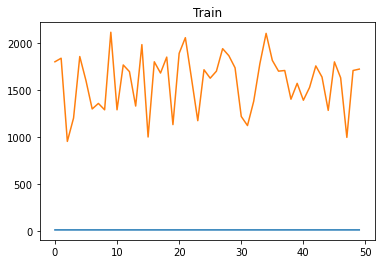

2/2 [==============================] - 2s 22ms/step


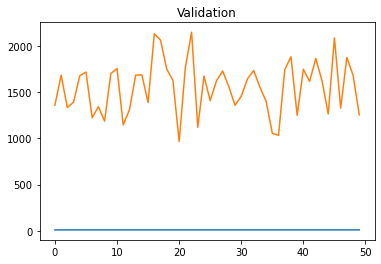

3/3 [==============================] - 0s 16ms/step


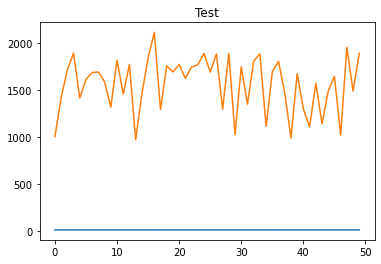

3/3 [==============================] - 0s 11ms/step


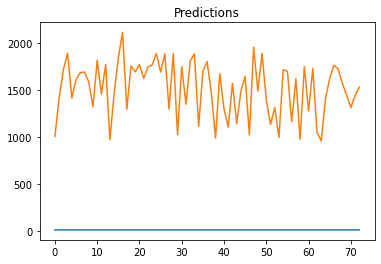

In [51]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [52]:
mavg_hybrid_rnn_lstm_mse

2355187.778914581

### RNN GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2530758.7500 - root_mean_squared_error: 1590.8358

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 61s 6s/step - loss: 2530758.7500 - root_mean_squared_error: 1590.8358 - val_loss: 2501984.0000 - val_root_mean_squared_error: 1581.7661
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2529822.2500 - root_mean_squared_error: 1590.5415

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2529822.2500 - root_mean_squared_error: 1590.5415 - val_loss: 2501063.2500 - val_root_mean_squared_error: 1581.4750
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2540225.5000 - root_mean_squared_error: 1593.8085

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2528903.7500 - root_mean_squared_error: 1590.2527 - val_loss: 2500164.5000 - val_root_mean_squared_error: 1581.1908
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2528000.5000 - root_mean_squared_error: 1589.9688

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2528000.5000 - root_mean_squared_error: 1589.9688 - val_loss: 2499285.0000 - val_root_mean_squared_error: 1580.9127
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2516820.5000 - root_mean_squared_error: 1586.4490

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2527118.7500 - root_mean_squared_error: 1589.6914 - val_loss: 2498404.5000 - val_root_mean_squared_error: 1580.6342
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2526243.7500 - root_mean_squared_error: 1589.4161

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2526243.7500 - root_mean_squared_error: 1589.4161 - val_loss: 2497530.0000 - val_root_mean_squared_error: 1580.3575
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2525376.7500 - root_mean_squared_error: 1589.1434

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2525376.7500 - root_mean_squared_error: 1589.1434 - val_loss: 2496678.0000 - val_root_mean_squared_error: 1580.0879
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2524532.2500 - root_mean_squared_error: 1588.8777

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2524532.2500 - root_mean_squared_error: 1588.8777 - val_loss: 2495848.2500 - val_root_mean_squared_error: 1579.8254
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2523716.7500 - root_mean_squared_error: 1588.6210

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2523716.7500 - root_mean_squared_error: 1588.6210 - val_loss: 2495061.0000 - val_root_mean_squared_error: 1579.5762
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2508596.0000 - root_mean_squared_error: 1583.8547

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2522941.5000 - root_mean_squared_error: 1588.3770 - val_loss: 2494319.5000 - val_root_mean_squared_error: 1579.3414
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2527988.2500 - root_mean_squared_error: 1589.9648

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2522220.7500 - root_mean_squared_error: 1588.1501 - val_loss: 2493612.2500 - val_root_mean_squared_error: 1579.1176
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2521529.5000 - root_mean_squared_error: 1587.9325

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2521529.5000 - root_mean_squared_error: 1587.9325 - val_loss: 2492950.5000 - val_root_mean_squared_error: 1578.9080
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2529212.0000 - root_mean_squared_error: 1590.3496

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2520885.0000 - root_mean_squared_error: 1587.7295 - val_loss: 2492322.2500 - val_root_mean_squared_error: 1578.7090
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2520269.2500 - root_mean_squared_error: 1587.5356

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2520269.2500 - root_mean_squared_error: 1587.5356 - val_loss: 2491727.5000 - val_root_mean_squared_error: 1578.5206
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2520478.7500 - root_mean_squared_error: 1587.6016

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2519685.7500 - root_mean_squared_error: 1587.3518 - val_loss: 2491160.5000 - val_root_mean_squared_error: 1578.3411
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 2525207.0000 - root_mean_squared_error: 1589.0900

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2519130.0000 - root_mean_squared_error: 1587.1768 - val_loss: 2490619.5000 - val_root_mean_squared_error: 1578.1698
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2560803.2500 - root_mean_squared_error: 1600.2510

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2518602.2500 - root_mean_squared_error: 1587.0105 - val_loss: 2490106.0000 - val_root_mean_squared_error: 1578.0070
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2518099.2500 - root_mean_squared_error: 1586.8521

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 34s 4s/step - loss: 2518099.2500 - root_mean_squared_error: 1586.8521 - val_loss: 2489618.7500 - val_root_mean_squared_error: 1577.8525
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2534861.2500 - root_mean_squared_error: 1592.1248

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2517624.0000 - root_mean_squared_error: 1586.7023 - val_loss: 2489161.5000 - val_root_mean_squared_error: 1577.7076
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2517179.7500 - root_mean_squared_error: 1586.5623

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2517179.7500 - root_mean_squared_error: 1586.5623 - val_loss: 2488732.7500 - val_root_mean_squared_error: 1577.5718
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2584662.7500 - root_mean_squared_error: 1607.6886

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2516763.7500 - root_mean_squared_error: 1586.4312 - val_loss: 2488325.7500 - val_root_mean_squared_error: 1577.4427
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2516368.0000 - root_mean_squared_error: 1586.3064

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 18s 2s/step - loss: 2516368.0000 - root_mean_squared_error: 1586.3064 - val_loss: 2487946.5000 - val_root_mean_squared_error: 1577.3226
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2512113.5000 - root_mean_squared_error: 1584.9648

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2515997.2500 - root_mean_squared_error: 1586.1896 - val_loss: 2487589.0000 - val_root_mean_squared_error: 1577.2094
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2515650.5000 - root_mean_squared_error: 1586.0802

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2515650.5000 - root_mean_squared_error: 1586.0802 - val_loss: 2487253.2500 - val_root_mean_squared_error: 1577.1028
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2507559.2500 - root_mean_squared_error: 1583.5275

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2515324.2500 - root_mean_squared_error: 1585.9774 - val_loss: 2486938.7500 - val_root_mean_squared_error: 1577.0031
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2515017.0000 - root_mean_squared_error: 1585.8805

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2515017.0000 - root_mean_squared_error: 1585.8805 - val_loss: 2486644.5000 - val_root_mean_squared_error: 1576.9098
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2537973.2500 - root_mean_squared_error: 1593.1018

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2514733.5000 - root_mean_squared_error: 1585.7911 - val_loss: 2486368.0000 - val_root_mean_squared_error: 1576.8221
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2514465.7500 - root_mean_squared_error: 1585.7067

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2514465.7500 - root_mean_squared_error: 1585.7067 - val_loss: 2486112.5000 - val_root_mean_squared_error: 1576.7410
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2497858.7500 - root_mean_squared_error: 1580.4615

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2514215.5000 - root_mean_squared_error: 1585.6278 - val_loss: 2485868.5000 - val_root_mean_squared_error: 1576.6637
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2508220.5000 - root_mean_squared_error: 1583.7362

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2513977.5000 - root_mean_squared_error: 1585.5527 - val_loss: 2485640.7500 - val_root_mean_squared_error: 1576.5916
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2498730.2500 - root_mean_squared_error: 1580.7373

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2513756.0000 - root_mean_squared_error: 1585.4829 - val_loss: 2485424.0000 - val_root_mean_squared_error: 1576.5227
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2513545.5000 - root_mean_squared_error: 1585.4165

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2513545.5000 - root_mean_squared_error: 1585.4165 - val_loss: 2485217.0000 - val_root_mean_squared_error: 1576.4572
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2523780.2500 - root_mean_squared_error: 1588.6410

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2513344.7500 - root_mean_squared_error: 1585.3531 - val_loss: 2485022.5000 - val_root_mean_squared_error: 1576.3954
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2524995.5000 - root_mean_squared_error: 1589.0234

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2513156.0000 - root_mean_squared_error: 1585.2937 - val_loss: 2484837.5000 - val_root_mean_squared_error: 1576.3368
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2512974.0000 - root_mean_squared_error: 1585.2362

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2512974.0000 - root_mean_squared_error: 1585.2362 - val_loss: 2484660.2500 - val_root_mean_squared_error: 1576.2805
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2510964.2500 - root_mean_squared_error: 1584.6023

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2512799.0000 - root_mean_squared_error: 1585.1810 - val_loss: 2484489.0000 - val_root_mean_squared_error: 1576.2262
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2512631.2500 - root_mean_squared_error: 1585.1282

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2512631.2500 - root_mean_squared_error: 1585.1282 - val_loss: 2484323.5000 - val_root_mean_squared_error: 1576.1737
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2512469.2500 - root_mean_squared_error: 1585.0770

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2512469.2500 - root_mean_squared_error: 1585.0770 - val_loss: 2484163.7500 - val_root_mean_squared_error: 1576.1230
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2510801.2500 - root_mean_squared_error: 1584.5508

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2512312.5000 - root_mean_squared_error: 1585.0276 - val_loss: 2484008.5000 - val_root_mean_squared_error: 1576.0737
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2509612.2500 - root_mean_squared_error: 1584.1755

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2512159.5000 - root_mean_squared_error: 1584.9794 - val_loss: 2483858.0000 - val_root_mean_squared_error: 1576.0260
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2512010.5000 - root_mean_squared_error: 1584.9324

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2512010.5000 - root_mean_squared_error: 1584.9324 - val_loss: 2483711.5000 - val_root_mean_squared_error: 1575.9795
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2511866.2500 - root_mean_squared_error: 1584.8868

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2511866.2500 - root_mean_squared_error: 1584.8868 - val_loss: 2483568.5000 - val_root_mean_squared_error: 1575.9342
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2514785.5000 - root_mean_squared_error: 1585.8075

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2511725.2500 - root_mean_squared_error: 1584.8423 - val_loss: 2483428.5000 - val_root_mean_squared_error: 1575.8898
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2511588.5000 - root_mean_squared_error: 1584.7992

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2511588.5000 - root_mean_squared_error: 1584.7992 - val_loss: 2483291.5000 - val_root_mean_squared_error: 1575.8463
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2511452.2500 - root_mean_squared_error: 1584.7562

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2511452.2500 - root_mean_squared_error: 1584.7562 - val_loss: 2483159.7500 - val_root_mean_squared_error: 1575.8044
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2511321.7500 - root_mean_squared_error: 1584.7151

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2511321.7500 - root_mean_squared_error: 1584.7151 - val_loss: 2483028.7500 - val_root_mean_squared_error: 1575.7628
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2502924.5000 - root_mean_squared_error: 1582.0634

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2511192.2500 - root_mean_squared_error: 1584.6742 - val_loss: 2482900.2500 - val_root_mean_squared_error: 1575.7222
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 2503203.7500 - root_mean_squared_error: 1582.1516

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2511064.7500 - root_mean_squared_error: 1584.6339 - val_loss: 2482773.5000 - val_root_mean_squared_error: 1575.6819
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2510940.0000 - root_mean_squared_error: 1584.5946

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2510940.0000 - root_mean_squared_error: 1584.5946 - val_loss: 2482649.5000 - val_root_mean_squared_error: 1575.6426
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2510816.7500 - root_mean_squared_error: 1584.5557

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 4s 28ms/step


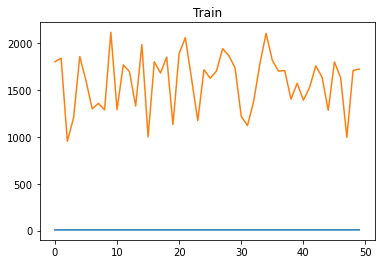

2/2 [==============================] - 6s 27ms/step


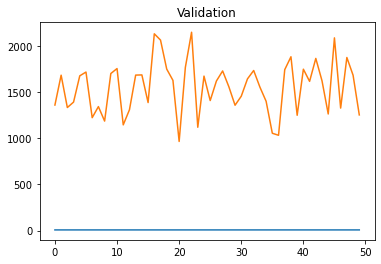

3/3 [==============================] - 0s 15ms/step


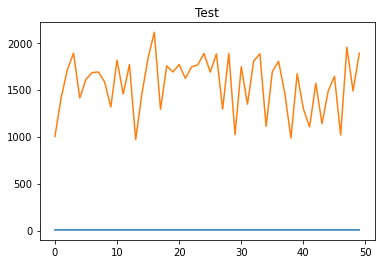

3/3 [==============================] - 0s 10ms/step


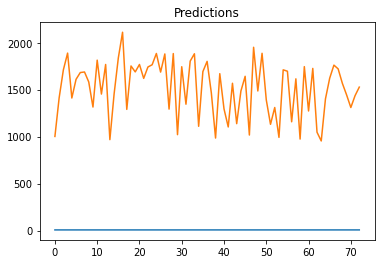

In [53]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [54]:
mavg_hybrid_rnn_gru_mse

2358123.1093667876

### CNN GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2534609.2500 - root_mean_squared_error: 1592.0457

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 69s 5s/step - loss: 2534609.2500 - root_mean_squared_error: 1592.0457 - val_loss: 2504397.5000 - val_root_mean_squared_error: 1582.5288
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2531351.0000 - root_mean_squared_error: 1591.0220

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2531351.0000 - root_mean_squared_error: 1591.0220 - val_loss: 2501235.2500 - val_root_mean_squared_error: 1581.5294
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2528253.0000 - root_mean_squared_error: 1590.0481

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2528253.0000 - root_mean_squared_error: 1590.0481 - val_loss: 2498463.7500 - val_root_mean_squared_error: 1580.6530
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2525646.5000 - root_mean_squared_error: 1589.2283

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 2525646.5000 - root_mean_squared_error: 1589.2283 - val_loss: 2496114.2500 - val_root_mean_squared_error: 1579.9095
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2523498.5000 - root_mean_squared_error: 1588.5524

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2523498.5000 - root_mean_squared_error: 1588.5524 - val_loss: 2494189.0000 - val_root_mean_squared_error: 1579.3002
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2521758.0000 - root_mean_squared_error: 1588.0044

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 39s 5s/step - loss: 2521758.0000 - root_mean_squared_error: 1588.0044 - val_loss: 2492772.2500 - val_root_mean_squared_error: 1578.8516
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2529512.7500 - root_mean_squared_error: 1590.4442

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 39s 5s/step - loss: 2520528.7500 - root_mean_squared_error: 1587.6173 - val_loss: 2491777.7500 - val_root_mean_squared_error: 1578.5366
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2518452.2500 - root_mean_squared_error: 1586.9633

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2519645.5000 - root_mean_squared_error: 1587.3391 - val_loss: 2491002.0000 - val_root_mean_squared_error: 1578.2909
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2518924.2500 - root_mean_squared_error: 1587.1119

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 2518924.2500 - root_mean_squared_error: 1587.1119 - val_loss: 2490323.2500 - val_root_mean_squared_error: 1578.0758
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2518287.2500 - root_mean_squared_error: 1586.9113

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2518287.2500 - root_mean_squared_error: 1586.9113 - val_loss: 2489726.2500 - val_root_mean_squared_error: 1577.8866
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2517689.2500 - root_mean_squared_error: 1586.7228

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2517689.2500 - root_mean_squared_error: 1586.7228 - val_loss: 2489139.7500 - val_root_mean_squared_error: 1577.7008
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2517168.7500 - root_mean_squared_error: 1586.5587

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 2517168.7500 - root_mean_squared_error: 1586.5587 - val_loss: 2488717.5000 - val_root_mean_squared_error: 1577.5670
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2516787.2500 - root_mean_squared_error: 1586.4386

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2516787.2500 - root_mean_squared_error: 1586.4386 - val_loss: 2488364.5000 - val_root_mean_squared_error: 1577.4551
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2516447.2500 - root_mean_squared_error: 1586.3314

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2516447.2500 - root_mean_squared_error: 1586.3314 - val_loss: 2488034.7500 - val_root_mean_squared_error: 1577.3506
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2516124.2500 - root_mean_squared_error: 1586.2296

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2516124.2500 - root_mean_squared_error: 1586.2296 - val_loss: 2487719.0000 - val_root_mean_squared_error: 1577.2505
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2515813.2500 - root_mean_squared_error: 1586.1316

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2515813.2500 - root_mean_squared_error: 1586.1316 - val_loss: 2487409.7500 - val_root_mean_squared_error: 1577.1525
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2515507.7500 - root_mean_squared_error: 1586.0353

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2515507.7500 - root_mean_squared_error: 1586.0353 - val_loss: 2487109.7500 - val_root_mean_squared_error: 1577.0573
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2516194.7500 - root_mean_squared_error: 1586.2518

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2515207.5000 - root_mean_squared_error: 1585.9406 - val_loss: 2486813.0000 - val_root_mean_squared_error: 1576.9633
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2523415.2500 - root_mean_squared_error: 1588.5261

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2514913.2500 - root_mean_squared_error: 1585.8478 - val_loss: 2486512.5000 - val_root_mean_squared_error: 1576.8679
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2514606.7500 - root_mean_squared_error: 1585.7512

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2514606.7500 - root_mean_squared_error: 1585.7512 - val_loss: 2486210.7500 - val_root_mean_squared_error: 1576.7722
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2514312.5000 - root_mean_squared_error: 1585.6583

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2514312.5000 - root_mean_squared_error: 1585.6583 - val_loss: 2485943.7500 - val_root_mean_squared_error: 1576.6876
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2514058.5000 - root_mean_squared_error: 1585.5782

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2514058.5000 - root_mean_squared_error: 1585.5782 - val_loss: 2485711.5000 - val_root_mean_squared_error: 1576.6139
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2513831.2500 - root_mean_squared_error: 1585.5066

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 2513831.2500 - root_mean_squared_error: 1585.5066 - val_loss: 2485496.2500 - val_root_mean_squared_error: 1576.5457
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2520668.5000 - root_mean_squared_error: 1587.6614

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2513622.0000 - root_mean_squared_error: 1585.4407 - val_loss: 2485296.0000 - val_root_mean_squared_error: 1576.4822
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2519043.7500 - root_mean_squared_error: 1587.1495

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2513425.2500 - root_mean_squared_error: 1585.3785 - val_loss: 2485105.7500 - val_root_mean_squared_error: 1576.4219
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2513241.2500 - root_mean_squared_error: 1585.3206

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2513241.2500 - root_mean_squared_error: 1585.3206 - val_loss: 2484927.7500 - val_root_mean_squared_error: 1576.3654
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2513064.7500 - root_mean_squared_error: 1585.2649

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2513064.7500 - root_mean_squared_error: 1585.2649 - val_loss: 2484757.7500 - val_root_mean_squared_error: 1576.3114
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2512897.5000 - root_mean_squared_error: 1585.2122

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 2512897.5000 - root_mean_squared_error: 1585.2122 - val_loss: 2484591.0000 - val_root_mean_squared_error: 1576.2585
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2512735.0000 - root_mean_squared_error: 1585.1609

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2512735.0000 - root_mean_squared_error: 1585.1609 - val_loss: 2484433.5000 - val_root_mean_squared_error: 1576.2086
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2510343.7500 - root_mean_squared_error: 1584.4065

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2512578.7500 - root_mean_squared_error: 1585.1116 - val_loss: 2484280.2500 - val_root_mean_squared_error: 1576.1599
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2512428.7500 - root_mean_squared_error: 1585.0643

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2512428.7500 - root_mean_squared_error: 1585.0643 - val_loss: 2484133.0000 - val_root_mean_squared_error: 1576.1133
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2502437.2500 - root_mean_squared_error: 1581.9094

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2512282.7500 - root_mean_squared_error: 1585.0182 - val_loss: 2483986.7500 - val_root_mean_squared_error: 1576.0669
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2512139.0000 - root_mean_squared_error: 1584.9729

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2512139.0000 - root_mean_squared_error: 1584.9729 - val_loss: 2483840.0000 - val_root_mean_squared_error: 1576.0203
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2496044.5000 - root_mean_squared_error: 1579.8875

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2511991.5000 - root_mean_squared_error: 1584.9264 - val_loss: 2483694.2500 - val_root_mean_squared_error: 1575.9741
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2511851.0000 - root_mean_squared_error: 1584.8820

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2511851.0000 - root_mean_squared_error: 1584.8820 - val_loss: 2483559.7500 - val_root_mean_squared_error: 1575.9314
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2503733.5000 - root_mean_squared_error: 1582.3190

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2511718.0000 - root_mean_squared_error: 1584.8401 - val_loss: 2483427.7500 - val_root_mean_squared_error: 1575.8895
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2501261.5000 - root_mean_squared_error: 1581.5377

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2511588.2500 - root_mean_squared_error: 1584.7991 - val_loss: 2483300.5000 - val_root_mean_squared_error: 1575.8491
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2511463.2500 - root_mean_squared_error: 1584.7596

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2511463.2500 - root_mean_squared_error: 1584.7596 - val_loss: 2483175.2500 - val_root_mean_squared_error: 1575.8094
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2511339.2500 - root_mean_squared_error: 1584.7206

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2511339.2500 - root_mean_squared_error: 1584.7206 - val_loss: 2483053.7500 - val_root_mean_squared_error: 1575.7709
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2523720.7500 - root_mean_squared_error: 1588.6223

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2511220.0000 - root_mean_squared_error: 1584.6830 - val_loss: 2482935.7500 - val_root_mean_squared_error: 1575.7334
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2511102.2500 - root_mean_squared_error: 1584.6458

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2511102.2500 - root_mean_squared_error: 1584.6458 - val_loss: 2482819.5000 - val_root_mean_squared_error: 1575.6965
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2510987.5000 - root_mean_squared_error: 1584.6096

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2510987.5000 - root_mean_squared_error: 1584.6096 - val_loss: 2482704.0000 - val_root_mean_squared_error: 1575.6599
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2510873.5000 - root_mean_squared_error: 1584.5736

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2510873.5000 - root_mean_squared_error: 1584.5736 - val_loss: 2482589.7500 - val_root_mean_squared_error: 1575.6235
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2510760.0000 - root_mean_squared_error: 1584.5378

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2510760.0000 - root_mean_squared_error: 1584.5378 - val_loss: 2482477.2500 - val_root_mean_squared_error: 1575.5879
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2518043.2500 - root_mean_squared_error: 1586.8344

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2510648.0000 - root_mean_squared_error: 1584.5024 - val_loss: 2482365.7500 - val_root_mean_squared_error: 1575.5525
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2510538.2500 - root_mean_squared_error: 1584.4678

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 2510538.2500 - root_mean_squared_error: 1584.4678 - val_loss: 2482255.5000 - val_root_mean_squared_error: 1575.5176
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2526360.0000 - root_mean_squared_error: 1589.4528

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2510429.2500 - root_mean_squared_error: 1584.4335 - val_loss: 2482149.0000 - val_root_mean_squared_error: 1575.4838
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2510323.7500 - root_mean_squared_error: 1584.4001

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2510323.7500 - root_mean_squared_error: 1584.4001 - val_loss: 2482043.2500 - val_root_mean_squared_error: 1575.4502
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2510184.7500 - root_mean_squared_error: 1584.3562

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2510217.5000 - root_mean_squared_error: 1584.3666 - val_loss: 2481937.5000 - val_root_mean_squared_error: 1575.4166
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2510113.0000 - root_mean_squared_error: 1584.3336

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 8s 32ms/step


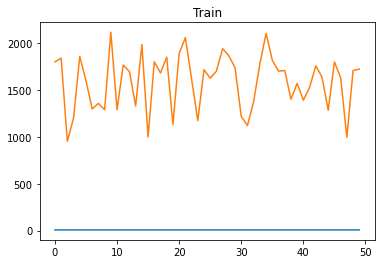

2/2 [==============================] - 5s 25ms/step


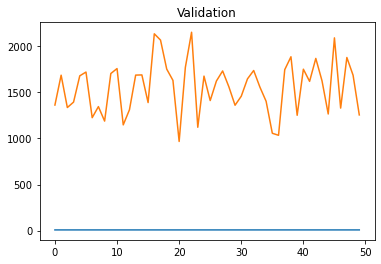

3/3 [==============================] - 3s 1s/step


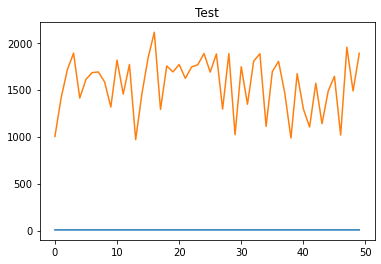

3/3 [==============================] - 0s 12ms/step


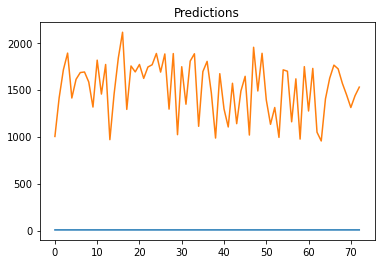

In [55]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [56]:
mavg_hybrid_cnn_gru_mse

2357446.863710969

### CNN RNN GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2534646.0000 - root_mean_squared_error: 1592.0571

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 50s 5s/step - loss: 2534646.0000 - root_mean_squared_error: 1592.0571 - val_loss: 2504712.7500 - val_root_mean_squared_error: 1582.6284
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2531812.0000 - root_mean_squared_error: 1591.1669

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2531812.0000 - root_mean_squared_error: 1591.1669 - val_loss: 2501871.7500 - val_root_mean_squared_error: 1581.7306
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2529047.2500 - root_mean_squared_error: 1590.2979

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2529047.2500 - root_mean_squared_error: 1590.2979 - val_loss: 2499299.7500 - val_root_mean_squared_error: 1580.9174
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2526597.5000 - root_mean_squared_error: 1589.5275

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 18s 2s/step - loss: 2526597.5000 - root_mean_squared_error: 1589.5275 - val_loss: 2496990.2500 - val_root_mean_squared_error: 1580.1868
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2524374.7500 - root_mean_squared_error: 1588.8281

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2524374.7500 - root_mean_squared_error: 1588.8281 - val_loss: 2495013.0000 - val_root_mean_squared_error: 1579.5610
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2522921.2500 - root_mean_squared_error: 1588.3706

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2522510.7500 - root_mean_squared_error: 1588.2415 - val_loss: 2493228.5000 - val_root_mean_squared_error: 1578.9961
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2529442.2500 - root_mean_squared_error: 1590.4220

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2520660.7500 - root_mean_squared_error: 1587.6589 - val_loss: 2491326.2500 - val_root_mean_squared_error: 1578.3936
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2504978.5000 - root_mean_squared_error: 1582.7124

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2518914.0000 - root_mean_squared_error: 1587.1086 - val_loss: 2489840.2500 - val_root_mean_squared_error: 1577.9227
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2517571.7500 - root_mean_squared_error: 1586.6858

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2517571.7500 - root_mean_squared_error: 1586.6858 - val_loss: 2488648.7500 - val_root_mean_squared_error: 1577.5452
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2511969.2500 - root_mean_squared_error: 1584.9193

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2516438.2500 - root_mean_squared_error: 1586.3285 - val_loss: 2487559.2500 - val_root_mean_squared_error: 1577.1998
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2509152.5000 - root_mean_squared_error: 1584.0305

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2515345.2500 - root_mean_squared_error: 1585.9840 - val_loss: 2486490.2500 - val_root_mean_squared_error: 1576.8608
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2514323.2500 - root_mean_squared_error: 1585.6617

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2514323.2500 - root_mean_squared_error: 1585.6617 - val_loss: 2485549.2500 - val_root_mean_squared_error: 1576.5625
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2508472.0000 - root_mean_squared_error: 1583.8157

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2513409.0000 - root_mean_squared_error: 1585.3734 - val_loss: 2484664.2500 - val_root_mean_squared_error: 1576.2819
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2512533.7500 - root_mean_squared_error: 1585.0974

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2512533.7500 - root_mean_squared_error: 1585.0974 - val_loss: 2483827.2500 - val_root_mean_squared_error: 1576.0162
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2502214.5000 - root_mean_squared_error: 1581.8390

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2511704.0000 - root_mean_squared_error: 1584.8357 - val_loss: 2483023.7500 - val_root_mean_squared_error: 1575.7614
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2505756.2500 - root_mean_squared_error: 1582.9581

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2510898.5000 - root_mean_squared_error: 1584.5815 - val_loss: 2482227.2500 - val_root_mean_squared_error: 1575.5085
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2510106.7500 - root_mean_squared_error: 1584.3317

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2510106.7500 - root_mean_squared_error: 1584.3317 - val_loss: 2481428.5000 - val_root_mean_squared_error: 1575.2550
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2518009.5000 - root_mean_squared_error: 1586.8237

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2509301.0000 - root_mean_squared_error: 1584.0774 - val_loss: 2480598.0000 - val_root_mean_squared_error: 1574.9915
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2515486.7500 - root_mean_squared_error: 1586.0286

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2508458.0000 - root_mean_squared_error: 1583.8113 - val_loss: 2479794.7500 - val_root_mean_squared_error: 1574.7365
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2507680.7500 - root_mean_squared_error: 1583.5658

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2507680.7500 - root_mean_squared_error: 1583.5658 - val_loss: 2479008.7500 - val_root_mean_squared_error: 1574.4867
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2506904.0000 - root_mean_squared_error: 1583.3206

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2506904.0000 - root_mean_squared_error: 1583.3206 - val_loss: 2478235.7500 - val_root_mean_squared_error: 1574.2413
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2508034.2500 - root_mean_squared_error: 1583.6775

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2506141.0000 - root_mean_squared_error: 1583.0796 - val_loss: 2477503.5000 - val_root_mean_squared_error: 1574.0088
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2505434.0000 - root_mean_squared_error: 1582.8563

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2505434.0000 - root_mean_squared_error: 1582.8563 - val_loss: 2476830.2500 - val_root_mean_squared_error: 1573.7948
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2504773.0000 - root_mean_squared_error: 1582.6475

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2504773.0000 - root_mean_squared_error: 1582.6475 - val_loss: 2476186.2500 - val_root_mean_squared_error: 1573.5902
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2504140.5000 - root_mean_squared_error: 1582.4476

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2504140.5000 - root_mean_squared_error: 1582.4476 - val_loss: 2475568.5000 - val_root_mean_squared_error: 1573.3939
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2503534.7500 - root_mean_squared_error: 1582.2562

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2503534.7500 - root_mean_squared_error: 1582.2562 - val_loss: 2474975.0000 - val_root_mean_squared_error: 1573.2053
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2509573.2500 - root_mean_squared_error: 1584.1632

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2502951.2500 - root_mean_squared_error: 1582.0718 - val_loss: 2474404.5000 - val_root_mean_squared_error: 1573.0240
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2502393.2500 - root_mean_squared_error: 1581.8955

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2502393.2500 - root_mean_squared_error: 1581.8955 - val_loss: 2473858.7500 - val_root_mean_squared_error: 1572.8505
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2512350.2500 - root_mean_squared_error: 1585.0396

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2501855.7500 - root_mean_squared_error: 1581.7256 - val_loss: 2473334.0000 - val_root_mean_squared_error: 1572.6837
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2501341.0000 - root_mean_squared_error: 1581.5629

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2501341.0000 - root_mean_squared_error: 1581.5629 - val_loss: 2472822.0000 - val_root_mean_squared_error: 1572.5209
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2493349.2500 - root_mean_squared_error: 1579.0343

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2500833.7500 - root_mean_squared_error: 1581.4025 - val_loss: 2472325.0000 - val_root_mean_squared_error: 1572.3629
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2500338.5000 - root_mean_squared_error: 1581.2458

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2500338.5000 - root_mean_squared_error: 1581.2458 - val_loss: 2471830.0000 - val_root_mean_squared_error: 1572.2054
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2499847.7500 - root_mean_squared_error: 1581.0907

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2499847.7500 - root_mean_squared_error: 1581.0907 - val_loss: 2471344.2500 - val_root_mean_squared_error: 1572.0510
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2499366.2500 - root_mean_squared_error: 1580.9384

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2499366.2500 - root_mean_squared_error: 1580.9384 - val_loss: 2470870.0000 - val_root_mean_squared_error: 1571.9001
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2498896.5000 - root_mean_squared_error: 1580.7898

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2498896.5000 - root_mean_squared_error: 1580.7898 - val_loss: 2470408.2500 - val_root_mean_squared_error: 1571.7533
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2498437.0000 - root_mean_squared_error: 1580.6445

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2498437.0000 - root_mean_squared_error: 1580.6445 - val_loss: 2469949.2500 - val_root_mean_squared_error: 1571.6072
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2513333.7500 - root_mean_squared_error: 1585.3497

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2497983.0000 - root_mean_squared_error: 1580.5009 - val_loss: 2469499.0000 - val_root_mean_squared_error: 1571.4640
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2497532.7500 - root_mean_squared_error: 1580.3584

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2497532.7500 - root_mean_squared_error: 1580.3584 - val_loss: 2469053.7500 - val_root_mean_squared_error: 1571.3223
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2497089.0000 - root_mean_squared_error: 1580.2180

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2497089.0000 - root_mean_squared_error: 1580.2180 - val_loss: 2468607.5000 - val_root_mean_squared_error: 1571.1803
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2496643.2500 - root_mean_squared_error: 1580.0770

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2496643.2500 - root_mean_squared_error: 1580.0770 - val_loss: 2468165.7500 - val_root_mean_squared_error: 1571.0397
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2481873.7500 - root_mean_squared_error: 1575.3964

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2496202.5000 - root_mean_squared_error: 1579.9375 - val_loss: 2467722.7500 - val_root_mean_squared_error: 1570.8987
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2489315.7500 - root_mean_squared_error: 1577.7566

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2495762.7500 - root_mean_squared_error: 1579.7983 - val_loss: 2467279.5000 - val_root_mean_squared_error: 1570.7576
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2487444.7500 - root_mean_squared_error: 1577.1636

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2495318.7500 - root_mean_squared_error: 1579.6578 - val_loss: 2466840.7500 - val_root_mean_squared_error: 1570.6179
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2492022.2500 - root_mean_squared_error: 1578.6140

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2494881.2500 - root_mean_squared_error: 1579.5193 - val_loss: 2466403.7500 - val_root_mean_squared_error: 1570.4789
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2472396.5000 - root_mean_squared_error: 1572.3856

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2494443.5000 - root_mean_squared_error: 1579.3807 - val_loss: 2465969.7500 - val_root_mean_squared_error: 1570.3407
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2494009.2500 - root_mean_squared_error: 1579.2433

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2494009.2500 - root_mean_squared_error: 1579.2433 - val_loss: 2465533.2500 - val_root_mean_squared_error: 1570.2017
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2493576.0000 - root_mean_squared_error: 1579.1061

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2493576.0000 - root_mean_squared_error: 1579.1061 - val_loss: 2465101.7500 - val_root_mean_squared_error: 1570.0642
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2493144.0000 - root_mean_squared_error: 1578.9692

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2493144.0000 - root_mean_squared_error: 1578.9692 - val_loss: 2464671.0000 - val_root_mean_squared_error: 1569.9271
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2492712.5000 - root_mean_squared_error: 1578.8326

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2492712.5000 - root_mean_squared_error: 1578.8326 - val_loss: 2464237.7500 - val_root_mean_squared_error: 1569.7891
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2492284.0000 - root_mean_squared_error: 1578.6969

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 5s 73ms/step


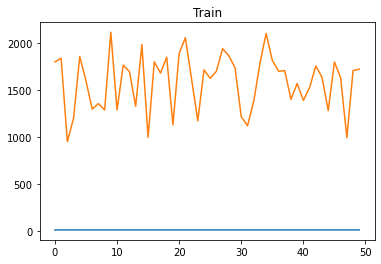

2/2 [==============================] - 3s 39ms/step


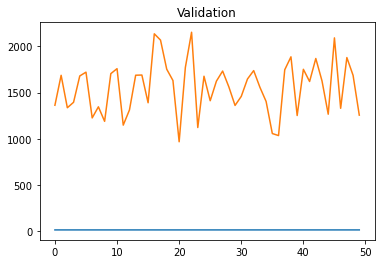

3/3 [==============================] - 0s 12ms/step


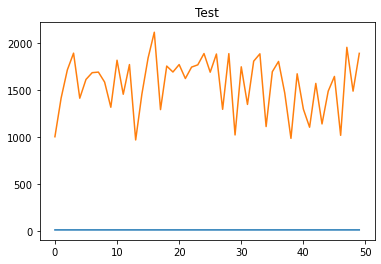

3/3 [==============================] - 0s 11ms/step


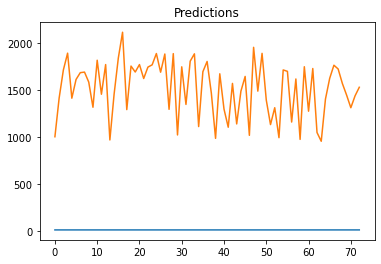

In [57]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [58]:
mavg_hybrid_cnn_rnn_gru_mse

2339932.694563245

### RNN LSTM GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2531156.0000 - root_mean_squared_error: 1590.9607

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 88s 8s/step - loss: 2531156.0000 - root_mean_squared_error: 1590.9607 - val_loss: 2501385.5000 - val_root_mean_squared_error: 1581.5769
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2528648.7500 - root_mean_squared_error: 1590.1726

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2528648.7500 - root_mean_squared_error: 1590.1726 - val_loss: 2498871.2500 - val_root_mean_squared_error: 1580.7819
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2526098.5000 - root_mean_squared_error: 1589.3705

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2526098.5000 - root_mean_squared_error: 1589.3705 - val_loss: 2496257.0000 - val_root_mean_squared_error: 1579.9547
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2523406.0000 - root_mean_squared_error: 1588.5232

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2523406.0000 - root_mean_squared_error: 1588.5232 - val_loss: 2493479.7500 - val_root_mean_squared_error: 1579.0756
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2519911.5000 - root_mean_squared_error: 1587.4229

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 68s 10s/step - loss: 2520564.7500 - root_mean_squared_error: 1587.6287 - val_loss: 2490536.7500 - val_root_mean_squared_error: 1578.1434
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2517595.7500 - root_mean_squared_error: 1586.6934

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2517595.7500 - root_mean_squared_error: 1586.6934 - val_loss: 2487546.0000 - val_root_mean_squared_error: 1577.1956
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2507944.0000 - root_mean_squared_error: 1583.6489

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2514647.7500 - root_mean_squared_error: 1585.7640 - val_loss: 2484691.2500 - val_root_mean_squared_error: 1576.2903
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2511870.0000 - root_mean_squared_error: 1584.8881

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2511870.0000 - root_mean_squared_error: 1584.8881 - val_loss: 2482096.0000 - val_root_mean_squared_error: 1575.4669
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2509403.7500 - root_mean_squared_error: 1584.1097

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2509403.7500 - root_mean_squared_error: 1584.1097 - val_loss: 2479808.2500 - val_root_mean_squared_error: 1574.7407
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2506260.2500 - root_mean_squared_error: 1583.1173

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2507250.0000 - root_mean_squared_error: 1583.4298 - val_loss: 2477877.2500 - val_root_mean_squared_error: 1574.1274
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2510035.5000 - root_mean_squared_error: 1584.3092

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2505471.7500 - root_mean_squared_error: 1582.8682 - val_loss: 2476327.7500 - val_root_mean_squared_error: 1573.6353
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2504057.2500 - root_mean_squared_error: 1582.4213

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 2504057.2500 - root_mean_squared_error: 1582.4213 - val_loss: 2475127.2500 - val_root_mean_squared_error: 1573.2537
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2502969.5000 - root_mean_squared_error: 1582.0776

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2502969.5000 - root_mean_squared_error: 1582.0776 - val_loss: 2474194.7500 - val_root_mean_squared_error: 1572.9573
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2492124.5000 - root_mean_squared_error: 1578.6464

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2502116.5000 - root_mean_squared_error: 1581.8080 - val_loss: 2473463.2500 - val_root_mean_squared_error: 1572.7247
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2501442.0000 - root_mean_squared_error: 1581.5947

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2501442.0000 - root_mean_squared_error: 1581.5947 - val_loss: 2472863.5000 - val_root_mean_squared_error: 1572.5341
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2500883.7500 - root_mean_squared_error: 1581.4182

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 2500883.7500 - root_mean_squared_error: 1581.4182 - val_loss: 2472364.5000 - val_root_mean_squared_error: 1572.3755
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2500414.0000 - root_mean_squared_error: 1581.2698

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 2500414.0000 - root_mean_squared_error: 1581.2698 - val_loss: 2471940.5000 - val_root_mean_squared_error: 1572.2406
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2500013.7500 - root_mean_squared_error: 1581.1432

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 2500013.7500 - root_mean_squared_error: 1581.1432 - val_loss: 2471566.2500 - val_root_mean_squared_error: 1572.1216
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2499652.2500 - root_mean_squared_error: 1581.0288

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2499652.2500 - root_mean_squared_error: 1581.0288 - val_loss: 2471231.2500 - val_root_mean_squared_error: 1572.0150
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2499328.0000 - root_mean_squared_error: 1580.9263

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2499328.0000 - root_mean_squared_error: 1580.9263 - val_loss: 2470923.0000 - val_root_mean_squared_error: 1571.9170
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2499029.2500 - root_mean_squared_error: 1580.8318

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 2499029.2500 - root_mean_squared_error: 1580.8318 - val_loss: 2470635.7500 - val_root_mean_squared_error: 1571.8256
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2498751.7500 - root_mean_squared_error: 1580.7440

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 2498751.7500 - root_mean_squared_error: 1580.7440 - val_loss: 2470365.2500 - val_root_mean_squared_error: 1571.7395
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2498484.5000 - root_mean_squared_error: 1580.6595

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2498484.5000 - root_mean_squared_error: 1580.6595 - val_loss: 2470111.0000 - val_root_mean_squared_error: 1571.6587
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2498235.2500 - root_mean_squared_error: 1580.5807

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2498235.2500 - root_mean_squared_error: 1580.5807 - val_loss: 2469869.5000 - val_root_mean_squared_error: 1571.5818
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2503083.2500 - root_mean_squared_error: 1582.1135

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2497996.7500 - root_mean_squared_error: 1580.5052 - val_loss: 2469635.5000 - val_root_mean_squared_error: 1571.5074
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2501808.5000 - root_mean_squared_error: 1581.7106

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 2497765.2500 - root_mean_squared_error: 1580.4320 - val_loss: 2469408.0000 - val_root_mean_squared_error: 1571.4351
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2497539.2500 - root_mean_squared_error: 1580.3605

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2497539.2500 - root_mean_squared_error: 1580.3605 - val_loss: 2469185.0000 - val_root_mean_squared_error: 1571.3640
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2497305.7500 - root_mean_squared_error: 1580.2866

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2497318.2500 - root_mean_squared_error: 1580.2905 - val_loss: 2468965.5000 - val_root_mean_squared_error: 1571.2942
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2497099.5000 - root_mean_squared_error: 1580.2213

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2497099.5000 - root_mean_squared_error: 1580.2213 - val_loss: 2468750.5000 - val_root_mean_squared_error: 1571.2257
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2496884.7500 - root_mean_squared_error: 1580.1534

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2496884.7500 - root_mean_squared_error: 1580.1534 - val_loss: 2468538.0000 - val_root_mean_squared_error: 1571.1582
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2496674.7500 - root_mean_squared_error: 1580.0869

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 2496674.7500 - root_mean_squared_error: 1580.0869 - val_loss: 2468328.5000 - val_root_mean_squared_error: 1571.0916
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2496466.5000 - root_mean_squared_error: 1580.0210

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 2496466.5000 - root_mean_squared_error: 1580.0210 - val_loss: 2468122.5000 - val_root_mean_squared_error: 1571.0259
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2496261.7500 - root_mean_squared_error: 1579.9563

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2496261.7500 - root_mean_squared_error: 1579.9563 - val_loss: 2467920.5000 - val_root_mean_squared_error: 1570.9617
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2494559.7500 - root_mean_squared_error: 1579.4175

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2496060.0000 - root_mean_squared_error: 1579.8925 - val_loss: 2467720.5000 - val_root_mean_squared_error: 1570.8979
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2495860.7500 - root_mean_squared_error: 1579.8293

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 2495860.7500 - root_mean_squared_error: 1579.8293 - val_loss: 2467522.2500 - val_root_mean_squared_error: 1570.8348
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2495664.0000 - root_mean_squared_error: 1579.7671

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2495664.0000 - root_mean_squared_error: 1579.7671 - val_loss: 2467326.5000 - val_root_mean_squared_error: 1570.7726
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2495469.5000 - root_mean_squared_error: 1579.7056

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2495469.5000 - root_mean_squared_error: 1579.7056 - val_loss: 2467132.7500 - val_root_mean_squared_error: 1570.7109
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2504951.5000 - root_mean_squared_error: 1582.7039

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2495276.0000 - root_mean_squared_error: 1579.6443 - val_loss: 2466940.7500 - val_root_mean_squared_error: 1570.6498
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2482112.2500 - root_mean_squared_error: 1575.4720

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2495085.2500 - root_mean_squared_error: 1579.5839 - val_loss: 2466750.0000 - val_root_mean_squared_error: 1570.5891
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2511110.2500 - root_mean_squared_error: 1584.6483

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2494893.5000 - root_mean_squared_error: 1579.5232 - val_loss: 2466560.0000 - val_root_mean_squared_error: 1570.5286
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2494704.2500 - root_mean_squared_error: 1579.4633

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2494704.2500 - root_mean_squared_error: 1579.4633 - val_loss: 2466373.2500 - val_root_mean_squared_error: 1570.4691
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2492132.0000 - root_mean_squared_error: 1578.6488

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2494518.2500 - root_mean_squared_error: 1579.4044 - val_loss: 2466186.5000 - val_root_mean_squared_error: 1570.4097
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2494331.5000 - root_mean_squared_error: 1579.3452

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2494331.5000 - root_mean_squared_error: 1579.3452 - val_loss: 2466000.2500 - val_root_mean_squared_error: 1570.3503
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2489420.0000 - root_mean_squared_error: 1577.7896

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2494147.0000 - root_mean_squared_error: 1579.2869 - val_loss: 2465816.2500 - val_root_mean_squared_error: 1570.2917
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2497781.5000 - root_mean_squared_error: 1580.4371

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2493961.5000 - root_mean_squared_error: 1579.2281 - val_loss: 2465632.5000 - val_root_mean_squared_error: 1570.2333
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2502801.5000 - root_mean_squared_error: 1582.0245

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2493778.7500 - root_mean_squared_error: 1579.1703 - val_loss: 2465449.7500 - val_root_mean_squared_error: 1570.1752
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2504227.5000 - root_mean_squared_error: 1582.4751

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2493596.5000 - root_mean_squared_error: 1579.1125 - val_loss: 2465268.5000 - val_root_mean_squared_error: 1570.1173
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2468782.2500 - root_mean_squared_error: 1571.2358

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2493415.2500 - root_mean_squared_error: 1579.0552 - val_loss: 2465088.2500 - val_root_mean_squared_error: 1570.0599
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2503992.7500 - root_mean_squared_error: 1582.4010

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2493234.0000 - root_mean_squared_error: 1578.9978 - val_loss: 2464906.0000 - val_root_mean_squared_error: 1570.0020
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 2472015.7500 - root_mean_squared_error: 1572.2645

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 1s 6ms/step


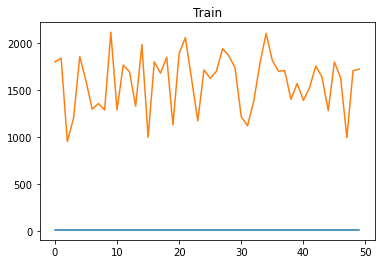

2/2 [==============================] - 1s 8ms/step


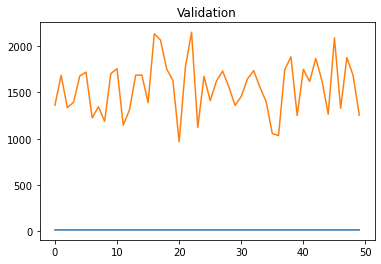

3/3 [==============================] - 0s 9ms/step


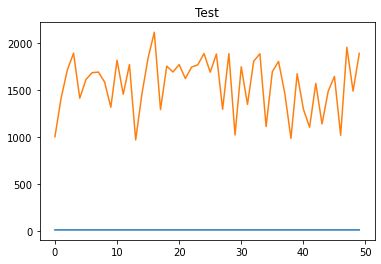

3/3 [==============================] - 0s 7ms/step


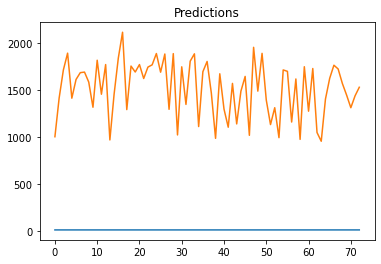

In [59]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [60]:
mavg_hybrid_lstm_rnn_gru_mse

2340824.9230931667

# MSE

In [61]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]

msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [62]:
msedf

,Model,MSE,RMSE
0,cnn,2.090861e+06,1445.980915
1,rnn,2.350170e+06,1533.026481
2,gru,2.350892e+06,1533.261966
3,lstm,2.342834e+06,1530.631849
4,mvg_cnn,1.632979e+06,1277.880587
5,mvg_rnn,2.347159e+06,1532.044119
6,mvg_gru,2.348666e+06,1532.535752
7,mvg_lstm,2.350846e+06,1533.246855
8,auto_cnn,6.373633e+05,798.350366
9,auto_rnn,2.347528e+06,1532.164388


In [63]:
msedf.to_csv("msedf.csv", index= False)

<AxesSubplot:xlabel='Model'>

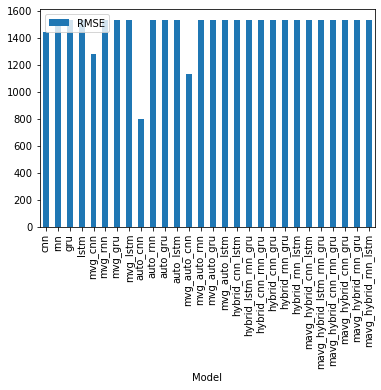

In [64]:
msedf.plot("Model", "RMSE", kind= "bar")

In [65]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)